# **Our Final Trading models are under text (like this) labeled Final ... Model however we also show our intermediate models to paint the storyline of how our code progressed and how we added additional complexity to it overtime to correct and perfect it**

# **Data Loading & Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# Code in such quotation marks can be used if you would like to run via Github instead
""" # get all ES_part_X files, 1 up to 5 and place in one df_es dataframe
df_es = pd.DataFrame()
for i in range(1, 6):
    df_temp = pd.read_csv(f'ES_part_{i}.csv')
    df_es = pd.concat([df_es, df_temp], ignore_index=True)
"""

" # get all ES_part_X files, 1 up to 5 and place in one df_es dataframe\ndf_es = pd.DataFrame()\nfor i in range(1, 6):\n    df_temp = pd.read_csv(f'ES_part_{i}.csv')\n    df_es = pd.concat([df_es, df_temp], ignore_index=True)\n"

In [ ]:
"""

"""

df_es = pd.read_csv('/content/ES.csv')
df_es.drop(columns=['High', 'Low', 'Tick Count'], inplace=True)
!git clone https://github.com/AditxML/Data-Science-Seminar-Group-Project-5.git



Cloning into 'Data-Science-Seminar-Group-Project-5'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 131 (delta 3), reused 5 (delta 1), pack-reused 119 (from 3)
Receiving objects: 100% (131/131), 235.73 MiB | 35.98 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [ ]:
"""

"""



'\n\n'

In [ ]:
"""

"""
df_surprise = pd.read_csv('/content/Data-Science-Seminar-Group-Project-5/US_economic_releases_events.csv')

<ipython-input-5-bb98b893da65>:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_surprise = pd.read_csv('/content/Data-Science-Seminar-Group-Project-5/US_economic_releases_events.csv')


In [ ]:
df_es

,Date,Time,Open,Close,Volume
0,09/10/1997,00:01,0.00,0.00,0
1,09/10/1997,00:02,0.00,0.00,0
2,09/10/1997,00:03,0.00,0.00,0
3,09/10/1997,00:04,0.00,0.00,0
4,09/10/1997,00:05,0.00,0.00,0
...,...,...,...,...,...
9682630,12/19/2024,15:56,5941.75,5941.75,318
9682631,12/19/2024,15:57,5941.75,5941.50,386
9682632,12/19/2024,15:58,5941.50,5941.00,484
9682633,12/19/2024,15:59,5940.75,5941.00,6462


In [ ]:
"""
df_surprise = pd.read_csv('US_economic_releases_events.csv')
"""

"\ndf_surprise = pd.read_csv('US_economic_releases_events.csv')\n"

In [ ]:
df_surprise

,Unnamed: 0,Period,Event,Ticker,Actual,Prior,Revised,S,Freq.,First Rev.,...,Month,Surv(A),Surv(H),Surv(L),Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag
0,1997-01-02,Dec,ISM Manufacturing,NAPMPMI Index,55.2,53,--,94.81480,M,--,...,Jan,--,--,--,--,0.0,--,--,United States,United States
1,1997-01-03,Nov,Construction Spending,VNCCTOT Index,1.9$,1.8$,1.5$,0.00000,M,1.5$,...,Jan,-0.40$,--,--,-0.40$,0.0,--,--,United States,United States
2,1997-01-06,Dec,Housing Completions,PHUCCHNG Index,2k,-1k,--,0.00000,M,--,...,Jan,--,--,--,--,0.0,--,--,United States,United States
3,1997-01-07,Nov,Factory Orders,TMNOCHNG Index,-0.004,0.009,0.011,84.44440,M,0.011,...,Jan,-0.007,--,--,-0.007,0.0,--,--,United States,United States
4,1997-01-08,Dec,Consumer Credit,CICRTOT Index,$7.400b,$2.200b,--,42.96300,M,--,...,Jan,$3.60b,--,--,$3.60b,0.0,--,--,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36053,2024-12-31,Oct,FHFA House Price Index MoM,HPIMMOM% Index,--,0.007,--,68.88890,M,--,...,Dec,--,--,--,--,0.0,--,--,United States,United States
36054,2024-12-31,Oct,S&P CoreLogic CS 20-City MoM SA,SPCS20SM Index,--,0.0018,--,30.37040,M,--,...,Dec,--,--,--,--,1.0,--,--,United States,United States
36055,2024-12-31,Oct,S&P CoreLogic CS 20-City YoY NSA,SPCS20Y% Index,--,0.0457,--,40.74070,M,--,...,Dec,--,--,--,--,1.0,--,--,United States,United States
36056,2024-12-31,Oct,S&P CoreLogic CS US HPI YoY NSA,SPCSUSAY Index,--,0.0389,--,35.55560,M,--,...,Dec,--,--,--,--,0.0,--,--,United States,United States


In [ ]:
df_surprise.drop(columns=['S', 'Month', 'Surv(A)', 'Surv(H)', 'Surv(L)',], inplace=True)

In [ ]:
df_surprise.columns

Index(['Unnamed: 0', 'Period', 'Event', 'Ticker', 'Actual', 'Prior', 'Revised',
       'Freq.', 'First Rev.', 'Last Rev.', 'Date', 'Time', 'C', 'Category',
       'Subcategory', 'R', 'Day', 'Surv(M)', '# Ests.', 'Std Dev', 'Surprise',
       'Country/Region', 'Flag'],
      dtype='object')

In [ ]:
df_surprise.drop(columns=['Flag', 'Country/Region', 'Day', 'C', 'Category','Subcategory', 'Std Dev', 'Period', 'Actual'])

,Unnamed: 0,Event,Ticker,Prior,Revised,Freq.,First Rev.,Last Rev.,Date,Time,R,Surv(M),# Ests.,Surprise
0,1997-01-02,ISM Manufacturing,NAPMPMI Index,53,--,M,--,--,1997-01-02 00:00:00,09:00:00,94.81480,--,0.0,--
1,1997-01-03,Construction Spending,VNCCTOT Index,1.8$,1.5$,M,1.5$,--,1997-01-03 00:00:00,09:00:00,0.00000,-0.40$,0.0,--
2,1997-01-06,Housing Completions,PHUCCHNG Index,-1k,--,M,--,--,1997-01-06 00:00:00,09:00:00,0.00000,--,0.0,--
3,1997-01-07,Factory Orders,TMNOCHNG Index,0.009,0.011,M,0.011,-0.001,1997-01-07 00:00:00,09:00:00,84.44440,-0.007,0.0,--
4,1997-01-08,Consumer Credit,CICRTOT Index,$2.200b,--,M,--,$6.064b,1997-01-08 00:00:00,14:00:00,42.96300,$3.60b,0.0,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36053,2024-12-31,FHFA House Price Index MoM,HPIMMOM% Index,0.007,--,M,--,--,2024-12-31 00:00:00,08:00:00,68.88890,--,0.0,--
36054,2024-12-31,S&P CoreLogic CS 20-City MoM SA,SPCS20SM Index,0.0018,--,M,--,--,2024-12-31 00:00:00,08:00:00,30.37040,--,1.0,--
36055,2024-12-31,S&P CoreLogic CS 20-City YoY NSA,SPCS20Y% Index,0.0457,--,M,--,--,2024-12-31 00:00:00,08:00:00,40.74070,--,1.0,--
36056,2024-12-31,S&P CoreLogic CS US HPI YoY NSA,SPCSUSAY Index,0.0389,--,M,--,--,2024-12-31 00:00:00,08:00:00,35.55560,--,0.0,--


In [ ]:
# Dropping all rows for which surprise column has NaN or 0 value
df_surprise.dropna(subset=['Surprise'], inplace=True)
df_surprise = df_surprise[df_surprise['Surprise'] != 0]


In [ ]:

nan_count = df_surprise['Surprise'].isnull().sum()
print(f"Number of NaN values in 'Surprise' column: {nan_count}")


Number of NaN values in 'Surprise' column: 0


In [ ]:
print(df_surprise.isna().sum())

Unnamed: 0            0
Period                0
Event                 0
Ticker                0
Actual                0
Prior                 0
Revised               0
Freq.                 0
First Rev.            0
Last Rev.             0
Date                  0
Time                325
C                     0
Category              0
Subcategory       35186
R                     0
Day                  25
Surv(M)               0
# Ests.               0
Std Dev               0
Surprise              0
Country/Region        0
Flag                  0
dtype: int64


In [ ]:
df_surprise.replace("--", pd.NA, inplace=True)


print(df_surprise.isna().sum())

Unnamed: 0            0
Period                0
Event                 0
Ticker                0
Actual              987
Prior               980
Revised           17228
Freq.                 0
First Rev.        17228
Last Rev.         10752
Date                  0
Time                325
C                     0
Category              0
Subcategory       35186
R                     0
Day                  25
Surv(M)            6942
# Ests.               0
Std Dev            7539
Surprise           8564
Country/Region        0
Flag                  0
dtype: int64


<ipython-input-15-e7436ed75a58>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_surprise.replace("--", pd.NA, inplace=True)


In [ ]:
# Redoing dropping all rows for which surprise column has NaN or 0 value
df_surprise.dropna(subset=['Surprise'], inplace=True)
df_surprise = df_surprise[df_surprise['Surprise'] != 0]


In [ ]:
df_surprise

,Unnamed: 0,Period,Event,Ticker,Actual,Prior,Revised,Freq.,First Rev.,Last Rev.,...,Category,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag
8,1997-01-10,Dec,Unemployment Rate,USURTOT Index,0.053,0.054,0.053,M,0.053,<NA>,...,Economic Releases,NaN,89.333300,Fri,0.053,10.0,0.07,0,United States,United States
153,1997-06-25,1Q F,GDP Annualized QoQ,GDP CQOQ Index,0.059,0.058,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Wed,0.058,13.0,0.22,0.45,United States,United States
198,1997-08-01,Jul,Change in Nonfarm Payrolls,NFP TCH Index,316k,217k,228k,M,228k,265k,...,Economic Releases,NaN,99.259300,Fri,70k,20.0,33.84,7.27,United States,United States
394,1997-12-23,3Q F,GDP Annualized QoQ,GDP CQOQ Index,0.031,0.033,<NA>,Q,<NA>,0.051,...,Economic Releases,NaN,96.296300,Tue,0.033,11.0,0.07,-2.98,United States,United States
523,1998-03-26,4Q F,GDP Annualized QoQ,GDP CQOQ Index,0.037,0.039,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Thu,0.039,22.0,0.08,-2.52,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35998,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: Current Yr,DOTDY0MD Index,0.04375,0.04375,<NA>,D,<NA>,<NA>,...,Economic Releases,NaN,2.962960,Wed,0.04375,9.0,0,0,United States,United States
35999,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: Next Yr,DOTDY1MD Index,0.03875,0.03375,<NA>,D,<NA>,<NA>,...,Economic Releases,NaN,2.222220,Wed,0.03625,12.0,0.12,2.03,United States,United States
36000,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: +2 Yrs,DOTDY2MD Index,0.03375,0.02875,<NA>,D,<NA>,<NA>,...,Economic Releases,NaN,0.740741,Wed,0.03125,11.0,0.11,2.35,United States,United States
36001,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: +3 Yrs,DOTDY3MD Index,0.03125,0.02875,<NA>,D,<NA>,<NA>,...,Economic Releases,NaN,0.000000,Wed,0.03125,11.0,0.08,0,United States,United States


In [ ]:
# We suspected that 0s were not being filtered out because the data type of the surprise column was an object and thus converting it to float and then redoing
# the filtering should help and it did

df_surprise['Surprise'] = pd.to_numeric(df_surprise['Surprise'], errors='coerce')

df_surprise = df_surprise[df_surprise['Surprise'] != 0].dropna(subset=['Surprise'])

df_surprise


,Unnamed: 0,Period,Event,Ticker,Actual,Prior,Revised,Freq.,First Rev.,Last Rev.,...,Category,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag
153,1997-06-25,1Q F,GDP Annualized QoQ,GDP CQOQ Index,0.059,0.058,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Wed,0.058,13.0,0.22,0.45,United States,United States
198,1997-08-01,Jul,Change in Nonfarm Payrolls,NFP TCH Index,316k,217k,228k,M,228k,265k,...,Economic Releases,NaN,99.259300,Fri,70k,20.0,33.84,7.27,United States,United States
394,1997-12-23,3Q F,GDP Annualized QoQ,GDP CQOQ Index,0.031,0.033,<NA>,Q,<NA>,0.051,...,Economic Releases,NaN,96.296300,Tue,0.033,11.0,0.07,-2.98,United States,United States
523,1998-03-26,4Q F,GDP Annualized QoQ,GDP CQOQ Index,0.037,0.039,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Thu,0.039,22.0,0.08,-2.52,United States,United States
569,1998-04-30,1Q A,GDP Annualized QoQ,GDP CQOQ Index,0.042,0.037,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Thu,0.034,19.0,0.36,2.22,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35992,2024-12-18,Nov P,Building Permits,NHSPATOT Index,1505k,1416k,1419k,M,1419k,1419k,...,Economic Releases,NaN,61.185200,Wed,1430k,46.0,22.21,3.38,United States,United States
35993,2024-12-18,Nov P,Building Permits MoM,NHCHATCH Index,0.061,-0.006,-0.004,M,-0.004,-0.004,...,Economic Releases,NaN,31.851900,Wed,0.01,46.0,1.78,2.87,United States,United States
35994,2024-12-18,3Q,Current Account Balance,USCABAL Index,-$310.9b,-$266.8b,-$275.0b,Q,-$275.0b,-$275.0b,...,Economic Releases,NaN,71.111100,Wed,-$287.1b,18.0,6.22,-3.84,United States,United States
35999,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: Next Yr,DOTDY1MD Index,0.03875,0.03375,<NA>,D,<NA>,<NA>,...,Economic Releases,NaN,2.222220,Wed,0.03625,12.0,0.12,2.03,United States,United States


In [ ]:
# Seeing if anything looks weird to see what else to filter out eg. Time having missing values despite surprises being non missing values is now problematic for
# our analysis so we should get rid of it and number of subcategory missings are equal to total number of current observations so can also get rid of that column
print(df_surprise.isna().sum())

Unnamed: 0            0
Period                0
Event                 0
Ticker                0
Actual                0
Prior                19
Revised            9125
Freq.                 0
First Rev.         9125
Last Rev.          4439
Date                  0
Time                310
C                     0
Category              0
Subcategory       23715
R                     0
Day                  23
Surv(M)               2
# Ests.               0
Std Dev               0
Surprise              0
Country/Region        0
Flag                  0
dtype: int64


In [ ]:
df_surprise.dropna(subset=['Time'], inplace=True)

df_surprise


,Unnamed: 0,Period,Event,Ticker,Actual,Prior,Revised,Freq.,First Rev.,Last Rev.,...,Category,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag
153,1997-06-25,1Q F,GDP Annualized QoQ,GDP CQOQ Index,0.059,0.058,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Wed,0.058,13.0,0.22,0.45,United States,United States
198,1997-08-01,Jul,Change in Nonfarm Payrolls,NFP TCH Index,316k,217k,228k,M,228k,265k,...,Economic Releases,NaN,99.259300,Fri,70k,20.0,33.84,7.27,United States,United States
394,1997-12-23,3Q F,GDP Annualized QoQ,GDP CQOQ Index,0.031,0.033,<NA>,Q,<NA>,0.051,...,Economic Releases,NaN,96.296300,Tue,0.033,11.0,0.07,-2.98,United States,United States
523,1998-03-26,4Q F,GDP Annualized QoQ,GDP CQOQ Index,0.037,0.039,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Thu,0.039,22.0,0.08,-2.52,United States,United States
569,1998-04-30,1Q A,GDP Annualized QoQ,GDP CQOQ Index,0.042,0.037,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Thu,0.034,19.0,0.36,2.22,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35992,2024-12-18,Nov P,Building Permits,NHSPATOT Index,1505k,1416k,1419k,M,1419k,1419k,...,Economic Releases,NaN,61.185200,Wed,1430k,46.0,22.21,3.38,United States,United States
35993,2024-12-18,Nov P,Building Permits MoM,NHCHATCH Index,0.061,-0.006,-0.004,M,-0.004,-0.004,...,Economic Releases,NaN,31.851900,Wed,0.01,46.0,1.78,2.87,United States,United States
35994,2024-12-18,3Q,Current Account Balance,USCABAL Index,-$310.9b,-$266.8b,-$275.0b,Q,-$275.0b,-$275.0b,...,Economic Releases,NaN,71.111100,Wed,-$287.1b,18.0,6.22,-3.84,United States,United States
35999,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: Next Yr,DOTDY1MD Index,0.03875,0.03375,<NA>,D,<NA>,<NA>,...,Economic Releases,NaN,2.222220,Wed,0.03625,12.0,0.12,2.03,United States,United States


In [ ]:
print(df_surprise.isna().sum())

# Based on the output below let's next observe the two missing values for Surv(M), specifically looking at their Surprise column values to see if anything is striking, if it is
# then we'll drop those two rows. This is because in principle Surv(M) should not have missing values given that Surprise has none and is a function of Surv(M)

Unnamed: 0            0
Period                0
Event                 0
Ticker                0
Actual                0
Prior                19
Revised            8820
Freq.                 0
First Rev.         8820
Last Rev.          4265
Date                  0
Time                  0
C                     0
Category              0
Subcategory       23405
R                     0
Day                   0
Surv(M)               2
# Ests.               0
Std Dev               0
Surprise              0
Country/Region        0
Flag                  0
dtype: int64


In [ ]:
rows_with_missing_survm = df_surprise[df_surprise['Surv(M)'].isnull()]
rows_with_missing_survm


,Unnamed: 0,Period,Event,Ticker,Actual,Prior,Revised,Freq.,First Rev.,Last Rev.,...,Category,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag
816,1998-10-15,Sep,PPI MoM,PPI CHNG Index,0.003,-0.004,<NA>,M,<NA>,-0.002,...,Economic Releases,NaN,0.0,Thu,<NA>,36.0,0.05,21213370.81,United States,United States
817,1998-10-15,Sep,PPI Ex Food and Energy MoM,PXFECHNG Index,0.004,-0.001,<NA>,M,<NA>,0,...,Economic Releases,NaN,0.0,Thu,<NA>,34.0,0.05,21213372.93,United States,United States


In [ ]:
# Based on the output above let's see what the average, IQR and max is for the surprise column to see if surprise values of 21213370.81 and 21213372.93 are troubling
# and should thus be removed

df_surprise['Surprise'].describe()


,Surprise
count,2.340500e+04
mean,4.521226e+03
std,2.374934e+05
min,-8.167000e+01
25%,-1.520000e+00
50%,-1.000000e-02
75%,1.550000e+00
max,2.121337e+07


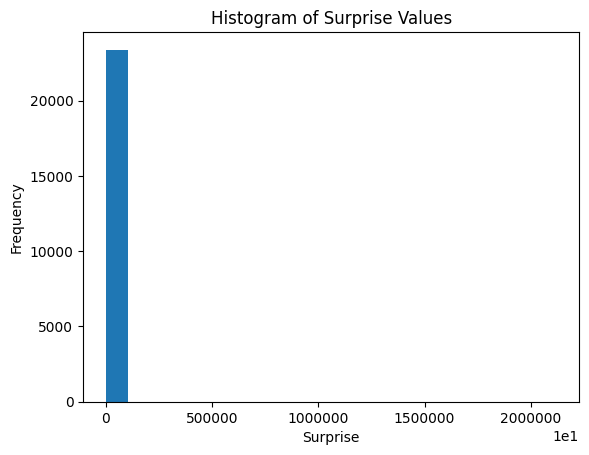

In [ ]:
# Let's actually plot a histogram of those values to identify if the values above are outliers

plt.hist(df_surprise['Surprise'], bins=20)
plt.xlabel('Surprise')
plt.ylabel('Frequency')
plt.title('Histogram of Surprise Values')
plt.ticklabel_format(axis='x', style='sci', scilimits=(1,1))
plt.show()

# by using ticklabel_format and scilimits here we can see (although not obvious from the graph) that there are outliers as the scale of the x-axis hasn't automatically adjusted to be being around -10 to 10

In [ ]:
# Wincorsizing to get results between 0.5% and 99.5% percentile for Surprise values

lower_bound = df_surprise['Surprise'].quantile(0.005)
upper_bound = df_surprise['Surprise'].quantile(0.995)

df_surprise = df_surprise[(df_surprise['Surprise'] >= lower_bound) & (df_surprise['Surprise'] <= upper_bound)]


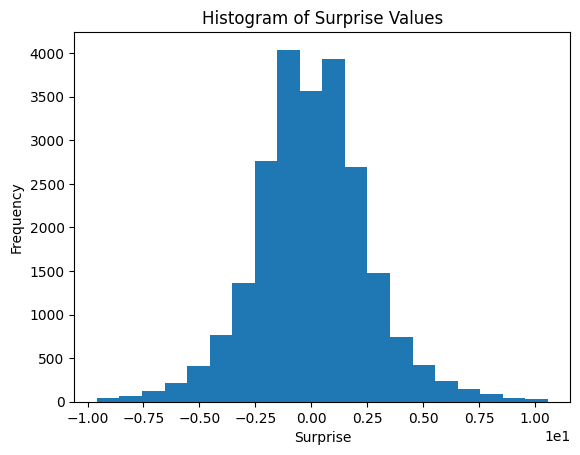

In [ ]:
plt.hist(df_surprise['Surprise'], bins=20)
plt.xlabel('Surprise')
plt.ylabel('Frequency')
plt.title('Histogram of Surprise Values')
plt.ticklabel_format(axis='x', style='sci', scilimits=(1,1))
plt.show()

# Now the scale has automatically adjusted to being between -10 and 10 so outliers are removed, also we notice that surprises are quite normally distributed

In [ ]:
# Let's now print the 10 rows with the largest Surprise values to see if anything looks abnormal - and it doesn't, as expected max values are around 10

df_surprise.nlargest(10, 'Surprise')

,Unnamed: 0,Period,Event,Ticker,Actual,Prior,Revised,Freq.,First Rev.,Last Rev.,...,Category,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag
2456,2001-04-18,Feb,Trade Balance,USTBTOT Index,-$27.0b,-$33.3b,<NA>,M,<NA>,-$35.2b,...,Economic Releases,NaN,82.9630,Wed,-$33.0b,40.0,0.57,10.58,United States,United States
32474,2023-01-13,Jan P,U. of Mich. Current Conditions,CONSCURR Index,68.6,59.4,<NA>,M,<NA>,<NA>,...,Economic Releases,NaN,21.4815,Fri,60,5.0,0.82,10.54,United States,United States
14287,2012-05-31,May,ISM Milwaukee,MAPMINDX Index,57.7,52.9,<NA>,M,<NA>,<NA>,...,Economic Releases,NaN,0.0000,Thu,53.4,3.0,0.41,10.46,United States,United States
26021,2019-05-17,May P,U. of Mich. Expectations,CONSEXP Index,96,87.4,<NA>,M,<NA>,<NA>,...,Economic Releases,NaN,23.7037,Fri,86.8,3.0,0.88,10.45,United States,United States
4815,2004-06-25,1Q F,GDP Price Deflator,GDP DCHG Index,0.029,0.026,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,0.0000,Fri,0.026,47.0,0.03,10.39,United States,United States
22353,2017-05-11,Apr,"PPI Ex Food, Energy, Trade MoM",FDIDSGUM Index,0.007,0.001,<NA>,M,<NA>,0.001,...,Economic Releases,NaN,22.9630,Thu,0.002,8.0,0.05,10.33,United States,United States
12370,2011-01-05,Dec,ADP Employment Change,ADP CHNG Index,297k,93k,92k,M,92k,240k,...,Economic Releases,NaN,90.3704,Wed,100k,33.0,19.15,10.29,United States,United States
34665,2024-03-28,Mar F,U. of Mich. Current Conditions,CONSCURR Index,82.5,79.4,<NA>,M,<NA>,<NA>,...,Economic Releases,NaN,21.4815,Thu,79.6,3.0,0.28,10.25,United States,United States
7542,2007-02-15,2024-02-10 00:00:00,Initial Jobless Claims,INJCJC Index,357k,311k,313k,W,313k,310k,...,Economic Releases,NaN,98.5185,Thu,314k,39.0,4.2,10.23,United States,United States
34457,2024-02-16,Jan,"PPI Ex Food, Energy, Trade MoM",FDIDSGUM Index,0.006,0.002,0.003,M,0.003,0.003,...,Economic Releases,NaN,22.9630,Fri,0.001,9.0,0.05,10.06,United States,United States


In [ ]:
df_surprise.columns

Index(['Unnamed: 0', 'Period', 'Event', 'Ticker', 'Actual', 'Prior', 'Revised',
       'Freq.', 'First Rev.', 'Last Rev.', 'Date', 'Time', 'C', 'Category',
       'Subcategory', 'R', 'Day', 'Surv(M)', '# Ests.', 'Std Dev', 'Surprise',
       'Country/Region', 'Flag'],
      dtype='object')

In [ ]:
df_surprise[['Date','Time']]

,Date,Time
153,1997-06-25 00:00:00,07:30:00
198,1997-08-01 00:00:00,07:30:00
394,1997-12-23 00:00:00,07:30:00
523,1998-03-26 00:00:00,07:30:00
569,1998-04-30 00:00:00,07:30:00
...,...,...
35992,2024-12-18 00:00:00,07:30:00
35993,2024-12-18 00:00:00,07:30:00
35994,2024-12-18 00:00:00,07:30:00
35999,2024-12-18 00:00:00,13:00:00


In [ ]:
df_surprise['Date'] = df_surprise['Date'].astype(str)
df_surprise['Time'] = df_surprise['Time'].astype(str)

df_surprise['Time'] = df_surprise['Time'].fillna('00:00:00')

df_surprise['DateTime'] = pd.to_datetime(
    df_surprise['Date'].str[:10] + ' ' + df_surprise['Time'],
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'
)

print("\nFirst 5 rows of DateTime column:")
print(df_surprise['DateTime'].head())

print("\nNumber of invalid DateTime entries:")
print(df_surprise['DateTime'].isna().sum())


First 5 rows of DateTime column:
153   1997-06-25 07:30:00
198   1997-08-01 07:30:00
394   1997-12-23 07:30:00
523   1998-03-26 07:30:00
569   1998-04-30 07:30:00
Name: DateTime, dtype: datetime64[ns]

Number of invalid DateTime entries:
464


<ipython-input-30-4ffcbc2525d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surprise['Date'] = df_surprise['Date'].astype(str)
<ipython-input-30-4ffcbc2525d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surprise['Time'] = df_surprise['Time'].astype(str)
<ipython-input-30-4ffcbc2525d6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [ ]:
# Strangely we get NaN values for DateTime so we next look into why that is
df_surprise.isna().sum()

,0
Unnamed: 0,0
Period,0
Event,0
Ticker,0
Actual,0
Prior,19
Revised,8690
Freq.,0
First Rev.,8690
Last Rev.,4186


In [ ]:
# To do so we print the rows for which DateTime was NaN and we see the Date variable is weirdly formatted
nan_rows = df_surprise[df_surprise['DateTime'].isna()]
nan_rows[['Date','Time']]

,Date,Time
1583,01/03/000,09:00:00
1585,01/04/000,09:00:00
1587,01/05/000,09:00:00
1588,01/05/000,09:00:00
1590,01/06/000,07:30:00
...,...,...
2245,12/22/000,09:00:00
2248,12/28/000,07:30:00
2249,12/28/000,09:00:00
2250,12/28/000,09:00:00


In [ ]:
# The first column is also a Date column and looks more appropriate from the output below so let's use that instead to create our DateTime variable
nan_rows[['Date','Unnamed: 0']]

,Date,Unnamed: 0
1583,01/03/000,2000-01-03
1585,01/04/000,2000-01-04
1587,01/05/000,2000-01-05
1588,01/05/000,2000-01-05
1590,01/06/000,2000-01-06
...,...,...
2245,12/22/000,2000-12-22
2248,12/28/000,2000-12-28
2249,12/28/000,2000-12-28
2250,12/28/000,2000-12-28


In [ ]:
# First we drop Date and DateTime and change the column name for Unnamed: 0 to Date

df_surprise.drop(columns=['Date', 'DateTime'], inplace=True)
df_surprise.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df_surprise.columns

<ipython-input-34-d4942771fab2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surprise.drop(columns=['Date', 'DateTime'], inplace=True)
<ipython-input-34-d4942771fab2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surprise.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)


Index(['Date', 'Period', 'Event', 'Ticker', 'Actual', 'Prior', 'Revised',
       'Freq.', 'First Rev.', 'Last Rev.', 'Time', 'C', 'Category',
       'Subcategory', 'R', 'Day', 'Surv(M)', '# Ests.', 'Std Dev', 'Surprise',
       'Country/Region', 'Flag'],
      dtype='object')

In [ ]:
# Now let's again create a DateTime column with the new Date column and check for number of NaN values
df_surprise['Date'] = df_surprise['Date'].astype(str)
df_surprise['Time'] = df_surprise['Time'].astype(str)

df_surprise['Time'] = df_surprise['Time'].fillna('00:00:00')

df_surprise['DateTime'] = pd.to_datetime(
    df_surprise['Date'].str[:10] + ' ' + df_surprise['Time'],
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'
)

df_surprise.isna().sum()

# Our new variable has no NaN values and is thus appropriate for the next part of our analysis

<ipython-input-35-e668f83518d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surprise['Date'] = df_surprise['Date'].astype(str)
<ipython-input-35-e668f83518d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surprise['Time'] = df_surprise['Time'].astype(str)
<ipython-input-35-e668f83518d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

,0
Date,0
Period,0
Event,0
Ticker,0
Actual,0
Prior,19
Revised,8690
Freq.,0
First Rev.,8690
Last Rev.,4186


In [ ]:
df_surprise

,Date,Period,Event,Ticker,Actual,Prior,Revised,Freq.,First Rev.,Last Rev.,...,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag,DateTime
153,1997-06-25,1Q F,GDP Annualized QoQ,GDP CQOQ Index,0.059,0.058,<NA>,Q,<NA>,<NA>,...,NaN,96.296300,Wed,0.058,13.0,0.22,0.45,United States,United States,1997-06-25 07:30:00
198,1997-08-01,Jul,Change in Nonfarm Payrolls,NFP TCH Index,316k,217k,228k,M,228k,265k,...,NaN,99.259300,Fri,70k,20.0,33.84,7.27,United States,United States,1997-08-01 07:30:00
394,1997-12-23,3Q F,GDP Annualized QoQ,GDP CQOQ Index,0.031,0.033,<NA>,Q,<NA>,0.051,...,NaN,96.296300,Tue,0.033,11.0,0.07,-2.98,United States,United States,1997-12-23 07:30:00
523,1998-03-26,4Q F,GDP Annualized QoQ,GDP CQOQ Index,0.037,0.039,<NA>,Q,<NA>,<NA>,...,NaN,96.296300,Thu,0.039,22.0,0.08,-2.52,United States,United States,1998-03-26 07:30:00
569,1998-04-30,1Q A,GDP Annualized QoQ,GDP CQOQ Index,0.042,0.037,<NA>,Q,<NA>,<NA>,...,NaN,96.296300,Thu,0.034,19.0,0.36,2.22,United States,United States,1998-04-30 07:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35992,2024-12-18,Nov P,Building Permits,NHSPATOT Index,1505k,1416k,1419k,M,1419k,1419k,...,NaN,61.185200,Wed,1430k,46.0,22.21,3.38,United States,United States,2024-12-18 07:30:00
35993,2024-12-18,Nov P,Building Permits MoM,NHCHATCH Index,0.061,-0.006,-0.004,M,-0.004,-0.004,...,NaN,31.851900,Wed,0.01,46.0,1.78,2.87,United States,United States,2024-12-18 07:30:00
35994,2024-12-18,3Q,Current Account Balance,USCABAL Index,-$310.9b,-$266.8b,-$275.0b,Q,-$275.0b,-$275.0b,...,NaN,71.111100,Wed,-$287.1b,18.0,6.22,-3.84,United States,United States,2024-12-18 07:30:00
35999,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: Next Yr,DOTDY1MD Index,0.03875,0.03375,<NA>,D,<NA>,<NA>,...,NaN,2.222220,Wed,0.03625,12.0,0.12,2.03,United States,United States,2024-12-18 13:00:00


In [ ]:
# Now let's do the same for df_es

df_es

,Date,Time,Open,Close,Volume
0,09/10/1997,00:01,0.00,0.00,0
1,09/10/1997,00:02,0.00,0.00,0
2,09/10/1997,00:03,0.00,0.00,0
3,09/10/1997,00:04,0.00,0.00,0
4,09/10/1997,00:05,0.00,0.00,0
...,...,...,...,...,...
9682630,12/19/2024,15:56,5941.75,5941.75,318
9682631,12/19/2024,15:57,5941.75,5941.50,386
9682632,12/19/2024,15:58,5941.50,5941.00,484
9682633,12/19/2024,15:59,5940.75,5941.00,6462


In [ ]:
df_es.isna().sum()

,0
Date,0
Time,0
Open,0
Close,0
Volume,0


In [ ]:
df_es['Date'] = df_es['Date'].astype(str)
df_es['Time'] = df_es['Time'].astype(str)

df_es['Time'] = df_es['Time'].fillna('00:00')
df_es['Time'] = df_es['Time'] + ':00'

df_es['DateTime'] = pd.to_datetime(
    df_es['Date'] + ' ' + df_es['Time'],
    format='%m/%d/%Y %H:%M:%S',
    errors='coerce'
)

print(df_es.isna().sum())

Date        0
Time        0
Open        0
Close       0
Volume      0
DateTime    0
dtype: int64


In [ ]:
df_es

,Date,Time,Open,Close,Volume,DateTime
0,09/10/1997,00:01:00,0.00,0.00,0,1997-09-10 00:01:00
1,09/10/1997,00:02:00,0.00,0.00,0,1997-09-10 00:02:00
2,09/10/1997,00:03:00,0.00,0.00,0,1997-09-10 00:03:00
3,09/10/1997,00:04:00,0.00,0.00,0,1997-09-10 00:04:00
4,09/10/1997,00:05:00,0.00,0.00,0,1997-09-10 00:05:00
...,...,...,...,...,...,...
9682630,12/19/2024,15:56:00,5941.75,5941.75,318,2024-12-19 15:56:00
9682631,12/19/2024,15:57:00,5941.75,5941.50,386,2024-12-19 15:57:00
9682632,12/19/2024,15:58:00,5941.50,5941.00,484,2024-12-19 15:58:00
9682633,12/19/2024,15:59:00,5940.75,5941.00,6462,2024-12-19 15:59:00


In [ ]:
# Now we create the merged dataframe for our analysis - to allow us to match times of surprise with the price of the future at the time
df_combined = pd.merge(
    df_es,
    df_surprise,
    on='DateTime',
    how='outer',
    suffixes=('_es', '_surprise'),
    indicator=True
)

df_combined

,Date_es,Time_es,Open,Close,Volume,DateTime,Date_surprise,Period,Event,Ticker,...,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag,_merge
0,NaN,NaN,NaN,NaN,NaN,1997-06-25 07:30:00,1997-06-25,1Q F,GDP Annualized QoQ,GDP CQOQ Index,...,NaN,96.2963,Wed,0.058,13.0,0.22,0.45,United States,United States,right_only
1,NaN,NaN,NaN,NaN,NaN,1997-08-01 07:30:00,1997-08-01,Jul,Change in Nonfarm Payrolls,NFP TCH Index,...,NaN,99.2593,Fri,70k,20.0,33.84,7.27,United States,United States,right_only
2,09/10/1997,00:01:00,0.00,0.00,0.0,1997-09-10 00:01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,09/10/1997,00:02:00,0.00,0.00,0.0,1997-09-10 00:02:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,09/10/1997,00:03:00,0.00,0.00,0.0,1997-09-10 00:03:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695761,12/19/2024,15:56:00,5941.75,5941.75,318.0,2024-12-19 15:56:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9695762,12/19/2024,15:57:00,5941.75,5941.50,386.0,2024-12-19 15:57:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9695763,12/19/2024,15:58:00,5941.50,5941.00,484.0,2024-12-19 15:58:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9695764,12/19/2024,15:59:00,5940.75,5941.00,6462.0,2024-12-19 15:59:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [ ]:
df_combined.isna().sum()

,0
Date_es,101
Time_es,101
Open,101
Close,101
Volume,101
DateTime,0
Date_surprise,9672597
Period,9672597
Event,9672597
Ticker,9672597


In [ ]:
# Some surprise announcements might have come before the starting point for the data on the futures, these would be meaningless for our analysis and should thus
# be removed by removing all rows with NaN values for Open

df_combined.dropna(subset=['Open'], inplace=True)

df_combined.isna().sum()

,0
Date_es,0
Time_es,0
Open,0
Close,0
Volume,0
DateTime,0
Date_surprise,9672597
Period,9672597
Event,9672597
Ticker,9672597


In [ ]:
# Upon analysing our combined dataframe again we now see that it all looks good

df_combined

,Date_es,Time_es,Open,Close,Volume,DateTime,Date_surprise,Period,Event,Ticker,...,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag,_merge
2,09/10/1997,00:01:00,0.00,0.00,0.0,1997-09-10 00:01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,09/10/1997,00:02:00,0.00,0.00,0.0,1997-09-10 00:02:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,09/10/1997,00:03:00,0.00,0.00,0.0,1997-09-10 00:03:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,09/10/1997,00:04:00,0.00,0.00,0.0,1997-09-10 00:04:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,09/10/1997,00:05:00,0.00,0.00,0.0,1997-09-10 00:05:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695761,12/19/2024,15:56:00,5941.75,5941.75,318.0,2024-12-19 15:56:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9695762,12/19/2024,15:57:00,5941.75,5941.50,386.0,2024-12-19 15:57:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9695763,12/19/2024,15:58:00,5941.50,5941.00,484.0,2024-12-19 15:58:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9695764,12/19/2024,15:59:00,5940.75,5941.00,6462.0,2024-12-19 15:59:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


# **Creating a naive benchmark strategy that trades whenever a surprise occurs - comparing this with our more sophisticated strategies should show the importance of only trading on surprises in significant determinants of asset returns**

In [ ]:
# First we create an indicator variable with a value True if the column for Surprise is non-missing for that row

df_combined['Surprise Occurred'] = df_combined['Surprise'].notna()

df_combined

,Date_es,Time_es,Open,Close,Volume,DateTime,Date_surprise,Period,Event,Ticker,...,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag,_merge,Surprise Occurred
2,09/10/1997,00:01:00,0.00,0.00,0.0,1997-09-10 00:01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
3,09/10/1997,00:02:00,0.00,0.00,0.0,1997-09-10 00:02:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
4,09/10/1997,00:03:00,0.00,0.00,0.0,1997-09-10 00:03:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
5,09/10/1997,00:04:00,0.00,0.00,0.0,1997-09-10 00:04:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
6,09/10/1997,00:05:00,0.00,0.00,0.0,1997-09-10 00:05:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695761,12/19/2024,15:56:00,5941.75,5941.75,318.0,2024-12-19 15:56:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
9695762,12/19/2024,15:57:00,5941.75,5941.50,386.0,2024-12-19 15:57:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
9695763,12/19/2024,15:58:00,5941.50,5941.00,484.0,2024-12-19 15:58:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
9695764,12/19/2024,15:59:00,5940.75,5941.00,6462.0,2024-12-19 15:59:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False


In [ ]:
df_combined.isna().sum()

,0
Date_es,0
Time_es,0
Open,0
Close,0
Volume,0
DateTime,0
Date_surprise,9672597
Period,9672597
Event,9672597
Ticker,9672597


In [ ]:
df_combined['Surprise Occurred'].value_counts()

,count
Surprise Occurred,
False,9672597
True,23068


In [ ]:
# Same number of False values for the new surprise variables as original surprise variable
# so the new variables should be correctly created
df_combined[df_combined['Surprise Occurred'] == False].count()

,0
Date_es,9672597
Time_es,9672597
Open,9672597
Close,9672597
Volume,9672597
DateTime,9672597
Date_surprise,0
Period,0
Event,0
Ticker,0


In [ ]:
# Lets now create a new indicator called First Post Surprise which takes a value or true for being the first minute level observation after a surprise occurs
# i.e. right after the Surprise Occurred variable take a value of True this should take a value of True



df_combined['First Post Surprise'] = df_combined['Surprise Occurred'].shift(1)
df_combined['First Post Surprise'].iloc[0] = False

df_combined

<ipython-input-49-b73d1a85a455>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_combined['First Post Surprise'].iloc[0] = False
<ipython-input-49-b73d1a85a455>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,Date_es,Time_es,Open,Close,Volume,DateTime,Date_surprise,Period,Event,Ticker,...,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag,_merge,Surprise Occurred,First Post Surprise
2,09/10/1997,00:01:00,0.00,0.00,0.0,1997-09-10 00:01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
3,09/10/1997,00:02:00,0.00,0.00,0.0,1997-09-10 00:02:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
4,09/10/1997,00:03:00,0.00,0.00,0.0,1997-09-10 00:03:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
5,09/10/1997,00:04:00,0.00,0.00,0.0,1997-09-10 00:04:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
6,09/10/1997,00:05:00,0.00,0.00,0.0,1997-09-10 00:05:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695761,12/19/2024,15:56:00,5941.75,5941.75,318.0,2024-12-19 15:56:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
9695762,12/19/2024,15:57:00,5941.75,5941.50,386.0,2024-12-19 15:57:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
9695763,12/19/2024,15:58:00,5941.50,5941.00,484.0,2024-12-19 15:58:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
9695764,12/19/2024,15:59:00,5940.75,5941.00,6462.0,2024-12-19 15:59:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False


In [ ]:
# print df combined where columsn surprise occurred and first post surprise are true, 1 of them true is enough to show row
df_combined[(df_combined['Surprise Occurred'] == True) | (df_combined['First Post Surprise'] == True)]

,Date_es,Time_es,Open,Close,Volume,DateTime,Date_surprise,Period,Event,Ticker,...,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag,_merge,Surprise Occurred,First Post Surprise
102676,12/23/1997,07:30:00,1189.71,1189.71,0.0,1997-12-23 07:30:00,1997-12-23,3Q F,GDP Annualized QoQ,GDP CQOQ Index,...,Tue,0.033,11.0,0.07,-2.98,United States,United States,both,True,False
102677,12/23/1997,07:31:00,1189.40,1189.09,0.0,1997-12-23 07:31:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
191131,03/26/1998,07:30:00,1355.65,1355.96,0.0,1998-03-26 07:30:00,1998-03-26,4Q F,GDP Annualized QoQ,GDP CQOQ Index,...,Thu,0.039,22.0,0.08,-2.52,United States,United States,both,True,False
191132,03/26/1998,07:31:00,1355.96,1355.04,0.0,1998-03-26 07:31:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
224731,04/30/1998,07:30:00,1338.85,1338.85,0.0,1998-04-30 07:30:00,1998-04-30,1Q A,GDP Annualized QoQ,GDP CQOQ Index,...,Thu,0.034,19.0,0.36,2.22,United States,United States,both,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693874,12/18/2024,07:30:00,6145.50,6145.75,131.0,2024-12-18 07:30:00,2024-12-18,3Q,Current Account Balance,USCABAL Index,...,Wed,-$287.1b,18.0,6.22,-3.84,United States,United States,both,True,True
9693875,12/18/2024,07:31:00,6145.50,6145.25,305.0,2024-12-18 07:31:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
9694204,12/18/2024,13:00:00,6135.75,6136.00,801.0,2024-12-18 13:00:00,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: Next Yr,DOTDY1MD Index,...,Wed,0.03625,12.0,0.12,2.03,United States,United States,both,True,False
9694205,12/18/2024,13:00:00,6135.75,6136.00,801.0,2024-12-18 13:00:00,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: +2 Yrs,DOTDY2MD Index,...,Wed,0.03125,11.0,0.11,2.35,United States,United States,both,True,True


**Defining key hyperparameter of holding period (based on literature but also varied up and down slightly) and transaction cost based on research into US futures market transaction cost**

In [ ]:
holding_period = 20
transaction_cost = 0.000025

In [ ]:
df_combined[df_combined['First Post Surprise'] == True]


,Date_es,Time_es,Open,Close,Volume,DateTime,Date_surprise,Period,Event,Ticker,...,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag,_merge,Surprise Occurred,First Post Surprise
102677,12/23/1997,07:31:00,1189.40,1189.09,0.0,1997-12-23 07:31:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
191132,03/26/1998,07:31:00,1355.96,1355.04,0.0,1998-03-26 07:31:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
224732,04/30/1998,07:31:00,1339.15,1345.26,0.0,1998-04-30 07:31:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
254267,06/01/1998,09:01:00,1334.87,1335.18,0.0,1998-06-01 09:01:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
255692,06/02/1998,09:00:00,1343.12,1342.51,0.0,1998-06-02 09:00:00,1998-06-02,Apr,Leading Index,LEI CHNG Index,...,Tue,-0.002,6.0,0.21,1.41,United States,United States,both,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693873,12/18/2024,07:30:00,6145.50,6145.75,131.0,2024-12-18 07:30:00,2024-12-18,Nov P,Building Permits MoM,NHCHATCH Index,...,Wed,0.01,46.0,1.78,2.87,United States,United States,both,True,True
9693874,12/18/2024,07:30:00,6145.50,6145.75,131.0,2024-12-18 07:30:00,2024-12-18,3Q,Current Account Balance,USCABAL Index,...,Wed,-$287.1b,18.0,6.22,-3.84,United States,United States,both,True,True
9693875,12/18/2024,07:31:00,6145.50,6145.25,305.0,2024-12-18 07:31:00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
9694205,12/18/2024,13:00:00,6135.75,6136.00,801.0,2024-12-18 13:00:00,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: +2 Yrs,DOTDY2MD Index,...,Wed,0.03125,11.0,0.11,2.35,United States,United States,both,True,True


In [ ]:
"""
 Now we create general returns for our 3 variants of holding periods (to be optimized on
 validation set for statistical and ML models) and returns for our naive model which goes
 long when there's a positive surprise and short when there's a negative surprise (the returns
 with a prefix of N_)
"""

df_combined['N_Return'] = np.nan
df_combined['N_Return_half'] = np.nan
df_combined['N_Return_double'] = np.nan
df_combined['Return'] = np.nan
df_combined['Return_half'] = np.nan
df_combined['Return_double'] = np.nan

surprise_rows = df_combined[df_combined['First Post Surprise'] == True]

for index, row in surprise_rows.iterrows():
    row_position = df_combined.index.get_loc(index)

    if index > df_combined.index[0]:
        prev_surprise = df_combined.at[df_combined.index[df_combined.index.get_loc(index)-1], 'Surprise']
    else:
        prev_surprise = 0

    if row_position + holding_period < len(df_combined):
        current_price = row['Open']
        future_row = df_combined.iloc[row_position + holding_period]
        future_price = future_row['Open']

        if current_price != 0:
            percentage_increase = (future_price - current_price) / current_price
        else:
            percentage_increase = np.nan

        df_combined.at[index, 'Return'] = percentage_increase
        if prev_surprise < 0:
            df_combined.at[index, 'N_Return'] = -percentage_increase
        else:
            df_combined.at[index, 'N_Return'] = percentage_increase

    if row_position + int(holding_period*0.5) < len(df_combined):
        current_price = row['Open']
        future_row = df_combined.iloc[row_position + int(holding_period*0.5)]
        future_price = future_row['Open']

        if current_price != 0:
            percentage_increase = (future_price - current_price) / current_price
        else:
            percentage_increase = np.nan

        df_combined.at[index, 'Return_half'] = percentage_increase
        if prev_surprise < 0:
            df_combined.at[index, 'N_Return_half'] = -percentage_increase
        else:
            df_combined.at[index, 'N_Return_half'] = percentage_increase

    if row_position + int(holding_period*2) < len(df_combined):
        current_price = row['Open']
        future_row = df_combined.iloc[row_position + int(holding_period*2)]
        future_price = future_row['Open']

        if current_price != 0:
            percentage_increase = (future_price - current_price) / current_price
        else:
            percentage_increase = np.nan

        df_combined.at[index, 'Return_double'] = percentage_increase
        if prev_surprise < 0:
            df_combined.at[index, 'N_Return_double'] = -percentage_increase
        else:
            df_combined.at[index, 'N_Return_double'] = percentage_increase

df_combined

,Date_es,Time_es,Open,Close,Volume,DateTime,Date_surprise,Period,Event,Ticker,...,Flag,_merge,Surprise Occurred,First Post Surprise,N_Return,N_Return_half,N_Return_double,Return,Return_half,Return_double
2,09/10/1997,00:01:00,0.00,0.00,0.0,1997-09-10 00:01:00,NaN,NaN,NaN,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,09/10/1997,00:02:00,0.00,0.00,0.0,1997-09-10 00:02:00,NaN,NaN,NaN,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,09/10/1997,00:03:00,0.00,0.00,0.0,1997-09-10 00:03:00,NaN,NaN,NaN,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
5,09/10/1997,00:04:00,0.00,0.00,0.0,1997-09-10 00:04:00,NaN,NaN,NaN,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
6,09/10/1997,00:05:00,0.00,0.00,0.0,1997-09-10 00:05:00,NaN,NaN,NaN,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695761,12/19/2024,15:56:00,5941.75,5941.75,318.0,2024-12-19 15:56:00,NaN,NaN,NaN,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
9695762,12/19/2024,15:57:00,5941.75,5941.50,386.0,2024-12-19 15:57:00,NaN,NaN,NaN,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
9695763,12/19/2024,15:58:00,5941.50,5941.00,484.0,2024-12-19 15:58:00,NaN,NaN,NaN,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
9695764,12/19/2024,15:59:00,5940.75,5941.00,6462.0,2024-12-19 15:59:00,NaN,NaN,NaN,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
zero_count = (df_combined['Surprise'] == 0).sum()

print(zero_count)

0


In [ ]:
# The number of NaN values for this new column make sense - same as the number of NaNs for the Surprise column
df_combined.isna().sum()

,0
Date_es,0
Time_es,0
Open,0
Close,0
Volume,0
DateTime,0
Date_surprise,9672597
Period,9672597
Event,9672597
Ticker,9672597


In [ ]:
df_combined.describe()

,Open,Close,Volume,DateTime,Subcategory,R,# Ests.,Surprise,N_Return,N_Return_half,N_Return_double,Return,Return_half,Return_double
count,9.695665e+06,9.695665e+06,9.695665e+06,9695665,0.0,23068.000000,23068.000000,23068.000000,23068.000000,23068.000000,23068.000000,23068.000000,23068.000000,23068.000000
mean,2.157033e+03,2.157033e+03,8.646174e+02,2011-04-26 02:54:35.758778112,NaN,63.220673,37.124155,0.028913,0.000012,0.000016,-0.000005,0.000003,-0.000012,-0.000008
min,0.000000e+00,0.000000e+00,0.000000e+00,1997-09-10 00:01:00,NaN,0.000000,3.000000,-9.580000,-0.036467,-0.032139,-0.034818,-0.036467,-0.032139,-0.036751
25%,1.239050e+03,1.239050e+03,0.000000e+00,2004-07-22 03:37:00,NaN,42.963000,14.000000,-1.510000,-0.000981,-0.000749,-0.001324,-0.000990,-0.000784,-0.001328
50%,1.501040e+03,1.501040e+03,9.100000e+01,2011-04-08 00:31:00,NaN,69.481500,37.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.860620e+03,2.860620e+03,6.390000e+02,2018-02-11 18:52:00,NaN,86.666700,57.000000,1.530000,0.001062,0.000848,0.001363,0.001047,0.000822,0.001357
max,6.181130e+03,6.181130e+03,2.149820e+05,2024-12-19 16:00:00,NaN,99.259300,139.000000,10.580000,0.032054,0.023758,0.036751,0.029750,0.027740,0.033010
std,1.314762e+03,1.314761e+03,2.242572e+03,NaN,NaN,28.822984,24.044298,2.551234,0.002987,0.002555,0.003553,0.002987,0.002555,0.003553


**Now we get Returns & Standard Deviation**

In [ ]:
# Just checking how long futures market is typically open for (some surprises on same day might bias this value a bit but not by muchh)
date_counts = df_combined['DateTime'].dt.floor('D').value_counts()

avg_minutes_per_day = date_counts.mean()
avg_holding_period_intervals = avg_minutes_per_day / holding_period

print(f"Average market open minutes per day: {avg_minutes_per_day:.1f}")
print(f"Average holding-period intervals per day: {holding_period:.1f}")

Average market open minutes per day: 1147.8
Average holding-period intervals per day: 20.0


In [ ]:
average_return = df_combined['Return'].dropna().mean()
print(average_return)

3.253384860842976e-06


In [ ]:
train_end = int(0.3 * len(df_combined))
validation_end = int(0.5 * len(df_combined))
print(train_end)
print(validation_end)

2908699
4847832


In [ ]:
"""Computing average annual returns for all of the years in the dataframe using the naive strategy as follows:
   Validation set used to determine which of the 3 holding periods performed best and then the following year is used as the test set with that specific holding period and then
   this process is repeated
"""

annual_returns = {}
for year, group in df_combined[df_combined['Return'].notna()].groupby(df_combined['DateTime'].dt.year):
    compounded_return = (1 + group['Return']).prod() - 1
    annual_returns[year] = compounded_return

annual_returns_pct = {year: f"{ret*100:.2f}%" for year, ret in annual_returns.items()}
print("Annual Compounded Returns:")
print(annual_returns_pct)


Annual Compounded Returns:
{1997: '0.03%', 1998: '-3.79%', 1999: '23.17%', 2000: '12.73%', 2001: '-23.17%', 2002: '-11.97%', 2003: '-3.47%', 2004: '-6.25%', 2005: '12.02%', 2006: '4.17%', 2007: '23.11%', 2008: '12.10%', 2009: '-15.67%', 2010: '-4.45%', 2011: '-3.59%', 2012: '-18.80%', 2013: '6.40%', 2014: '2.24%', 2015: '-18.95%', 2016: '-5.29%', 2017: '9.22%', 2018: '-6.42%', 2019: '-2.83%', 2020: '75.86%', 2021: '28.83%', 2022: '-51.30%', 2023: '17.57%', 2024: '8.81%'}


# **Final Naive Benchmark Model**

<ipython-input-179-1c0b65cdd4e3>:108: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_returns = val_trade_df.groupby('DateTime').apply(
<ipython-input-179-1c0b65cdd4e3>:108: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_returns = val_trade_df.groupby('DateTime').apply(
<ipython-input-179-1c0b65cdd4e3>:108: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is de

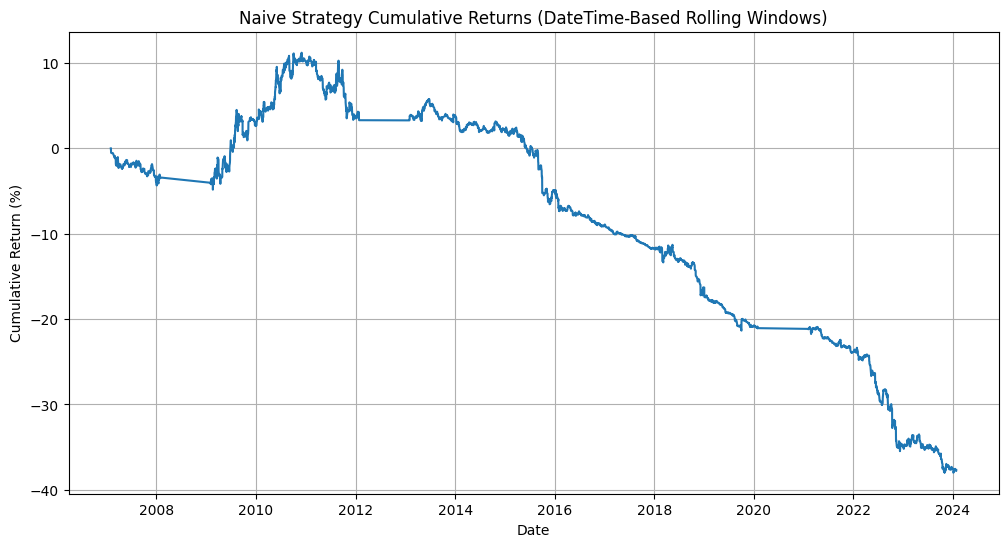

Final Cumulative Compounded Return: -37.66%

Average Fold Test Return : -0.01441%

Standard Deviation of All Test Returns (Aggregated Daily): 0.24102%

Minimum Individual Trade Return: -3.21888%

Test‐Set Trade Profit Accuracy: 49.43% (4195/8486 profitable trades)


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

total_cost = 2 * transaction_cost
horizons = ['_half', '', '_double']


df_naive = df_combined[(df_combined['Surprise'] != 0) &
                       (df_combined['Surprise'].notna())].copy()
df_naive['DateTime'] = pd.to_datetime(df_naive['DateTime'])
df_naive = df_naive.sort_values('DateTime').reset_index(drop=True)

min_date = df_naive['DateTime'].min()
max_date = df_naive['DateTime'].max()

total_duration = max_date - min_date
initial_train_duration = total_duration * 0.3
train_end_date = min_date + initial_train_duration

results = []
all_test_returns = []
all_individual_trade_returns = []
all_dates = []
fold_mean_returns = []
best_horizons_list = []

def calculate_grouped_returns(df_group, horizon):
    if group.empty:
        return 0.0, []

    positives = df_group[df_group['Surprise'] > 0]
    negatives = df_group[df_group['Surprise'] < 0]

    pos_count = len(positives)
    neg_count = len(negatives)

    selected_return_pos = 0.0
    selected_return_neg = 0.0

    if not positives.empty:
        selected_return_pos = positives[f'N_Return{horizon}'].iloc[0] * (pos_count/(pos_count + neg_count))

    if not negatives.empty:
        selected_return_neg = -negatives[f'N_Return{horizon}'].iloc[0] * (neg_count/(pos_count + neg_count))

    individual_returns = []
    if not positives.empty:
        individual_returns.extend(positives[f'N_Return{horizon}'] * (pos_count/(pos_count + neg_count)))
    if not negatives.empty:
        individual_returns.extend(-negatives[f'N_Return{horizon}'] * (neg_count/(pos_count + neg_count)))

    net_return = selected_return_pos + selected_return_neg - (total_cost * (pos_count + neg_count))

    return net_return, individual_returns

while True:
    val_start_date = train_end_date + pd.DateOffset(days=1)
    val_end_date = val_start_date + pd.DateOffset(years=1)
    test_start_date = val_end_date + pd.DateOffset(days=1)
    test_end_date = test_start_date + pd.DateOffset(years=1)

    if val_end_date > max_date or test_end_date > max_date:
        break

    train_mask = df_naive['DateTime'] <= train_end_date
    val_mask = (df_naive['DateTime'] >= val_start_date) & (df_naive['DateTime'] <= val_end_date)
    test_mask = (df_naive['DateTime'] >= test_start_date) & (df_naive['DateTime'] <= test_end_date)

    train_data = df_naive[train_mask]
    val_data = df_naive[val_mask]
    test_data = df_naive[test_mask]

    if val_data.empty or test_data.empty:
        print(f"Skipping period {val_start_date.date()} to {test_end_date.date()} (no data)")
        train_end_date += pd.DateOffset(years=1)
        continue

    best_horizon = None
    best_val_return = -np.inf

    for horizon in horizons:
        val_trade_df = pd.DataFrame({
            'DateTime': val_data['DateTime'],
            'Surprise': val_data['Surprise'],
            f'N_Return{horizon}': val_data[f'N_Return{horizon}'] - total_cost
        }).dropna()

        val_returns = val_trade_df.groupby('DateTime').apply(
            lambda x: calculate_grouped_returns(x, horizon)[0]
        ).values

        if len(val_returns) > 0:
            total_val_return = (1 + val_returns).prod() - 1
            if total_val_return > best_val_return:
                best_val_return = total_val_return
                best_horizon = horizon

    if best_horizon:
        test_trade_df = pd.DataFrame({
            'DateTime': test_data['DateTime'],
            'Surprise': test_data['Surprise'],
            f'N_Return{best_horizon}': test_data[f'N_Return{best_horizon}'] - total_cost
        }).dropna()

        grouped_returns = []
        individual_returns = []
        for name, group in test_trade_df.groupby('DateTime'):
            gr, ir = calculate_grouped_returns(group, best_horizon)
            grouped_returns.append(gr)
            individual_returns.extend(ir)

        if len(grouped_returns) > 0:
            all_test_returns.extend(grouped_returns)
            all_individual_trade_returns.extend(individual_returns)
            all_dates.extend(test_trade_df['DateTime'].unique().tolist())
            fold_mean_returns.append(np.mean(grouped_returns))
            best_horizons_list.append(best_horizon)

    train_end_date += pd.DateOffset(years=1)

if all_test_returns:
    cumulative_returns = (1 + np.array(all_test_returns)).cumprod() - 1
    plt.figure(figsize=(12, 6))
    plt.plot(all_dates, cumulative_returns * 100)
    plt.title('Naive Strategy Cumulative Returns (DateTime-Based Rolling Windows)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (%)')
    plt.grid(True)
    plt.show()

    std_dev_individual = np.std(all_test_returns) * 100
    min_trade_return = np.min(all_individual_trade_returns) * 100

    print(f"Final Cumulative Compounded Return: {cumulative_returns[-1]*100:.2f}%")
    print(f"\nAverage Fold Test Return : {np.mean(fold_mean_returns)*100:.5f}%")
    print(f"\nStandard Deviation of All Test Returns (Aggregated Daily): {std_dev_individual:.5f}%")
    print(f"\nMinimum Individual Trade Return: {min_trade_return:.5f}%")

    positive_trades = sum(r > 0 for r in all_individual_trade_returns)
    total_trades    = len(all_individual_trade_returns)
    accuracy        = positive_trades / total_trades if total_trades else float('nan')
    print(f"\nTest‐Set Trade Profit Accuracy: {accuracy*100:.2f}% "
          f"({positive_trades}/{total_trades} profitable trades)")

else:
    print("No valid test periods found")

In [ ]:
sorted_dates = sorted(all_dates)
print(f"First test set date: {sorted_dates[0].date()}")
print(f"Last test set date: {sorted_dates[-1].date()}")

# So calculate annual compounded return using 17 years

First test set date: 2007-01-31
Last test set date: 2024-01-26


# **Statistical Model**

In [ ]:
!pip install pandas_datareader
!pip install yfinance
!pip install statsmodels

In [ ]:
import pandas as pd
from pandas_datareader import data as pdr
import datetime
import numpy as np
import yfinance as yf
import statsmodels.api as sm

**The code below downloads US economic indicators (GDP, unemployment, CPI,
etc.) and S&P 500 returns, then aligns all data to the exact quarterly dates when GDP is released. It ensures no future data leaks by using only values available on or before each GDP release date.t**

In [ ]:
import datetime
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf

start = datetime.datetime(1997, 1, 1)
end = datetime.datetime.today()
gdp_releases = pdr.DataReader('A191RL1Q225SBEA', 'fred', start, end).index

raw_data = {
    'gdp_gr': pdr.DataReader('A191RL1Q225SBEA', 'fred', start, end),

    'NFP': pdr.DataReader('PAYEMS', 'fred', start, end),
    'un_rate': pdr.DataReader('UNRATE', 'fred', start, end),
    'cci': pdr.DataReader('UMCSENT', 'fred', start, end),
    'ret_sales': pdr.DataReader('RSAFS', 'fred', start, end),
    'IPTI': pdr.DataReader('INDPRO', 'fred', start, end),
    'cpi': pdr.DataReader('CPIAUCSL', 'fred', start, end),
    'TXBPPRIVSA': pdr.DataReader('TXBPPRIVSA', 'fred', start, end),

    'ffr': pdr.DataReader('DFF', 'fred', start, end),

    'sp500': yf.download('^GSPC', start=start, end=end)['Close']
}

economic_data = pd.DataFrame(index=gdp_releases)

for name, series in raw_data.items():
    if name == 'gdp_gr':
        economic_data[name] = series
    elif name == 'sp500':
        prices_on_releases = series.reindex(gdp_releases, method='bfill')
        economic_data['SP500'] = prices_on_releases.pct_change()
    elif name == 'ffr':
        economic_data[name] = series.reindex(gdp_releases, method='bfill')
    else:
        economic_data[name] = series.reindex(gdp_releases, method='ffill')

economic_data = economic_data.dropna(subset=['gdp_gr'])

[*********************100%***********************]  1 of 1 completed


In [ ]:
economic_data

,gdp_gr,NFP,un_rate,cci,ret_sales,IPTI,cpi,TXBPPRIVSA,ffr,SP500
DATE,,,,,,,,,,
1997-01-01,2.6,121357,5.3,97.4,218124,77.5135,159.400,8989.727265,6.26,NaN
1997-04-01,6.8,122288,5.1,101.4,217925,78.9848,159.900,10529.485939,6.18,0.030705
1997-07-01,5.1,123114,4.9,107.1,222985,80.4666,160.400,10146.266776,6.24,0.172964
1997-10-01,3.5,123924,4.7,105.6,224300,82.7656,161.500,10852.416694,5.65,0.072253
1998-01-01,4.1,124806,4.6,106.6,225954,84.1564,162.000,9455.132516,5.84,0.020546
...,...,...,...,...,...,...,...,...,...,...
2023-10-01,3.2,156520,3.9,63.8,686148,102.5781,307.653,19500.544159,5.33,-0.037526
2024-01-01,1.6,157049,3.7,79.0,680456,101.4830,309.794,19795.233356,5.33,0.105970
2024-04-01,3.0,157635,3.9,77.2,688913,102.3568,313.016,19904.874909,5.33,0.105620


In [ ]:
economic_data = economic_data.dropna()
economic_data


,gdp_gr,NFP,un_rate,cci,ret_sales,IPTI,cpi,TXBPPRIVSA,ffr,SP500
DATE,,,,,,,,,,
1997-04-01,6.8,122288,5.1,101.4,217925,78.9848,159.900,10529.485939,6.18,0.030705
1997-07-01,5.1,123114,4.9,107.1,222985,80.4666,160.400,10146.266776,6.24,0.172964
1997-10-01,3.5,123924,4.7,105.6,224300,82.7656,161.500,10852.416694,5.65,0.072253
1998-01-01,4.1,124806,4.6,106.6,225954,84.1564,162.000,9455.132516,5.84,0.020546
1998-04-01,3.8,125446,4.3,108.7,230409,84.6339,162.200,12178.889660,5.72,0.136518
...,...,...,...,...,...,...,...,...,...,...
2023-10-01,3.2,156520,3.9,63.8,686148,102.5781,307.653,19500.544159,5.33,-0.037526
2024-01-01,1.6,157049,3.7,79.0,680456,101.4830,309.794,19795.233356,5.33,0.105970
2024-04-01,3.0,157635,3.9,77.2,688913,102.3568,313.016,19904.874909,5.33,0.105620


**Now we do Lasso penalization to see which of the macro variables are useful**

In [ ]:
!pip install ISLP

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
from ISLP.models import \
(Stepwise,
sklearn_selected,
sklearn_selection_path)
!pip install l0bnb
from l0bnb import fit_path

In [ ]:
economic_data.columns

Index(['gdp_gr', 'NFP', 'un_rate', 'cci', 'ret_sales', 'IPTI', 'cpi',
       'TXBPPRIVSA', 'ffr', 'SP500'],
      dtype='object')

In [ ]:
economic_data['gdp_gr_L1'] = economic_data['gdp_gr'].shift(1)
economic_data['ffr_L1'] = economic_data['ffr'].shift(1)
economic_data['NFP_L1'] = economic_data['NFP'].shift(1)
economic_data['un_rate_L1'] = economic_data['un_rate'].shift(1)
economic_data['cci_L1'] = economic_data['cci'].shift(1)
economic_data['ret_sales_L1'] = economic_data['ret_sales'].shift(1)
economic_data['IPTI_L1'] = economic_data['IPTI'].shift(1)
economic_data['cpi_L1'] = economic_data['cpi'].shift(1)
economic_data['TXBPPRIVSA_L1'] = economic_data['TXBPPRIVSA'].shift(1)

<ipython-input-189-61a7e8bf9c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data['gdp_gr_L1'] = economic_data['gdp_gr'].shift(1)
<ipython-input-189-61a7e8bf9c0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data['ffr_L1'] = economic_data['ffr'].shift(1)
<ipython-input-189-61a7e8bf9c0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
economic_data

,gdp_gr,NFP,un_rate,cci,ret_sales,IPTI,cpi,TXBPPRIVSA,ffr,SP500,gdp_gr_L1,ffr_L1,NFP_L1,un_rate_L1,cci_L1,ret_sales_L1,IPTI_L1,cpi_L1,TXBPPRIVSA_L1
DATE,,,,,,,,,,,,,,,,,,,
1997-04-01,6.8,122288,5.1,101.4,217925,78.9848,159.900,10529.485939,6.18,0.030705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-01,5.1,123114,4.9,107.1,222985,80.4666,160.400,10146.266776,6.24,0.172964,6.8,6.18,122288.0,5.1,101.4,217925.0,78.9848,159.900,10529.485939
1997-10-01,3.5,123924,4.7,105.6,224300,82.7656,161.500,10852.416694,5.65,0.072253,5.1,6.24,123114.0,4.9,107.1,222985.0,80.4666,160.400,10146.266776
1998-01-01,4.1,124806,4.6,106.6,225954,84.1564,162.000,9455.132516,5.84,0.020546,3.5,5.65,123924.0,4.7,105.6,224300.0,82.7656,161.500,10852.416694
1998-04-01,3.8,125446,4.3,108.7,230409,84.6339,162.200,12178.889660,5.72,0.136518,4.1,5.84,124806.0,4.6,106.6,225954.0,84.1564,162.000,9455.132516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,3.2,156520,3.9,63.8,686148,102.5781,307.653,19500.544159,5.33,-0.037526,4.4,5.08,156019.0,3.5,71.5,678424.0,103.0722,304.615,17947.555738
2024-01-01,1.6,157049,3.7,79.0,680456,101.4830,309.794,19795.233356,5.33,0.105970,3.2,5.33,156520.0,3.9,63.8,686148.0,102.5781,307.653,19500.544159
2024-04-01,3.0,157635,3.9,77.2,688913,102.3568,313.016,19904.874909,5.33,0.105620,1.6,5.33,157049.0,3.7,79.0,680456.0,101.4830,309.794,19795.233356


In [ ]:
economic_data = economic_data.dropna()
economic_data

,gdp_gr,NFP,un_rate,cci,ret_sales,IPTI,cpi,TXBPPRIVSA,ffr,SP500,gdp_gr_L1,ffr_L1,NFP_L1,un_rate_L1,cci_L1,ret_sales_L1,IPTI_L1,cpi_L1,TXBPPRIVSA_L1
DATE,,,,,,,,,,,,,,,,,,,
1997-07-01,5.1,123114,4.9,107.1,222985,80.4666,160.400,10146.266776,6.24,0.172964,6.8,6.18,122288.0,5.1,101.4,217925.0,78.9848,159.900,10529.485939
1997-10-01,3.5,123924,4.7,105.6,224300,82.7656,161.500,10852.416694,5.65,0.072253,5.1,6.24,123114.0,4.9,107.1,222985.0,80.4666,160.400,10146.266776
1998-01-01,4.1,124806,4.6,106.6,225954,84.1564,162.000,9455.132516,5.84,0.020546,3.5,5.65,123924.0,4.7,105.6,224300.0,82.7656,161.500,10852.416694
1998-04-01,3.8,125446,4.3,108.7,230409,84.6339,162.200,12178.889660,5.72,0.136518,4.1,5.84,124806.0,4.6,106.6,225954.0,84.1564,162.000,9455.132516
1998-07-01,5.1,126211,4.5,105.2,231551,84.3445,163.200,13256.650856,6.35,0.036466,3.8,5.72,125446.0,4.3,108.7,230409.0,84.6339,162.200,12178.889660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,3.2,156520,3.9,63.8,686148,102.5781,307.653,19500.544159,5.33,-0.037526,4.4,5.08,156019.0,3.5,71.5,678424.0,103.0722,304.615,17947.555738
2024-01-01,1.6,157049,3.7,79.0,680456,101.4830,309.794,19795.233356,5.33,0.105970,3.2,5.33,156520.0,3.9,63.8,686148.0,102.5781,307.653,19500.544159
2024-04-01,3.0,157635,3.9,77.2,688913,102.3568,313.016,19904.874909,5.33,0.105620,1.6,5.33,157049.0,3.7,79.0,680456.0,101.4830,309.794,19795.233356


In [ ]:
economic_data.index = pd.to_datetime(economic_data.index)

In [ ]:
economic_data.index

DatetimeIndex(['1997-07-01', '1997-10-01', '1998-01-01', '1998-04-01',
               '1998-07-01', '1998-10-01', '1999-01-01', '1999-04-01',
               '1999-07-01', '1999-10-01',
               ...
               '2022-07-01', '2022-10-01', '2023-01-01', '2023-04-01',
               '2023-07-01', '2023-10-01', '2024-01-01', '2024-04-01',
               '2024-07-01', '2024-10-01'],
              dtype='datetime64[ns]', name='DATE', length=110, freq=None)

In [ ]:
train_splitpoint = round(111*0.5)
train = economic_data.iloc[:train_splitpoint]
test = economic_data.iloc[train_splitpoint:]

In [ ]:
# I first run Lasso on this dataset to see if it works etc., this is just for test, not our final model
from sklearn.pipeline import Pipeline
scaler = StandardScaler(with_mean=True, with_std=True)

lambdas = np.linspace(0.001, 0.2, 20)

y = train['SP500']
model = MS(train.columns.drop(['gdp_gr', 'NFP', 'un_rate', 'cci', 'ret_sales', 'IPTI', 'cpi', 'ffr','TXBPPRIVSA',
       'SP500']), intercept=False)
D = model.fit_transform(train)
feature_names = list(D.columns)
X = np.asarray(D)

validation = skm.ShuffleSplit(n_splits=1,
test_size=0.2,
random_state=0)

K=5
kfold = skm.KFold(K,
random_state=0,
shuffle=True)


lasso = skl.ElasticNet(alpha=lambdas[0], l1_ratio=1)
pipe = Pipeline(steps=[('scaler', scaler), ('lasso', lasso)])
pipe.fit(X, y)

param_grid = {'lasso__alpha': lambdas}
grid = skm.GridSearchCV(pipe,
param_grid,
cv=validation,
scoring='neg_mean_squared_error')
grid.fit(X, y)
grid.best_params_['lasso__alpha']
grid.best_estimator_

lassoCV = skl.ElasticNetCV(alphas=lambdas,
l1_ratio=1,
cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
('lasso', lassoCV)])

pipeCV.fit(X, y)

tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.coef_



array([ 0.03040955, -0.        , -0.00566775,  0.00520073, -0.        ,
        0.        , -0.        ,  0.        , -0.        ])

In [ ]:
nonzero_mask = tuned_lasso.coef_ != 0
nonzero_coefs = tuned_lasso.coef_[nonzero_mask]
nonzero_features = [feature_names[i] for i in np.where(nonzero_mask)[0]]

# Create a DataFrame of results
coef_results = pd.DataFrame({
    'Feature': nonzero_features,
    'Coefficient': nonzero_coefs
}).sort_values('Coefficient', key=abs, ascending=False)

print("Nonzero coefficients:")
print(coef_results)

Nonzero coefficients:
      Feature  Coefficient
0   gdp_gr_L1     0.030410
1      NFP_L1    -0.005668
2  un_rate_L1     0.005201


**Now we run standard OLS with all non-zero coefficient variables as explanatory variables to see which are significant - not part of final Statistical model, just for test**

In [ ]:
X = sm.add_constant(train[['gdp_gr_L1','NFP_L1','un_rate_L1']])

model = sm.OLS(y, X).fit(cov_type = 'HC3')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     5.961
Date:                Sun, 27 Apr 2025   Prob (F-statistic):            0.00143
Time:                        20:23:57   Log-Likelihood:                 62.568
No. Observations:                  56   AIC:                            -117.1
Df Residuals:                      52   BIC:                            -109.0
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2694      0.400      0.674      0.5

**Now we do standard OLS with all variables to see differences - again just for test to see if the code element works before building a complex model on it**

In [ ]:
economic_data.columns

Index(['gdp_gr', 'NFP', 'un_rate', 'cci', 'ret_sales', 'IPTI', 'cpi',
       'TXBPPRIVSA', 'ffr', 'SP500', 'gdp_gr_L1', 'ffr_L1', 'NFP_L1',
       'un_rate_L1', 'cci_L1', 'ret_sales_L1', 'IPTI_L1', 'cpi_L1',
       'TXBPPRIVSA_L1'],
      dtype='object')

In [ ]:
X = sm.add_constant(train[['gdp_gr_L1', 'ffr_L1', 'NFP_L1', 'un_rate_L1', 'cci_L1', 'ret_sales_L1', 'IPTI_L1', 'cpi_L1','TXBPPRIVSA_L1']])

model = sm.OLS(y, X).fit(cov_type = 'HC3')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     3.902
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           0.000974
Time:                        20:23:57   Log-Likelihood:                 65.185
No. Observations:                  56   AIC:                            -110.4
Df Residuals:                      46   BIC:                            -90.12
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8384      1.613      1.760

In [ ]:
df_surprise = pd.read_csv('US_economic_releases_events.csv')

<ipython-input-200-6471b8335397>:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_surprise = pd.read_csv('US_economic_releases_events.csv')


In [ ]:
pip install openpyxl xlrd

In [ ]:
"""
df_mapping = pd.read_excel('US Variable mapping.xlsx')
"""
df_mapping = pd.read_excel('/content/US Variable mapping.xlsx')

In [ ]:
df_mapping

,All Blomberg indicators,Description,Broad indicator
0,VNCCTOT Index,Vehicle Sales Total,Retail sales
1,PHUCCHNG Index,Pending Home Sales Change,Building permits - new private housing units a...
2,CICRTOT Index,Construction Spending Total,GDP growth rate
3,MWINCHNG Index,MBA Mortgage Applications Change,Building permits - new private housing units a...
4,NFP TCH Index,Nonfarm Payrolls Total Change,Non-farm payrolls
...,...,...,...
156,NYCNM1IR Index,NY Fed: Empire State Manufacturing Index,Industrial production
157,DOTDY0MD Index,Department of Transportation: Domestic Air Rev...,GDP growth rate
158,DOTDY1MD Index,Department of Transportation: International Ai...,GDP growth rate
159,DOTDY2MD Index,Department of Transportation: Systemwide Air R...,GDP growth rate


**Changed Blomberg indicators to > All Blomberg indicators**




In [ ]:
df_mapping = df_mapping.rename(columns={'All Blomberg indicators': 'Ticker'})


In [ ]:
df_combined = pd.merge(df_mapping, df_combined, on='Ticker', how='outer')
df_combined


,Ticker,Description,Broad indicator,Date_es,Time_es,Open,Close,Volume,DateTime,Date_surprise,...,Flag,_merge,Surprise Occurred,First Post Surprise,N_Return,N_Return_half,N_Return_double,Return,Return_half,Return_double
0,ACNFCOMF Index,Bloomberg Consumer Comfort Index,Consumer confidence index,04/13/2004,17:30:00,1185.41,1185.41,0.0,2004-04-13 17:30:00,2004-04-13,...,United States,both,True,False,NaN,NaN,NaN,NaN,NaN,NaN
1,ACNFCOMF Index,Bloomberg Consumer Comfort Index,Consumer confidence index,06/08/2004,17:30:00,1202.25,1202.25,4.0,2004-06-08 17:30:00,2004-06-08,...,United States,both,True,False,NaN,NaN,NaN,NaN,NaN,NaN
2,ACNFCOMF Index,Bloomberg Consumer Comfort Index,Consumer confidence index,07/20/2004,17:30:00,1172.25,1172.78,71.0,2004-07-20 17:30:00,2004-07-20,...,United States,both,True,False,NaN,NaN,NaN,NaN,NaN,NaN
3,ACNFCOMF Index,Bloomberg Consumer Comfort Index,Consumer confidence index,08/24/2004,17:30:00,1154.88,1154.88,0.0,2004-08-24 17:30:00,2004-08-24,...,United States,both,True,False,NaN,NaN,NaN,NaN,NaN,NaN
4,ACNFCOMF Index,Bloomberg Consumer Comfort Index,Consumer confidence index,10/12/2004,17:30:00,1183.83,1183.83,0.0,2004-10-12 17:30:00,2004-10-12,...,United States,both,True,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695680,NaN,NaN,NaN,12/19/2024,15:56:00,5941.75,5941.75,318.0,2024-12-19 15:56:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
9695681,NaN,NaN,NaN,12/19/2024,15:57:00,5941.75,5941.50,386.0,2024-12-19 15:57:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
9695682,NaN,NaN,NaN,12/19/2024,15:58:00,5941.50,5941.00,484.0,2024-12-19 15:58:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
9695683,NaN,NaN,NaN,12/19/2024,15:59:00,5940.75,5941.00,6462.0,2024-12-19 15:59:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_combined = df_combined.sort_values(by='DateTime', ascending=True)
df_combined

,Ticker,Description,Broad indicator,Date_es,Time_es,Open,Close,Volume,DateTime,Date_surprise,...,Flag,_merge,Surprise Occurred,First Post Surprise,N_Return,N_Return_half,N_Return_double,Return,Return_half,Return_double
23088,NaN,NaN,NaN,09/10/1997,00:01:00,0.0,0.0,0.0,1997-09-10 00:01:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
23089,NaN,NaN,NaN,09/10/1997,00:02:00,0.0,0.0,0.0,1997-09-10 00:02:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
23090,NaN,NaN,NaN,09/10/1997,00:03:00,0.0,0.0,0.0,1997-09-10 00:03:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
23091,NaN,NaN,NaN,09/10/1997,00:04:00,0.0,0.0,0.0,1997-09-10 00:04:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
23092,NaN,NaN,NaN,09/10/1997,00:05:00,0.0,0.0,0.0,1997-09-10 00:05:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17882,PHUCCHNG Index,Pending Home Sales Change,Building permits - new private housing units a...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19078,RCSSCLBC Index,Retail Sales Control Group,Retail sales,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19096,REALYRAW Index,Real Personal Consumption Expenditures,GDP growth rate,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19097,REDSMMOM Index,Redbook Same-Store Sales Monthly Change,Retail sales,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_combined.columns

Index(['Ticker', 'Description', 'Broad indicator', 'Date_es', 'Time_es',
       'Open', 'Close', 'Volume', 'DateTime', 'Date_surprise', 'Period',
       'Event', 'Actual', 'Prior', 'Revised', 'Freq.', 'First Rev.',
       'Last Rev.', 'Time_surprise', 'C', 'Category', 'Subcategory', 'R',
       'Day', 'Surv(M)', '# Ests.', 'Std Dev', 'Surprise', 'Country/Region',
       'Flag', '_merge', 'Surprise Occurred', 'First Post Surprise',
       'N_Return', 'N_Return_half', 'N_Return_double', 'Return', 'Return_half',
       'Return_double'],
      dtype='object')

In [ ]:
economic_data = economic_data.copy()
economic_data['DateTime'] = pd.to_datetime(economic_data.index).floor('D')

In [ ]:
df_combined['Return_half'].mean()

-1.229976136939843e-05

# **Final Statistical Model**


=== Identifying Indicators ===
Training period: 1997-09-10 00:01:00 to 2005-11-15 19:12:00

=== Identifying Indicators ===
Training period: 1997-09-10 00:01:00 to 2006-11-15 19:12:00

=== Identifying Indicators ===
Training period: 1997-09-10 00:01:00 to 2007-11-15 19:12:00

=== Identifying Indicators ===
Training period: 1997-09-10 00:01:00 to 2008-11-14 15:15:00

=== Identifying Indicators ===
Training period: 1997-09-10 00:01:00 to 2009-11-15 19:12:00

=== Identifying Indicators ===
Training period: 1997-09-10 00:01:00 to 2010-11-15 19:12:00

=== Identifying Indicators ===
Training period: 1997-09-10 00:01:00 to 2011-11-15 19:12:00

=== Identifying Indicators ===
Training period: 1997-09-10 00:01:00 to 2012-11-15 19:12:00

=== Identifying Indicators ===
Training period: 1997-09-10 00:01:00 to 2013-11-15 16:15:00

=== Identifying Indicators ===
Training period: 1997-09-10 00:01:00 to 2014-11-14 16:15:00

=== Identifying Indicators ===
Training period: 1997-09-10 00:01:00 to 2015-11-

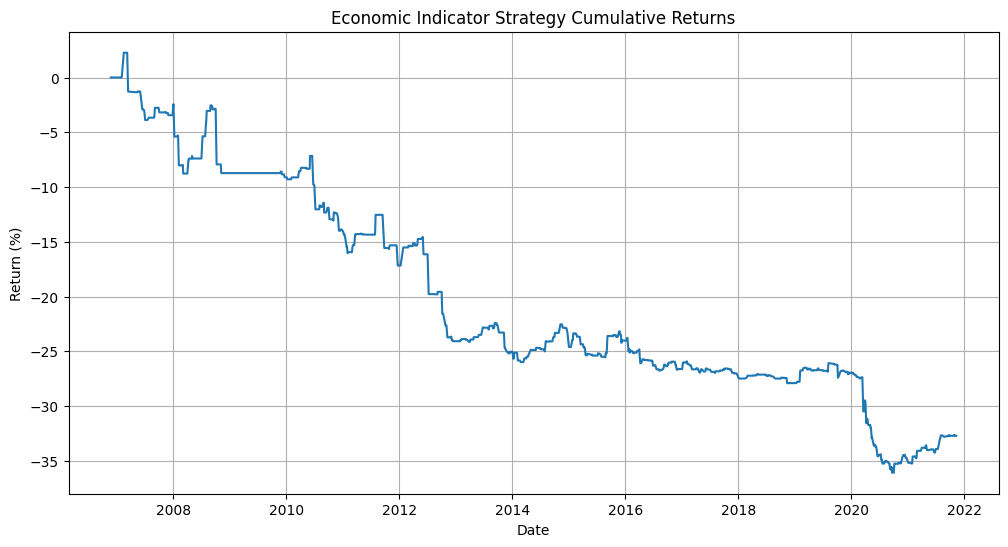

Final Cumulative Return: -32.72%
Daily Return Volatility: 0.10%
Worst Trade Return: -0.99%
Average Fold Test Return: -0.00113%

Test‐Set Trade Profit Accuracy: 25.56% (641/2508 profitable trades)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model as skl
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.pipeline import Pipeline

total_cost = 2 * transaction_cost
horizons = ['_half', '', '_double']
lambdas = np.linspace(0.001, 0.2, 20)

df_combined['DateTime'] = pd.to_datetime(df_combined['DateTime'])
df_combined = df_combined.sort_values('DateTime').reset_index(drop=True)
min_date = df_combined['DateTime'].min()
max_date = df_combined['DateTime'].max()

total_duration = max_date - min_date
initial_train_duration = total_duration * 0.3
train_end_date = min_date + initial_train_duration

all_test_returns = []
all_dates = []
best_horizons_list = []
all_individual_trade_returns = []
fold_mean_returns = []

def identify_broad_indicators(train_data, economic_data):
    """Identify significant economic indicators using Lasso->OLS pipeline"""
    try:
        print("\n=== Identifying Indicators ===")
        train_dates = train_data['DateTime']
        start_date = train_dates.min()
        end_date = train_dates.max()
        print(f"Training period: {start_date} to {end_date}")

        economic_data.index = pd.to_datetime(economic_data.index)
        econ_subset = economic_data.loc[
            (economic_data.index >= start_date) &
            (economic_data.index <= end_date)
        ].copy()

        if econ_subset.empty:
            return {}

        y = econ_subset['SP500']
        X = econ_subset.filter(like='_L1')

        scaler = StandardScaler()
        lassoCV = skl.ElasticNetCV(
            alphas=lambdas,
            l1_ratio=1,
            cv=KFold(n_splits=5, shuffle=True, random_state=0),
            max_iter=10000,
            random_state=0
        )

        pipeCV = Pipeline([('scaler', scaler), ('lasso', lassoCV)])
        pipeCV.fit(X, y)

        selected = X.columns[pipeCV.named_steps['lasso'].coef_ != 0]
        if not selected.empty:
            X_selected = sm.add_constant(X[selected])
            ols = sm.OLS(y, X_selected).fit(cov_type='HC3')
            return {
                var: ols.params[var]
                for var in selected
                if ols.pvalues[var] < 0.05
            }
        return {}

    except Exception as e:
        print(f"Indicator error: {str(e)}")
        return {}

def calculate_grouped_returns(group, coef, horizon):
    """Calculate returns with proper per-trade position sizing"""
    if group.empty:
        return 0.0, []

    positives = group[group['Surprise'] * coef > 0]
    negatives = group[group['Surprise'] * coef < 0]

    pos_count = len(positives)
    neg_count = len(negatives)

    selected_return_pos = 0.0
    if not positives.empty:
        selected_return_pos = positives[f'Return{horizon}'].iloc[0] * (pos_count/(pos_count + neg_count))

    selected_return_neg = 0.0
    if not negatives.empty:
        selected_return_neg = -negatives[f'Return{horizon}'].iloc[0] * (neg_count/(pos_count + neg_count))

    individual_returns = []
    if not positives.empty:
        individual_returns.extend(positives[f'Return{horizon}'] * (pos_count/(pos_count + neg_count)))
    if not negatives.empty:
        individual_returns.extend(-negatives[f'Return{horizon}'] * (neg_count/(pos_count + neg_count)))

    net_return = selected_return_pos + selected_return_neg - (total_cost * (pos_count + neg_count))
    return net_return, individual_returns

while True:
    val_start_date = train_end_date + pd.DateOffset(days=1)
    val_end_date = val_start_date + pd.DateOffset(years=1)
    test_start_date = val_end_date + pd.DateOffset(days=1)
    test_end_date = test_start_date + pd.DateOffset(years=1)

    if val_end_date > max_date or test_end_date > max_date:
        break

    train_mask = df_combined['DateTime'] <= train_end_date
    val_mask = (df_combined['DateTime'] >= val_start_date) & (df_combined['DateTime'] <= val_end_date)
    test_mask = (df_combined['DateTime'] >= test_start_date) & (df_combined['DateTime'] <= test_end_date)

    train_data = df_combined[train_mask]
    val_data = df_combined[val_mask]
    test_data = df_combined[test_mask]

    if val_data.empty or test_data.empty:
        print(f"Skipping period {val_start_date.date()} to {test_end_date.date()} (no data)")
        train_end_date += pd.DateOffset(years=1)
        continue

    sig_coefs = identify_broad_indicators(train_data, economic_data)
    if not sig_coefs:
        train_end_date += pd.DateOffset(years=1)
        continue

    current_returns = []
    current_dates = []
    current_individual_returns = []

    for l1_var, coef in sig_coefs.items():
        indicator = {
            'gdp_gr_L1': 'GDP growth rate',
            'ffr_L1': 'Interest rate',
            'NFP_L1': 'Non-farm payrolls',
            'un_rate_L1': 'Unemployment rate',
            'cci_L1': 'Consumer confidence index',
            'ret_sales_L1': 'Retail sales',
            'IPTI_L1': 'Industrial production',
            'cpi_L1': 'Inflation rate',
            'TXBPPRIVSA_L1': 'Building permits'
        }.get(l1_var, None)

        if not indicator:
            continue

        val_events = val_data[val_data['Broad indicator'] == indicator]
        horizon_performance = {}

        for horizon in horizons:
            val_returns = []
            for _, group in val_events.groupby('DateTime'):
                gr, _ = calculate_grouped_returns(group, coef, horizon)
                val_returns.append(gr)

            if val_returns:
                horizon_performance[horizon] = (1 + np.array(val_returns)).prod() - 1

        if not horizon_performance:
            continue

        optimal_horizon = max(horizon_performance, key=horizon_performance.get)
        test_events = test_data[test_data['Broad indicator'] == indicator]

        if test_events.empty:
            continue

        test_grouped = []
        test_individual = []
        for _, group in test_events.groupby('DateTime'):
            gr, ir = calculate_grouped_returns(group, coef, optimal_horizon)
            test_grouped.append(gr)
            test_individual.extend(ir)

        if test_grouped:
            current_returns.extend(test_grouped)
            current_dates.extend(test_events['DateTime'].unique().tolist())
            current_individual_returns.extend(test_individual)
            best_horizons_list.append(optimal_horizon)

    if current_returns:
        returns_df = pd.DataFrame({
            'date': current_dates,
            'return': current_returns
        }).groupby('date')['return'].sum().reset_index()

        all_test_returns.extend(returns_df['return'].tolist())
        all_dates.extend(returns_df['date'].tolist())
        all_individual_trade_returns.extend(current_individual_returns)

        fold_mean = returns_df['return'].mean()
        fold_mean_returns.append(fold_mean)

    train_end_date += pd.DateOffset(years=1)

if all_test_returns:
    returns_df = pd.DataFrame({'date': all_dates, 'return': all_test_returns})
    returns_df = returns_df.sort_values('date').drop_duplicates('date')
    returns_df = returns_df.set_index('date').resample('D').ffill()

    cumulative_returns = (1 + returns_df['return']).cumprod() - 1
    std_dev = np.std(all_test_returns) * 100
    min_return = np.nanmin(all_individual_trade_returns) * 100 if all_individual_trade_returns else 0.0

    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_returns.index, cumulative_returns * 100)
    plt.title('Economic Indicator Strategy Cumulative Returns')
    plt.xlabel('Date'), plt.ylabel('Return (%)'), plt.grid(True)
    plt.show()

    print(f"Final Cumulative Return: {cumulative_returns.iloc[-1]*100:.2f}%")
    print(f"Daily Return Volatility: {std_dev:.2f}%")
    print(f"Worst Trade Return: {min_return:.2f}%")
    print(f"Average Fold Test Return: {np.mean(fold_mean_returns)*100:.5f}%")  # NEW LINE
    positive_trades = sum(r > 0 for r in all_individual_trade_returns)
    total_trades    = len(all_individual_trade_returns)
    accuracy        = positive_trades / total_trades if total_trades else float('nan')
    print(f"\nTest‐Set Trade Profit Accuracy: {accuracy*100:.2f}% "
          f"({positive_trades}/{total_trades} profitable trades)")
else:
    print("No valid test periods found")

In [ ]:
sorted_dates = sorted(all_dates)
print(f"First test set date: {sorted_dates[0].date()}")
print(f"Last test set date: {sorted_dates[-1].date()}")

# So calculate annual compounded return using 15 years as it doesn;t trade after end of 2021

First test set date: 2006-11-22
Last test set date: 2021-11-10


# **Theoretical Maximum Returns from our data - not reported in paper but useful insights**

**Using all surprises**

In [ ]:

first_half, second_half = np.array_split(df_combined, 2)

second_half_parts = np.array_split(second_half, 14)

optimal_compounded_returns = []

for part in second_half_parts:
    returns = {
        'Return': (1 + abs(part['Return'])).prod() - 1,
        'Return_half': (1 + abs(part['Return_half'])).prod() - 1,
        'Return_double': (1 + abs(part['Return_double'])).prod() - 1
    }

    optimal_return = max(returns.values())
    optimal_compounded_returns.append(optimal_return)

    print(f"Period: {part['DateTime'].iloc[0].date()} to {part['DateTime'].iloc[-1].date()}")
    print(f"Returns - Full: {returns['Return']*100:.2f}%, Half: {returns['Return_half']*100:.2f}%, Double: {returns['Return_double']*100:.2f}%")
    print(f"Selected optimal return: {optimal_return*100:.2f}%\n")

cumulative_return = (1 + pd.Series(optimal_compounded_returns)).prod() - 1
print(f"\nCumulative compounded return across all 14 periods: {cumulative_return*100:.2f}%")
print(f"\nAverage Annual Compounded Return (positive trades only): {((cumulative_return+1)**(1/14)-1)*100:.2f}%")

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.


Period: 2011-04-08 to 2012-03-26
Returns - Full: 660.18%, Half: 564.26%, Double: 1151.24%
Selected optimal return: 1151.24%

Period: 2012-03-26 to 2013-03-14
Returns - Full: 341.26%, Half: 226.55%, Double: 448.73%
Selected optimal return: 448.73%

Period: 2013-03-14 to 2014-03-07
Returns - Full: 252.57%, Half: 178.46%, Double: 353.38%
Selected optimal return: 353.38%

Period: 2014-03-07 to 2015-03-01
Returns - Full: 215.62%, Half: 168.13%, Double: 305.83%
Selected optimal return: 305.83%

Period: 2015-03-01 to 2016-02-22
Returns - Full: 300.39%, Half: 205.02%, Double: 529.52%
Selected optimal return: 529.52%

Period: 2016-02-22 to 2017-02-15
Returns - Full: 149.62%, Half: 105.83%, Double: 213.09%
Selected optimal return: 213.09%

Period: 2017-02-15 to 2018-02-11
Returns - Full: 80.89%, Half: 56.27%, Double: 104.47%
Selected optimal return: 104.47%

Period: 2018-02-11 to 2019-02-06
Returns - Full: 239.22%, Half: 175.81%, Double: 377.41%
Selected optimal return: 377.41%

Period: 2019-02-

**Using all surprise with transaction costs**

In [ ]:
first_half, second_half = np.array_split(df_combined, 2)

second_half_parts = np.array_split(second_half, 14)

optimal_compounded_returns = []

total_cost = 2*transaction_cost

for part in second_half_parts:
    net_returns = {
        'Return': abs(part['Return']) - total_cost,
        'Return_half': abs(part['Return_half']) - total_cost,
        'Return_double': abs(part['Return_double']) - total_cost
    }

    compounded_returns = {
        'Return': (1 + net_returns['Return']).prod() - 1,
        'Return_half': (1 + net_returns['Return_half']).prod() - 1,
        'Return_double': (1 + net_returns['Return_double']).prod() - 1
    }

    optimal_return = max(compounded_returns.values())
    optimal_compounded_returns.append(optimal_return)

    print(f"Period: {part['DateTime'].iloc[0].date()} to {part['DateTime'].iloc[-1].date()}")
    print(f"Compounded Returns (after costs):")
    print(f"Full: {compounded_returns['Return']*100:.2f}%")
    print(f"Half: {compounded_returns['Return_half']*100:.2f}%")
    print(f"Double: {compounded_returns['Return_double']*100:.2f}%")
    print(f"Selected optimal return: {optimal_return*100:.2f}%\n")

cumulative_return = (1 + pd.Series(optimal_compounded_returns)).prod() - 1
print(f"\nFinal Cumulative Compounded Return (after costs): {cumulative_return*100:.2f}%")
print(f"\nAverage Annual Compounded Return (positive trades only): {((cumulative_return+1)**(1/14)-1)*100:.2f}%")

Period: 2011-04-08 to 2012-03-26
Compounded Returns (after costs):
Full: 625.24%
Half: 533.73%
Double: 1093.76%
Selected optimal return: 1093.76%

Period: 2012-03-26 to 2013-03-14
Compounded Returns (after costs):
Full: 320.84%
Half: 211.43%
Double: 423.35%
Selected optimal return: 423.35%

Period: 2013-03-14 to 2014-03-07
Compounded Returns (after costs):
Full: 235.36%
Half: 164.86%
Double: 331.26%
Selected optimal return: 331.26%

Period: 2014-03-07 to 2015-03-01
Compounded Returns (after costs):
Full: 200.23%
Half: 155.05%
Double: 286.04%
Selected optimal return: 286.04%

Period: 2015-03-01 to 2016-02-22
Compounded Returns (after costs):
Full: 280.47%
Half: 189.84%
Double: 498.22%
Selected optimal return: 498.22%

Period: 2016-02-22 to 2017-02-15
Compounded Returns (after costs):
Full: 137.31%
Half: 95.68%
Double: 197.66%
Selected optimal return: 197.66%

Period: 2017-02-15 to 2018-02-11
Compounded Returns (after costs):
Full: 72.14%
Half: 48.71%
Double: 94.59%
Selected optimal retu

**Theoretical maximum for ML model with transaction costs** - this represents post transaction cost returns for an ML model that always predicts when you should short or long the futures to make a profit after transaction costs or simply not trade as neither makes a profit and picks the correct optimal holding period everytime

In [ ]:
first_half, second_half = np.array_split(df_combined, 2)

second_half_parts = np.array_split(second_half, 14)

optimal_compounded_returns = []
total_cost = 2 * transaction_cost

for part in second_half_parts:
    positive_net_returns = {
        'Return': abs(part['Return']) - total_cost,
        'Return_half': abs(part['Return_half']) - total_cost,
        'Return_double': abs(part['Return_double']) - total_cost
    }

    positive_net_returns = {
        k: v[v > 0] for k, v in positive_net_returns.items()
    }

    compounded_returns = {}
    for horizon in ['Return', 'Return_half', 'Return_double']:
        if len(positive_net_returns[horizon]) > 0:
            compounded_returns[horizon] = (1 + positive_net_returns[horizon]).prod() - 1
        else:
            compounded_returns[horizon] = 0

        print(f"{horizon}: {len(positive_net_returns[horizon])} positive trades")

    optimal_return = max(compounded_returns.values())
    optimal_compounded_returns.append(optimal_return)

    print(f"\nPeriod: {part['DateTime'].iloc[0].date()} to {part['DateTime'].iloc[-1].date()}")
    print(f"Compounded Returns (positive trades only):")
    print(f"Full: {compounded_returns['Return']*100:.2f}% (n={len(positive_net_returns['Return'])})")
    print(f"Half: {compounded_returns['Return_half']*100:.2f}% (n={len(positive_net_returns['Return_half'])})")
    print(f"Double: {compounded_returns['Return_double']*100:.2f}% (n={len(positive_net_returns['Return_double'])})")
    print(f"Selected optimal return: {optimal_return*100:.2f}%\n")

cumulative_return = (1 + pd.Series(optimal_compounded_returns)).prod() - 1
print(f"\nFinal Cumulative Compounded Return (positive trades only): {cumulative_return*100:.2f}%")
print(f"\nAverage Annual Compounded Return (positive trades only): {((cumulative_return+1)**(1/14)-1)*100:.2f}%")

Return: 900 positive trades
Return_half: 901 positive trades
Return_double: 924 positive trades

Period: 2011-04-08 to 2012-03-26
Compounded Returns (positive trades only):
Full: 626.80% (n=900)
Half: 535.06% (n=901)
Double: 1094.89% (n=924)
Selected optimal return: 1094.89%

Return: 919 positive trades
Return_half: 876 positive trades
Return_double: 908 positive trades

Period: 2012-03-26 to 2013-03-14
Compounded Returns (positive trades only):
Full: 321.48% (n=919)
Half: 212.57% (n=876)
Double: 424.42% (n=908)
Selected optimal return: 424.42%

Return: 945 positive trades
Return_half: 931 positive trades
Return_double: 954 positive trades

Period: 2013-03-14 to 2014-03-07
Compounded Returns (positive trades only):
Full: 236.32% (n=945)
Half: 165.80% (n=931)
Double: 332.29% (n=954)
Selected optimal return: 332.29%

Return: 936 positive trades
Return_half: 940 positive trades
Return_double: 961 positive trades

Period: 2014-03-07 to 2015-03-01
Compounded Returns (positive trades only):


**Results above shows the problem of overtrading with our problem at hand - so want to also give the option to not trade especially if not going to make a profit on the trade**

# **ML model**

**First creating classification variables using transaction cost of 0.0025bps and explanatory variables to use in models**

In [ ]:
df_combined['Profit'] = np.where(
    np.isnan(df_combined['Return']),
    np.nan,
    np.where(
        df_combined['Return'] > 2 * transaction_cost,
        1,
        np.where(
            -df_combined['Return'] > 2 * transaction_cost,
            2,
            0
        )
    )
)

df_combined['Profit_half'] = np.where(
    np.isnan(df_combined['Return_half']),
    np.nan,
    np.where(
        df_combined['Return_half'] > 2 * transaction_cost,
        1,
        np.where(
            -df_combined['Return_half'] > 2 * transaction_cost,
            2,
            0
        )
    )
)

df_combined['Profit_double'] = np.where(
    np.isnan(df_combined['Return_double']),
    np.nan,
    np.where(
        df_combined['Return_double'] > 2 * transaction_cost,
        1,
        np.where(
            -df_combined['Return_double'] > 2 * transaction_cost,
            2,
            0
        )
    )
)

In [ ]:
df_intm = df_combined[df_combined['Surprise Occurred'] == True]

In [ ]:
df_intm['Return'].isna().sum()

"""
This confirms that we need to properly line up our new Profit variables first as they correspond to the observation after
their CORRESPONDING surprise occurs so they would be using the wrong Surprise value and ticker in our ML model, not a problem
for the previous models as they didn't use these variables.

Also have to shift Return values up one row for the same reason
"""

"\nThis confirms that we need to properly line up our new Profit variables first as they correspond to the observation after\ntheir CORRESPONDING surprise occurs so they would be using the wrong Surprise value and ticker in our ML model, not a problem\nfor the previous models as they didn't use these variables.\n\nAlso have to shift Return values up one row for the same reason\n"

In [ ]:
df_combined['Return'] = df_combined['Return'].shift(-1)
df_combined['Return_half'] = df_combined['Return_half'].shift(-1)
df_combined['Return_double'] = df_combined['Return_double'].shift(-1)

df_combined['Profit'] = df_combined['Profit'].shift(-1)
df_combined['Profit_half'] = df_combined['Profit_half'].shift(-1)
df_combined['Profit_double'] = df_combined['Profit_double'].shift(-1)

In [ ]:
df_combined.columns

Index(['Ticker', 'Description', 'Broad indicator', 'Date_es', 'Time_es',
       'Open', 'Close', 'Volume', 'DateTime', 'Date_surprise', 'Period',
       'Event', 'Actual', 'Prior', 'Revised', 'Freq.', 'First Rev.',
       'Last Rev.', 'Time_surprise', 'C', 'Category', 'Subcategory', 'R',
       'Day', 'Surv(M)', '# Ests.', 'Std Dev', 'Surprise', 'Country/Region',
       'Flag', '_merge', 'Surprise Occurred', 'First Post Surprise',
       'N_Return', 'N_Return_half', 'N_Return_double', 'Return', 'Return_half',
       'Return_double', 'Profit', 'Profit_half', 'Profit_double'],
      dtype='object')

In [ ]:
# Seeing if the profit classifier was correctly created by looking at some rows for when classification variable = 0,1 & 2
df_combined[df_combined['Profit'] == 1].head()

,Ticker,Description,Broad indicator,Date_es,Time_es,Open,Close,Volume,DateTime,Date_surprise,...,First Post Surprise,N_Return,N_Return_half,N_Return_double,Return,Return_half,Return_double,Profit,Profit_half,Profit_double
8013,GDP CQOQ Index,GDP Quarterly Change QoQ,GDP growth rate,12/23/1997,07:30:00,1189.71,1189.71,0.0,1997-12-23 07:30:00,1997-12-23,...,False,NaN,NaN,NaN,0.000261,0.000261,0.000000,1.0,1.0,0.0
8015,GDP CQOQ Index,GDP Quarterly Change QoQ,GDP growth rate,04/30/1998,07:30:00,1338.85,1338.85,0.0,1998-04-30 07:30:00,1998-04-30,...,False,NaN,NaN,NaN,0.012553,0.010044,0.013008,1.0,1.0,1.0
14293,NAPMPMI Index,NaN,NaN,06/01/1998,09:00:00,1335.49,1334.87,0.0,1998-06-01 09:00:00,1998-06-01,...,False,NaN,NaN,NaN,0.003439,0.003206,0.003206,1.0,1.0,1.0
12725,LEI CHNG Index,NaN,NaN,06/02/1998,09:00:00,1343.12,1342.51,0.0,1998-06-02 09:00:00,1998-06-02,...,True,0.0,0.0,-0.001817,0.000909,0.000685,-0.001594,1.0,1.0,2.0
18480,PRODNFR% Index,Nonfarm Productivity Percentage Change,GDP growth rate,06/04/1998,09:00:00,1320.21,1321.13,0.0,1998-06-04 09:00:00,1998-06-04,...,False,NaN,NaN,NaN,0.003242,0.004166,0.002545,1.0,1.0,1.0


In [ ]:
# Seeing if the profit classifier was correctly created by looking at some rows for when classification variable = 0,1 & 2

df_combined[df_combined['Profit'] == 2].head()

,Ticker,Description,Broad indicator,Date_es,Time_es,Open,Close,Volume,DateTime,Date_surprise,...,First Post Surprise,N_Return,N_Return_half,N_Return_double,Return,Return_half,Return_double,Profit,Profit_half,Profit_double
8014,GDP CQOQ Index,GDP Quarterly Change QoQ,GDP growth rate,03/26/1998,07:30:00,1355.65,1355.96,0.0,1998-03-26 07:30:00,1998-03-26,...,False,NaN,NaN,NaN,-0.000229,0.001350,0.000000,2.0,1.0,0.0
9582,INJCJC Index,Initial Jobless Claims,Unemployment rate,06/04/1998,07:30:00,1322.96,1323.57,0.0,1998-06-04 07:30:00,1998-06-04,...,False,NaN,NaN,NaN,-0.000461,0.000227,-0.000461,2.0,1.0,2.0
18128,PPI CHNG Index,Producer Price Index (PPI) Monthly Change,Inflation rate,06/12/1998,07:30:00,1337.57,1337.57,0.0,1998-06-12 07:30:00,1998-06-12,...,False,NaN,NaN,NaN,-0.001129,-0.001129,0.000680,2.0,2.0,1.0
18738,PXFECHNG Index,NaN,NaN,06/12/1998,07:30:00,1337.57,1337.57,0.0,1998-06-12 07:30:00,1998-06-12,...,True,-0.001129,-0.001129,0.00068,-0.001353,-0.001129,0.000224,2.0,2.0,1.0
292686,NaN,NaN,NaN,06/16/1998,07:29:00,1321.86,1321.86,0.0,1998-06-16 07:29:00,NaN,...,False,NaN,NaN,NaN,-0.000461,0.000000,0.000227,2.0,0.0,1.0


In [ ]:
df_combined['Profit'].value_counts()

,count
Profit,
1.0,11292
2.0,10834
0.0,942


In [ ]:
# Now we create the technical explanatory variables based on literature

def create_technical_features(df):
    """
    Creates all technical features for a dataframe containing price/volume data
    and three return columns (Return, Return_half, Return_double)
    """
    df['Volume'] = df['Volume']
    df['Price'] = df['Open']

    ma_windows = [5, 10, 15, 20, 50, 100, 200]
    for window in ma_windows:
        df[f'SMA{window}'] = df['Open'].rolling(window).mean()

    for window in [5, 10, 15, 20, 50, 100, 200]:
        df[f'SMA{window}Cross'] = (df['Open'] > df[f'SMA{window}']).astype(int)

    trend_periods = [10, 15, 50]
    for period in trend_periods:
        df[f'UpDown{period}'] = np.sign(df['Open'].pct_change(period))

    return_cols = ['Return', 'Return_half', 'Return_double']
    for col in return_cols:
        if col in df.columns:
            df[col] = df[col]

    return df


df_combined = create_technical_features(df_combined)



<ipython-input-102-5f0994528be7>:25: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f'UpDown{period}'] = np.sign(df['Open'].pct_change(period))
<ipython-input-102-5f0994528be7>:25: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f'UpDown{period}'] = np.sign(df['Open'].pct_change(period))
<ipython-input-102-5f0994528be7>:25: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[f'UpDown{period}'] = np.s

In [ ]:
df_combined['Volume_L1'] = df_combined['Volume'].shift(1)

In [ ]:
df_combined.columns

Index(['Ticker', 'Description', 'Broad indicator', 'Date_es', 'Time_es',
       'Open', 'Close', 'Volume', 'DateTime', 'Date_surprise', 'Period',
       'Event', 'Actual', 'Prior', 'Revised', 'Freq.', 'First Rev.',
       'Last Rev.', 'Time_surprise', 'C', 'Category', 'Subcategory', 'R',
       'Day', 'Surv(M)', '# Ests.', 'Std Dev', 'Surprise', 'Country/Region',
       'Flag', '_merge', 'Surprise Occurred', 'First Post Surprise',
       'N_Return', 'N_Return_half', 'N_Return_double', 'Return', 'Return_half',
       'Return_double', 'Profit', 'Profit_half', 'Profit_double', 'Price',
       'SMA5', 'SMA10', 'SMA15', 'SMA20', 'SMA50', 'SMA100', 'SMA200',
       'SMA5Cross', 'SMA10Cross', 'SMA15Cross', 'SMA20Cross', 'SMA50Cross',
       'SMA100Cross', 'SMA200Cross', 'UpDown10', 'UpDown15', 'UpDown50',
       'Volume_L1'],
      dtype='object')

In [ ]:
!pip install tensorflow

In [ ]:
# One-hot encoding our Ticker column
ticker_dummies = pd.get_dummies(df_combined['Ticker'], prefix='Ticker')

df_combined = pd.concat([df_combined, ticker_dummies], axis=1)

ticker_cols = [col for col in df_combined.columns if col.startswith('Ticker_')]

feature_cols = [
    'Surprise', 'Volume_L1', 'R','SMA5', 'SMA10',
    'SMA20', 'SMA200', 'SMA5Cross', 'SMA10Cross','SMA15Cross',
    'SMA20Cross', 'SMA50Cross', 'SMA100Cross', 'SMA200Cross', 'UpDown10',
    'UpDown15', 'UpDown50'
] + ticker_cols



In [ ]:
feature_cols

['Surprise',
 'Volume_L1',
 'R',
 'SMA5',
 'SMA10',
 'SMA20',
 'SMA200',
 'SMA5Cross',
 'SMA10Cross',
 'SMA15Cross',
 'SMA20Cross',
 'SMA50Cross',
 'SMA100Cross',
 'SMA200Cross',
 'UpDown10',
 'UpDown15',
 'UpDown50',
 'Ticker_ACNFCOMF Index',
 'Ticker_ADP CHNG Index',
 'Ticker_AHE MOM% Index',
 'Ticker_AHE YOY% Index',
 'Ticker_AMSPPACE Index',
 'Ticker_AWH TOTL Index',
 'Ticker_BBRSCPYY Index',
 'Ticker_BPGCGI Index',
 'Ticker_CFNAI Index',
 'Ticker_CGNOXAI% Index',
 'Ticker_CGSHXAI% Index',
 'Ticker_CHPMINDX Index',
 'Ticker_CICRTOT Index',
 'Ticker_CNSTTMOM Index',
 'Ticker_COMFBTWR Index',
 'Ticker_COMFCOMF Index',
 'Ticker_CONCCONF Index',
 'Ticker_CONCEXP Index',
 'Ticker_CONCPSIT Index',
 'Ticker_CONSCURR Index',
 'Ticker_CONSEXP Index',
 'Ticker_CONSP5MD Index',
 'Ticker_CONSPXMD Index',
 'Ticker_CONSSENT Index',
 'Ticker_COSTNFR% Index',
 'Ticker_CPI CHNG Index',
 'Ticker_CPI XYOY Index',
 'Ticker_CPI YOY Index',
 'Ticker_CPTICHNG Index',
 'Ticker_CPUPAXFE Index',
 'Ticker_CP

In [ ]:
df_combined[feature_cols]

,Surprise,Volume_L1,R,SMA5,SMA10,SMA20,SMA200,SMA5Cross,SMA10Cross,SMA15Cross,...,Ticker_USPHTMOM Index,Ticker_USPHTYOY Index,Ticker_USTBTOT Index,Ticker_USTGTTCB Index,Ticker_USUDMAER Index,Ticker_USURTOT Index,Ticker_USWHMANS Index,Ticker_USWHTOT Index,Ticker_VNCCCMOM Index,Ticker_VNCCTOT Index
23088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,False,False,False,False,False,False,False,False,False,False
23089,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,...,False,False,False,False,False,False,False,False,False,False
23090,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,...,False,False,False,False,False,False,False,False,False,False
23091,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,0,0,...,False,False,False,False,False,False,False,False,False,False
23092,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,False,False,False,False,False,False,False,False,False,False
19078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,False,False,False,False,False,False,False,False,False,False
19096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,False,False,False,False,False,False,False,False,False,False
19097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Filter only rows where Profit label is available
df_ml = df_combined[df_combined['Profit'].notna()].copy()
df_ml = df_ml.reset_index()

In [ ]:
df_ml[feature_cols].isna().sum()

,0
Surprise,3391
Volume_L1,0
R,3391
SMA5,0
SMA10,0
...,...
Ticker_USURTOT Index,0
Ticker_USWHMANS Index,0
Ticker_USWHTOT Index,0
Ticker_VNCCCMOM Index,0


# **XGBoost Model**

In [ ]:
!pip install xgboost

**Non-rolling XGBoost (not our final model, just to ensure XGBoost model is first properly coded before adding additional complexity)**

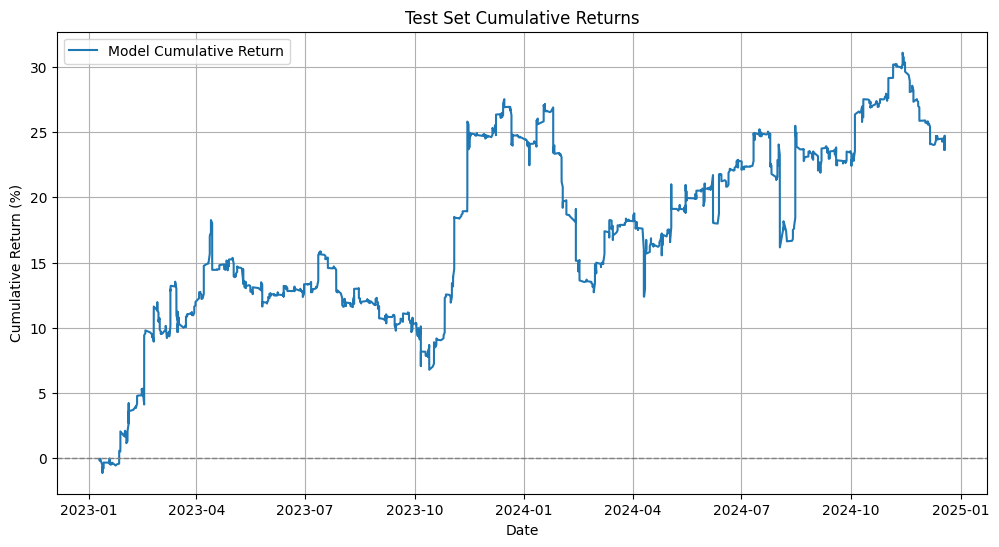

Final Cumulative Return: 23.65%
Prediction Distribution: {np.int32(1): np.int64(1306), np.int32(2): np.int64(663)}


In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

total_cost = 2 * transaction_cost

df_ml = df_ml.dropna(subset=['Surprise'])

train_data, test_data = train_test_split(df_ml, test_size=0.1, shuffle=False)

scaler = StandardScaler()
X_train = scaler.fit_transform(train_data[feature_cols])
X_test = scaler.transform(test_data[feature_cols])
y_train = train_data['Profit']

model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

test_preds = model.predict(X_test)

def calculate_returns(data, preds):
    """Returns individual period returns for plotting"""
    returns = data['Return'].values
    signed_returns = np.where(
        preds == 1, returns - total_cost,
        np.where(preds == 2, -returns - total_cost, 0)
    )
    return signed_returns

test_returns = calculate_returns(test_data, test_preds)
cumulative_returns = np.cumprod(1 + test_returns) - 1

plt.figure(figsize=(12, 6))
plt.plot(test_data['DateTime'], (cumulative_returns)*100, label='Model Cumulative Return')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1)
plt.title('Test Set Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.legend()
plt.grid(True)
plt.show()

final_return = cumulative_returns[-1]
print(f"Final Cumulative Return: {final_return*100:.2f}%")
print("Prediction Distribution:", dict(zip(*np.unique(test_preds, return_counts=True))))

In [ ]:
df_combined['Profit'].value_counts()

,count
Profit,
1.0,11292
2.0,10834
0.0,942


**Rolling XGBoost model**

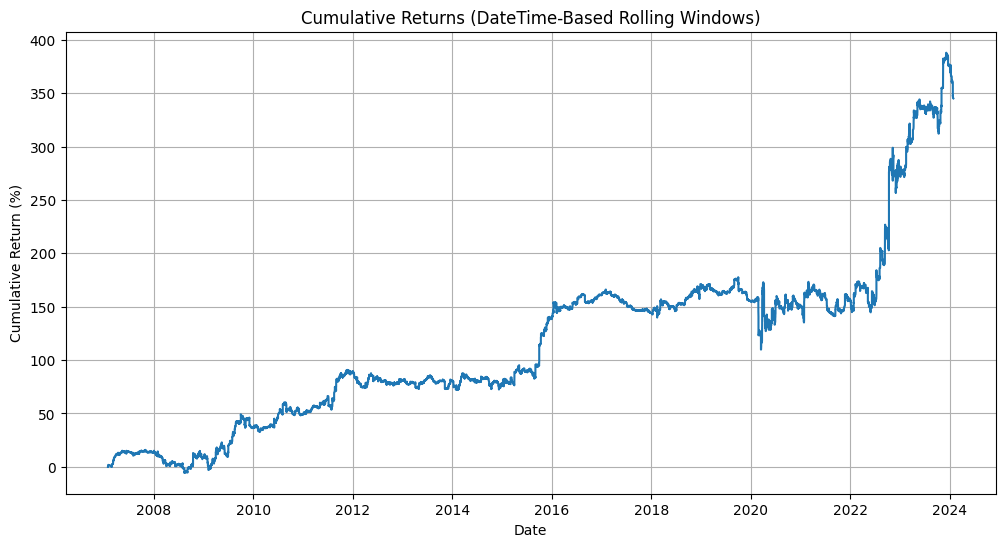

Final return: 345.14%

Test Predictions Distribution:
0     108
1    7831
2    6729
Name: count, dtype: int64

Average Test Accuracy: 49.08%


In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import os, random

random.seed(42)
np.random.seed(42)

total_cost = 2 * transaction_cost
horizons = ['', '_half', '_double']

df_ml = df_ml.dropna(subset=['Surprise']).sort_values('DateTime')
min_date = df_ml['DateTime'].min()
max_date = df_ml['DateTime'].max()

total_duration = max_date - min_date
initial_train_duration = total_duration * 0.3
train_end_date = min_date + initial_train_duration

results = []
all_test_returns = []
all_dates = []
all_test_preds = []
test_accuracies = []

while True:
    val_start_date = train_end_date + pd.DateOffset(days=1)
    val_end_date = val_start_date + pd.DateOffset(years=1)

    test_start_date = val_end_date + pd.DateOffset(days=1)
    test_end_date = test_start_date + pd.DateOffset(years=1)

    if val_end_date > max_date or test_end_date > max_date:
        break

    train_mask = df_ml['DateTime'] <= train_end_date
    val_mask = (df_ml['DateTime'] >= val_start_date) & (df_ml['DateTime'] <= val_end_date)
    test_mask = (df_ml['DateTime'] >= test_start_date) & (df_ml['DateTime'] <= test_end_date)

    train_data = df_ml[train_mask]
    val_data = df_ml[val_mask]
    test_data = df_ml[test_mask]

    if val_data.empty or test_data.empty:
        print(f"Skipping period {val_start_date.date()} to {test_end_date.date()} (no data)")
        train_end_date += pd.DateOffset(years=1)
        continue

    best_horizon, best_model = None, None
    best_val_return = -np.inf

    for horizon in horizons:
        try:
            scaler = StandardScaler()
            X_train = scaler.fit_transform(train_data[feature_cols])
            X_val = scaler.transform(val_data[feature_cols])
            y_train = train_data[f'Profit{horizon}']
            y_val = val_data[f'Profit{horizon}']

            xgb_params = {
              'num_class':         3,
              'n_estimators':     60,
              'max_depth':         7,
            }
            model = xgb.XGBClassifier(**xgb_params)

            model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

            val_preds = model.predict(X_val)
            val_returns = np.where(
                val_preds == 1, val_data[f'Return{horizon}'] - total_cost,
                np.where(val_preds == 2, -val_data[f'Return{horizon}'] - total_cost, 0))
            total_val_return = (1 + val_returns).prod() - 1

            if total_val_return > best_val_return:
                best_val_return = total_val_return
                best_horizon = horizon
                best_model = model

        except KeyError as e:
            print(f"Missing column {e} - skipping horizon {horizon}")
            continue

    if best_model:
        X_test = scaler.transform(test_data[feature_cols])
        test_preds = best_model.predict(X_test)

        all_test_preds.extend(test_preds)
        y_test = test_data[f'Profit{best_horizon}'].values
        test_accuracies.append(np.mean(test_preds == y_test))

        test_returns = np.where(
            test_preds == 1, test_data[f'Return{best_horizon}'] - total_cost,
            np.where(test_preds == 2, -test_data[f'Return{best_horizon}'] - total_cost, 0))

        all_test_returns.extend(test_returns)
        all_dates.extend(test_data['DateTime'].tolist())

    train_end_date += pd.DateOffset(years=1)

if all_test_returns:
    cumulative_returns = (1 + np.array(all_test_returns)).cumprod() - 1
    plt.figure(figsize=(12, 6))
    plt.plot(all_dates, cumulative_returns * 100)
    plt.title('Cumulative Returns (DateTime-Based Rolling Windows)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (%)')
    plt.grid(True)
    plt.show()
    print(f"Final return: {cumulative_returns[-1]*100:.2f}%")

    print("\nTest Predictions Distribution:")
    print(pd.Series(all_test_preds).value_counts().sort_index())

    if test_accuracies:
        print(f"\nAverage Test Accuracy: {np.mean(test_accuracies):.2%}")
    else:
        print("\nNo accuracy metrics calculated")
else:
    print("No valid test periods found")

In [ ]:
# Now we get the first and last observation in the test set so we can compute compounded return (comes out to almost exactly 17 years)

if 'all_dates' in globals() and len(all_dates) > 0:  # Check if all_dates exists
    first_test_date = pd.to_datetime(min(all_dates)).strftime('%Y-%m-%d %H:%M')
    last_test_date = pd.to_datetime(max(all_dates)).strftime('%Y-%m-%d %H:%M')
    print(f"Test Period: {first_test_date} to {last_test_date}")
else:
    print("No test dates found. Run backtest first.")

Test Period: 2007-01-30 09:00 to 2024-01-29 09:30


**This code shows that we have to eventually deal with same-time surprises**

In [ ]:
duplicate_count = df_ml['DateTime'].duplicated(keep=False).sum()

total_rows = len(df_ml)
unique_datetimes = df_ml['DateTime'].nunique()
duplicate_instances = total_rows - unique_datetimes

print(f"Total duplicate DateTime instances: {duplicate_count}")
print(f"Breakdown: {duplicate_instances} redundant timestamps (i.e., {unique_datetimes} unique dates vs. {total_rows} total rows)")

Total duplicate DateTime instances: 13810
Breakdown: 9619 redundant timestamps (i.e., 10038 unique dates vs. 19657 total rows)


**Rolling Random Forest model**

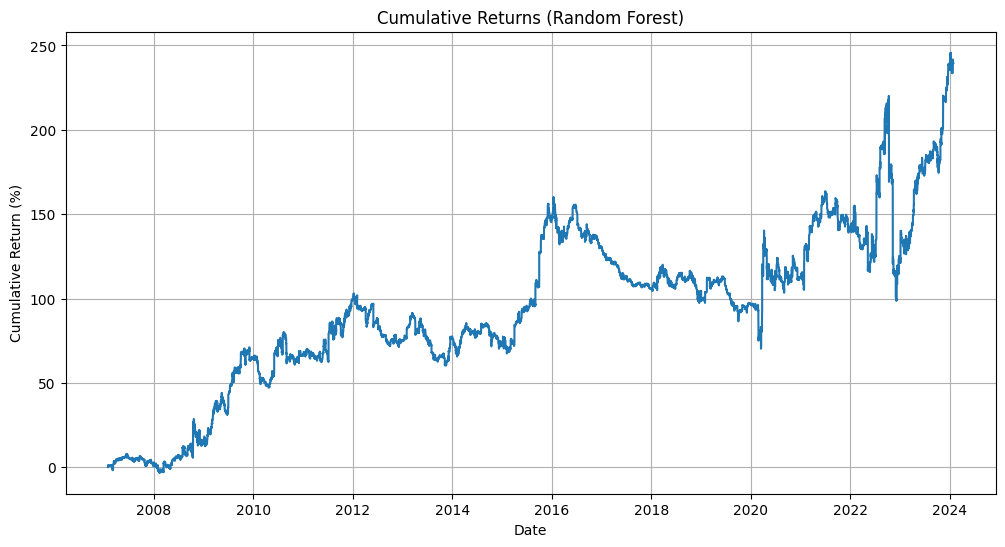

Final return: 239.51%

Test Predictions Distribution:
1.0    8376
2.0    6292
Name: count, dtype: int64

Average Test Accuracy: 49.66%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import os, random

random.seed(42)
np.random.seed(42)

total_cost = 2 * transaction_cost
horizons = ['', '_half', '_double']

df_ml = df_ml.dropna(subset=['Surprise']).sort_values('DateTime')
min_date = df_ml['DateTime'].min()
max_date = df_ml['DateTime'].max()

total_duration = max_date - min_date
initial_train_duration = total_duration * 0.3
train_end_date = min_date + initial_train_duration

results = []
all_test_returns = []
all_dates = []
all_test_preds = []
test_accuracies = []

while True:
    val_start_date = train_end_date + pd.DateOffset(days=1)
    val_end_date = val_start_date + pd.DateOffset(years=1)

    test_start_date = val_end_date + pd.DateOffset(days=1)
    test_end_date = test_start_date + pd.DateOffset(years=1)

    if val_end_date > max_date or test_end_date > max_date:
        break

    train_mask = df_ml['DateTime'] <= train_end_date
    val_mask = (df_ml['DateTime'] >= val_start_date) & (df_ml['DateTime'] <= val_end_date)
    test_mask = (df_ml['DateTime'] >= test_start_date) & (df_ml['DateTime'] <= test_end_date)

    train_data = df_ml[train_mask]
    val_data = df_ml[val_mask]
    test_data = df_ml[test_mask]

    if val_data.empty or test_data.empty:
        print(f"Skipping period {val_start_date.date()} to {test_end_date.date()} (no data)")
        train_end_date += pd.DateOffset(years=1)
        continue

    best_horizon, best_model = None, None
    best_val_return = -np.inf

    for horizon in horizons:
        try:
            scaler = StandardScaler()
            X_train = scaler.fit_transform(train_data[feature_cols])
            X_val = scaler.transform(val_data[feature_cols])
            y_train = train_data[f'Profit{horizon}']
            y_val = val_data[f'Profit{horizon}']

            model = RandomForestClassifier(
                n_estimators=100,
                criterion='gini',
                min_samples_leaf=4,
                random_state=42
            )
            model.fit(X_train, y_train)

            val_preds = model.predict(X_val)
            val_returns = np.where(
                val_preds == 1, val_data[f'Return{horizon}'] - total_cost,
                np.where(val_preds == 2, -val_data[f'Return{horizon}'] - total_cost, 0))
            total_val_return = (1 + val_returns).prod() - 1

            if total_val_return > best_val_return:
                best_val_return = total_val_return
                best_horizon = horizon
                best_model = model

        except KeyError as e:
            print(f"Missing column {e} - skipping horizon {horizon}")
            continue

    if best_model:
        X_test = scaler.transform(test_data[feature_cols])
        test_preds = best_model.predict(X_test)

        all_test_preds.extend(test_preds)
        y_test = test_data[f'Profit{best_horizon}'].values
        test_accuracies.append(np.mean(test_preds == y_test))

        test_returns = np.where(
            test_preds == 1, test_data[f'Return{best_horizon}'] - total_cost,
            np.where(test_preds == 2, -test_data[f'Return{best_horizon}'] - total_cost, 0))

        all_test_returns.extend(test_returns)
        all_dates.extend(test_data['DateTime'].tolist())

    train_end_date += pd.DateOffset(years=1)

if all_test_returns:
    cumulative_returns = (1 + np.array(all_test_returns)).cumprod() - 1
    plt.figure(figsize=(12, 6))
    plt.plot(all_dates, cumulative_returns * 100)
    plt.title('Cumulative Returns (Random Forest)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (%)')
    plt.grid(True)
    plt.show()
    print(f"Final return: {cumulative_returns[-1]*100:.2f}%")

    print("\nTest Predictions Distribution:")
    print(pd.Series(all_test_preds).value_counts().sort_index())

    if test_accuracies:
        print(f"\nAverage Test Accuracy: {np.mean(test_accuracies):.2%}")
    else:
        print("\nNo accuracy metrics calculated")
else:
    print("No valid test periods found")

**Rolling Logistic Regression Model**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: 

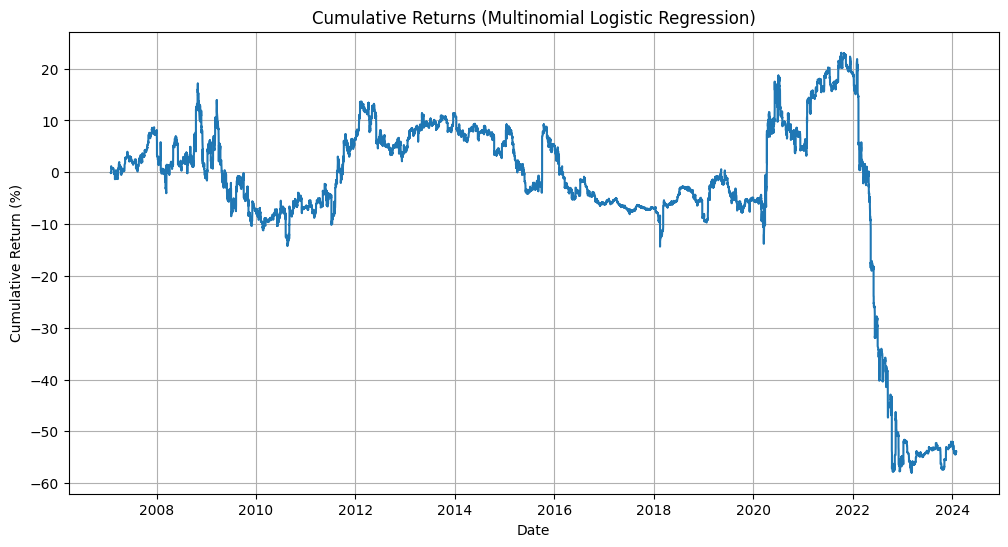

Final return: -53.93%

Test Predictions Distribution:
0.0     106
1.0    9200
2.0    5362
Name: count, dtype: int64

Average Test Accuracy: 48.42%


In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import os, random

random.seed(42)
np.random.seed(42)

total_cost = 2 * transaction_cost
horizons = ['', '_half', '_double']

df_ml = df_ml.dropna(subset=['Surprise']).sort_values('DateTime')
min_date = df_ml['DateTime'].min()
max_date = df_ml['DateTime'].max()

total_duration = max_date - min_date
initial_train_duration = total_duration * 0.3
train_end_date = min_date + initial_train_duration

results = []
all_test_returns = []
all_dates = []
all_test_preds = []
test_accuracies = []

while True:
    val_start_date = train_end_date + pd.DateOffset(days=1)
    val_end_date = val_start_date + pd.DateOffset(years=1)

    test_start_date = val_end_date + pd.DateOffset(days=1)
    test_end_date = test_start_date + pd.DateOffset(years=1)

    if val_end_date > max_date or test_end_date > max_date:
        break

    train_mask = df_ml['DateTime'] <= train_end_date
    val_mask = (df_ml['DateTime'] >= val_start_date) & (df_ml['DateTime'] <= val_end_date)
    test_mask = (df_ml['DateTime'] >= test_start_date) & (df_ml['DateTime'] <= test_end_date)

    train_data = df_ml[train_mask]
    val_data = df_ml[val_mask]
    test_data = df_ml[test_mask]

    if val_data.empty or test_data.empty:
        print(f"Skipping period {val_start_date.date()} to {test_end_date.date()} (no data)")
        train_end_date += pd.DateOffset(years=1)
        continue

    best_horizon, best_model = None, None
    best_val_return = -np.inf

    for horizon in horizons:
        try:
            scaler = StandardScaler()
            X_train = scaler.fit_transform(train_data[feature_cols])
            X_val = scaler.transform(val_data[feature_cols])
            y_train = train_data[f'Profit{horizon}']
            y_val = val_data[f'Profit{horizon}']

            model = LogisticRegression(
                multi_class='multinomial',
                solver='saga',
                max_iter=100,
                random_state=42
            )
            model.fit(X_train, y_train)

            val_preds = model.predict(X_val)
            val_returns = np.where(
                val_preds == 1, val_data[f'Return{horizon}'] - total_cost,
                np.where(val_preds == 2, -val_data[f'Return{horizon}'] - total_cost, 0))
            total_val_return = (1 + val_returns).prod() - 1

            if total_val_return > best_val_return:
                best_val_return = total_val_return
                best_horizon = horizon
                best_model = model

        except KeyError as e:
            print(f"Missing column {e} - skipping horizon {horizon}")
            continue

    if best_model:
        X_test = scaler.transform(test_data[feature_cols])
        test_preds = best_model.predict(X_test)

        all_test_preds.extend(test_preds)
        y_test = test_data[f'Profit{best_horizon}'].values
        test_accuracies.append(np.mean(test_preds == y_test))

        test_returns = np.where(
            test_preds == 1, test_data[f'Return{best_horizon}'] - total_cost,
            np.where(test_preds == 2, -test_data[f'Return{best_horizon}'] - total_cost, 0))

        all_test_returns.extend(test_returns)
        all_dates.extend(test_data['DateTime'].tolist())

    train_end_date += pd.DateOffset(years=1)

if all_test_returns:
    cumulative_returns = (1 + np.array(all_test_returns)).cumprod() - 1
    plt.figure(figsize=(12, 6))
    plt.plot(all_dates, cumulative_returns * 100)
    plt.title('Cumulative Returns (Multinomial Logistic Regression)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (%)')
    plt.grid(True)
    plt.show()
    print(f"Final return: {cumulative_returns[-1]*100:.2f}%")

    print("\nTest Predictions Distribution:")
    print(pd.Series(all_test_preds).value_counts().sort_index())

    if test_accuracies:
        print(f"\nAverage Test Accuracy: {np.mean(test_accuracies):.2%}")
    else:
        print("\nNo accuracy metrics calculated")
else:
    print("No valid test periods found")

**Incorporating other prediction metrics and average return computation into rolling strategies**

**XGBoost**

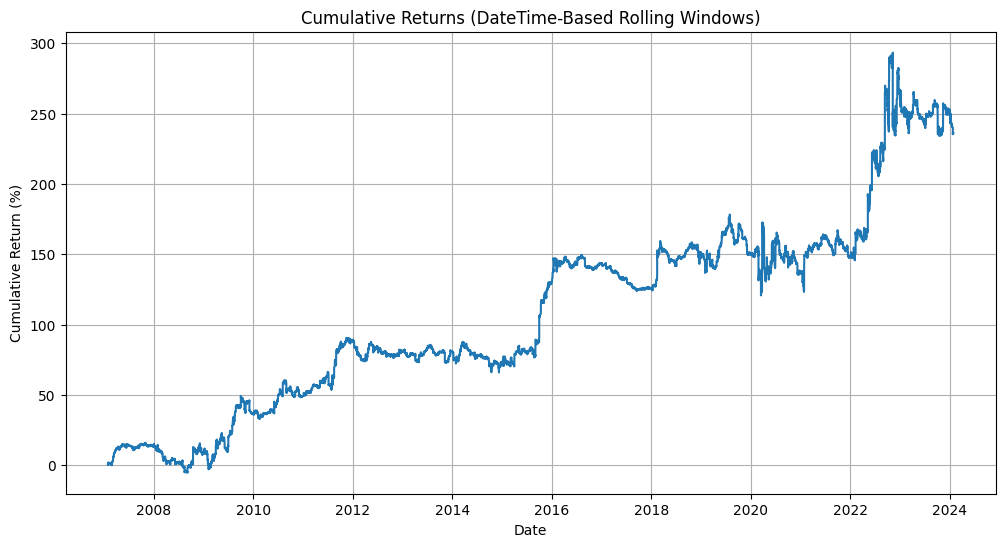

Final Cumulative Compounded Return: 236.26%

Overall Test Accuracy : 48.74%
Overall Precision     : 35.31%
Overall Recall        : 34.06%
Overall F1 Score      : 33.62%
Overall ROC AUC       : 53.55%

Average Fold Test Return : 0.00885%

Optimal Horizon Counts:
_half       8
_double     5
standard    4
Name: count, dtype: int64


In [ ]:

import os
os.environ['OMP_NUM_THREADS']      = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS']      = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS']    = '1'
os.environ['PYTHONHASHSEED']         = '0'

import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score
)
import numpy as np
import pandas as pd
import random


total_cost = 2 * transaction_cost
horizons = ['', '_half', '_double']

df_ml = df_ml.dropna(subset=['Surprise']).sort_values('DateTime')
min_date = df_ml['DateTime'].min()
max_date = df_ml['DateTime'].max()

total_duration = max_date - min_date
initial_train_duration = total_duration * 0.3
train_end_date = min_date + initial_train_duration

results = []
all_test_returns   = []
all_dates          = []
all_test_preds     = []
all_test_truths    = []
all_test_probas    = []
fold_mean_returns  = []
best_horizons_list = []

while True:
    val_start_date = train_end_date + pd.DateOffset(days=1)
    val_end_date   = val_start_date + pd.DateOffset(years=1)

    test_start_date = val_end_date + pd.DateOffset(days=1)
    test_end_date   = test_start_date + pd.DateOffset(years=1)

    if val_end_date > max_date or test_end_date > max_date:
        break

    train_mask = df_ml['DateTime'] <= train_end_date
    val_mask   = (df_ml['DateTime'] >= val_start_date) & (df_ml['DateTime'] <= val_end_date)
    test_mask  = (df_ml['DateTime'] >= test_start_date) & (df_ml['DateTime'] <= test_end_date)

    train_data = df_ml[train_mask]
    val_data   = df_ml[val_mask]
    test_data  = df_ml[test_mask]

    if val_data.empty or test_data.empty:
        print(f"Skipping period {val_start_date.date()} to {test_end_date.date()} (no data)")
        train_end_date += pd.DateOffset(years=1)
        continue

    best_horizon, best_model = None, None
    best_val_return = -np.inf

    for horizon in horizons:
        try:
            scaler = StandardScaler()
            X_train = scaler.fit_transform(train_data[feature_cols])
            X_val   = scaler.transform(val_data[feature_cols])
            y_train = train_data[f'Profit{horizon}']
            y_val   = val_data[f'Profit{horizon}']

            model = xgb.XGBClassifier(
              num_class=3,
              n_estimators=60,
              max_depth=7,
              random_state=42,
              seed=42
            )
            model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

            val_preds = model.predict(X_val)
            val_returns = np.where(
                val_preds == 1, val_data[f'Return{horizon}'] - total_cost,
                np.where(val_preds == 2, -val_data[f'Return{horizon}'] - total_cost, 0)
            )
            total_val_return = (1 + val_returns).prod() - 1

            if total_val_return > best_val_return:
                best_val_return = total_val_return
                best_horizon    = horizon
                best_model      = model

        except KeyError as e:
            print(f"Missing column {e} - skipping horizon {horizon}")
            continue

    if best_model:
        X_test   = scaler.transform(test_data[feature_cols])
        test_preds  = best_model.predict(X_test)
        test_probas = best_model.predict_proba(X_test)

        all_test_preds.extend(test_preds)
        y_test = test_data[f'Profit{best_horizon}'].values
        all_test_truths.extend(y_test)
        all_test_probas.append(test_probas)

        test_returns = np.where(
            test_preds == 1,  test_data[f'Return{best_horizon}'] - total_cost,
            np.where(test_preds == 2, -test_data[f'Return{best_horizon}'] - total_cost, 0)
        )
        all_test_returns.extend(test_returns)
        all_dates.extend(test_data['DateTime'].tolist())

        fold_mean_returns.append(test_returns.mean())
        best_horizons_list.append(best_horizon or 'standard')

    train_end_date += pd.DateOffset(years=1)

if all_test_returns:
    cumulative_returns = (1 + np.array(all_test_returns)).cumprod() - 1
    plt.figure(figsize=(12, 6))
    plt.plot(all_dates, cumulative_returns * 100)
    plt.title('Cumulative Returns (DateTime-Based Rolling Windows)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (%)')
    plt.grid(True)
    plt.show()

    print(f"Final Cumulative Compounded Return: {cumulative_returns[-1]*100:.2f}%")

    y_true = np.array(all_test_truths)
    y_pred = np.array(all_test_preds)
    y_proba = np.vstack(all_test_probas)

    overall_acc      = accuracy_score(y_true, y_pred)
    overall_precision= precision_score(y_true, y_pred, average='macro', zero_division=0)
    overall_recall   = recall_score(y_true, y_pred, average='macro', zero_division=0)
    overall_f1       = f1_score(y_true, y_pred, average='macro', zero_division=0)
    overall_roc_auc  = roc_auc_score(y_true, y_proba, multi_class='ovo', average='macro')

    print(f"\nOverall Test Accuracy : {overall_acc*100:.2f}%")
    print(f"Overall Precision     : {overall_precision*100:.2f}%")
    print(f"Overall Recall        : {overall_recall*100:.2f}%")
    print(f"Overall F1 Score      : {overall_f1*100:.2f}%")
    print(f"Overall ROC AUC       : {overall_roc_auc*100:.2f}%")

    avg_test_return = np.mean(fold_mean_returns)
    print(f"\nAverage Fold Test Return : {avg_test_return*100:.5f}%")

    print("\nOptimal Horizon Counts:")
    print(pd.Series(best_horizons_list).value_counts())

else:
    print("No valid test periods found")

**Dealing with surprises at same time using Probability based weighting and only on long positions as short positions only require margin not capital (and we assume capital for initial margin to always be present and assume no margin calls) and long-short positions are not self-financing for futures like they are for stocks**

**XGBoost**

<ipython-input-109-a16acd1c16a3>:124: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_returns = val_trade_df.groupby('DateTime').apply(
<ipython-input-109-a16acd1c16a3>:124: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_returns = val_trade_df.groupby('DateTime').apply(
<ipython-input-109-a16acd1c16a3>:124: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is de

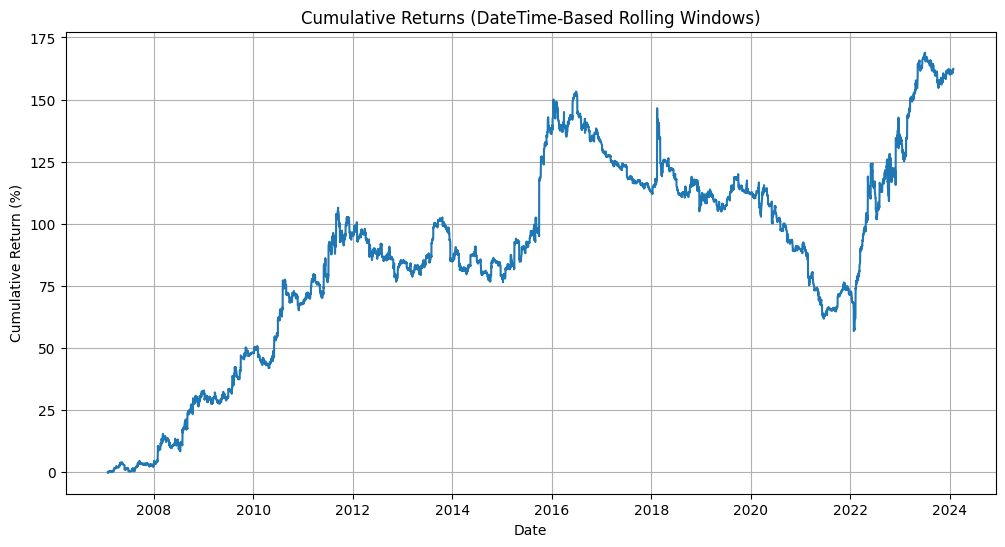

Final Cumulative Compounded Return: 162.32%

Overall Test Accuracy : 49.65%
Overall Precision     : 36.69%
Overall Recall        : 34.86%
Overall F1 Score      : 34.60%
Overall ROC AUC       : 54.39%

Average Fold Test Return : 0.01488%

Standard Deviation of All Test Returns (Aggregated Daily): 0.54176%

Minimum Return (Aggregated Daily): -4.70641%

Optimal Horizon Counts:
_double     9
_half       6
standard    2
Name: count, dtype: int64


In [ ]:


import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ['PYTHONHASHSEED'] = '0'

import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score
)
import numpy as np
import pandas as pd
import random

total_cost = 2 * transaction_cost
horizons = ['', '_half', '_double']

df_ml = df_ml.dropna(subset=['Surprise']).sort_values('DateTime')
min_date = df_ml['DateTime'].min()
max_date = df_ml['DateTime'].max()

total_duration = max_date - min_date
initial_train_duration = total_duration * 0.3
train_end_date = min_date + initial_train_duration

results = []
all_test_returns = []
all_dates = []
all_test_preds = []
all_test_truths = []
all_test_probas = []
fold_mean_returns = []
best_horizons_list = []

def calculate_grouped_returns(df_group, horizon):
    """Calculate returns with position sizing rules"""
    active_trades = df_group[df_group['pred'] != 0]
    if active_trades.empty:
        return 0.0

    longs = active_trades[active_trades['pred'] == 1]
    shorts = active_trades[active_trades['pred'] == 2]

    long_weights = []
    if not longs.empty:
        total_long_confidence = longs['proba'].sum()
        long_weights = longs['proba'] / total_long_confidence

    long_returns = (longs[f'Return{horizon}'] - total_cost) * long_weights
    short_returns = (-shorts[f'Return{horizon}'] - total_cost)

    return long_returns.sum() + short_returns.sum()

while True:
    val_start_date = train_end_date + pd.DateOffset(days=1)
    val_end_date = val_start_date + pd.DateOffset(years=1)
    test_start_date = val_end_date + pd.DateOffset(days=1)
    test_end_date = test_start_date + pd.DateOffset(years=1)

    if val_end_date > max_date or test_end_date > max_date:
        break

    train_mask = df_ml['DateTime'] <= train_end_date
    val_mask = (df_ml['DateTime'] >= val_start_date) & (df_ml['DateTime'] <= val_end_date)
    test_mask = (df_ml['DateTime'] >= test_start_date) & (df_ml['DateTime'] <= test_end_date)

    train_data = df_ml[train_mask]
    val_data = df_ml[val_mask]
    test_data = df_ml[test_mask]

    if val_data.empty or test_data.empty:
        print(f"Skipping period {val_start_date.date()} to {test_end_date.date()} (no data)")
        train_end_date += pd.DateOffset(years=1)
        continue

    best_horizon, best_model = None, None
    best_val_return = -np.inf

    for horizon in horizons:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(train_data[feature_cols])
        X_val = scaler.transform(val_data[feature_cols])
        y_train = train_data[f'Profit{horizon}']
        y_val = val_data[f'Profit{horizon}']

        model = xgb.XGBClassifier(
            num_class=3,
            n_estimators=60,
            max_depth=7,
            random_state=42,
            seed=42
        )
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

        val_preds = model.predict(X_val)
        val_probas = model.predict_proba(X_val)

        val_trade_df = pd.DataFrame({
            'DateTime': val_data['DateTime'],
            'pred': val_preds,
            'proba': [p[pred] for pred, p in zip(val_preds, val_probas)],
            f'Return{horizon}': val_data[f'Return{horizon}']
        })

        val_returns = val_trade_df.groupby('DateTime').apply(
            lambda x: calculate_grouped_returns(x, horizon)
        ).values

        total_val_return = (1 + val_returns).prod() - 1

        if total_val_return > best_val_return:
            best_val_return = total_val_return
            best_horizon = horizon
            best_model = model

    if best_model:
        X_test = scaler.transform(test_data[feature_cols])
        test_preds = best_model.predict(X_test)
        test_probas = best_model.predict_proba(X_test)
        y_test = test_data[f'Profit{best_horizon}'].values

        test_trade_df = pd.DataFrame({
            'DateTime': test_data['DateTime'],
            'pred': test_preds,
            'proba': [p[pred] for pred, p in zip(test_preds, test_probas)],
            f'Return{best_horizon}': test_data[f'Return{best_horizon}']
        })

        grouped_returns = test_trade_df.groupby('DateTime').apply(
            lambda x: calculate_grouped_returns(x, best_horizon)
        ).values

        all_test_returns.extend(grouped_returns)
        all_dates.extend(test_trade_df['DateTime'].unique().tolist())
        all_test_preds.extend(test_preds)
        all_test_truths.extend(y_test)
        all_test_probas.append(test_probas)
        fold_mean_returns.append(np.mean(grouped_returns))
        best_horizons_list.append(best_horizon or 'standard')

    train_end_date += pd.DateOffset(years=1)

if all_test_returns:
    cumulative_returns = (1 + np.array(all_test_returns)).cumprod() - 1
    std_dev_individual = np.std(all_test_returns) * 100
    min_return = np.nanmin(all_test_returns) * 100 if all_test_returns else 0.0  # Changed line

    plt.figure(figsize=(12, 6))
    plt.plot(all_dates, cumulative_returns * 100)
    plt.title('Cumulative Returns (DateTime-Based Rolling Windows)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (%)')
    plt.grid(True)
    plt.show()

    print(f"Final Cumulative Compounded Return: {cumulative_returns[-1]*100:.2f}%")
    print(f"\nOverall Test Accuracy : {accuracy_score(all_test_truths, all_test_preds)*100:.2f}%")
    print(f"Overall Precision     : {precision_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall Recall        : {recall_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall F1 Score      : {f1_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall ROC AUC       : {roc_auc_score(all_test_truths, np.vstack(all_test_probas), multi_class='ovo', average='macro')*100:.2f}%")
    print(f"\nAverage Fold Test Return : {np.mean(fold_mean_returns)*100:.5f}%")
    print(f"\nStandard Deviation of All Test Returns (Aggregated Daily): {std_dev_individual:.5f}%")
    print(f"\nMinimum Return (Aggregated Daily): {min_return:.5f}%")  # New print
    print("\nOptimal Horizon Counts:")
    print(pd.Series(best_horizons_list).value_counts())

else:
    print("No valid test periods found")

**Random Forests**

<ipython-input-82-88fbcfd4da6d>:131: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_returns = val_trade_df.groupby('DateTime').apply(
<ipython-input-82-88fbcfd4da6d>:131: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_returns = val_trade_df.groupby('DateTime').apply(
<ipython-input-82-88fbcfd4da6d>:131: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is depre

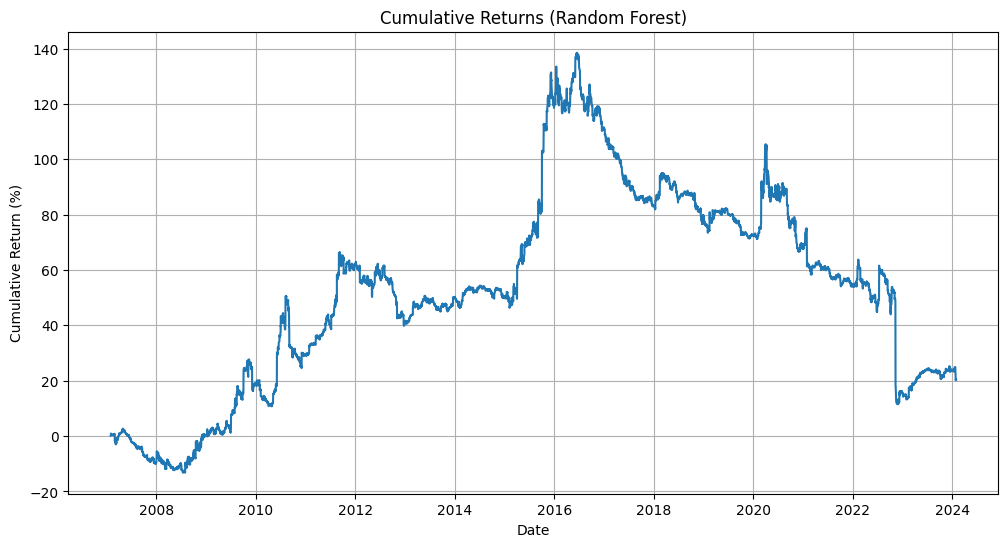

Final Cumulative Compounded Return: 20.40%

Overall Test Accuracy : 49.22%
Overall Precision     : 49.41%
Overall Recall        : 33.96%
Overall F1 Score      : 33.35%
Overall ROC AUC       : 52.03%

Average Fold Test Return : 0.00332%

Standard Deviation of All Test Returns (Aggregated Daily): 0.57588%

Minimum Return (Aggregated Daily): -20.12325%

Optimal Horizon Counts:
_double     7
standard    5
_half       5
Name: count, dtype: int64


In [ ]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ['PYTHONHASHSEED'] = '0'

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score
)
import numpy as np
import pandas as pd
import random

total_cost = 2 * transaction_cost
horizons = ['', '_half', '_double']

df_ml = df_ml.dropna(subset=['Surprise']).sort_values('DateTime')
min_date = df_ml['DateTime'].min()
max_date = df_ml['DateTime'].max()

total_duration = max_date - min_date
initial_train_duration = total_duration * 0.3
train_end_date = min_date + initial_train_duration

results = []
all_test_returns = []
all_dates = []
all_test_preds = []
all_test_truths = []
all_test_probas = []
fold_mean_returns = []
best_horizons_list = []

def calculate_grouped_returns(df_group, horizon):
    """Calculate returns with position sizing rules"""
    active_trades = df_group[df_group['pred'] != 0]
    if active_trades.empty:
        return 0.0

    longs = active_trades[active_trades['pred'] == 1]
    shorts = active_trades[active_trades['pred'] == 2]

    long_weights = []
    if not longs.empty:
        total_long_confidence = longs['proba'].sum()
        long_weights = longs['proba'] / total_long_confidence

    long_returns = (longs[f'Return{horizon}'] - total_cost) * long_weights
    short_returns = (-shorts[f'Return{horizon}'] - total_cost)

    return long_returns.sum() + short_returns.sum()

while True:
    val_start_date = train_end_date + pd.DateOffset(days=1)
    val_end_date = val_start_date + pd.DateOffset(years=1)

    test_start_date = val_end_date + pd.DateOffset(days=1)
    test_end_date = test_start_date + pd.DateOffset(years=1)

    if val_end_date > max_date or test_end_date > max_date:
        break

    train_mask = df_ml['DateTime'] <= train_end_date
    val_mask = (df_ml['DateTime'] >= val_start_date) & (df_ml['DateTime'] <= val_end_date)
    test_mask = (df_ml['DateTime'] >= test_start_date) & (df_ml['DateTime'] <= test_end_date)

    train_data = df_ml[train_mask]
    val_data = df_ml[val_mask]
    test_data = df_ml[test_mask]

    if val_data.empty or test_data.empty:
        print(f"Skipping period {val_start_date.date()} to {test_end_date.date()} (no data)")
        train_end_date += pd.DateOffset(years=1)
        continue

    best_horizon, best_model = None, None
    best_val_return = -np.inf

    for horizon in horizons:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(train_data[feature_cols])
        X_val = scaler.transform(val_data[feature_cols])
        y_train = train_data[f'Profit{horizon}']
        y_val = val_data[f'Profit{horizon}']

        model = RandomForestClassifier(
            n_estimators=100,
            criterion='gini',
            min_samples_leaf=4,
            random_state=42
        )
        model.fit(X_train, y_train)

        val_preds = model.predict(X_val)
        val_probas = model.predict_proba(X_val)

        class_indices = {cls: idx for idx, cls in enumerate(model.classes_)}
        proba_values = [proba[class_indices[pred]] for pred, proba in zip(val_preds, val_probas)]

        val_trade_df = pd.DataFrame({
            'DateTime': val_data['DateTime'],
            'pred': val_preds,
            'proba': proba_values,
            f'Return{horizon}': val_data[f'Return{horizon}']
        })

        val_returns = val_trade_df.groupby('DateTime').apply(
            lambda x: calculate_grouped_returns(x, horizon)
        ).values

        total_val_return = (1 + val_returns).prod() - 1

        if total_val_return > best_val_return:
            best_val_return = total_val_return
            best_horizon = horizon
            best_model = model

    if best_model:
        X_test = scaler.transform(test_data[feature_cols])
        test_preds = best_model.predict(X_test)
        test_probas = best_model.predict_proba(X_test)
        y_test = test_data[f'Profit{best_horizon}'].values

        class_indices = {cls: idx for idx, cls in enumerate(best_model.classes_)}
        test_proba_values = [proba[class_indices[pred]] for pred, proba in zip(test_preds, test_probas)]

        test_trade_df = pd.DataFrame({
            'DateTime': test_data['DateTime'],
            'pred': test_preds,
            'proba': test_proba_values,
            f'Return{best_horizon}': test_data[f'Return{best_horizon}']
        })

        grouped_returns = test_trade_df.groupby('DateTime').apply(
            lambda x: calculate_grouped_returns(x, best_horizon)
        ).values

        all_test_returns.extend(grouped_returns)
        all_dates.extend(test_trade_df['DateTime'].unique().tolist())
        all_test_preds.extend(test_preds)
        all_test_truths.extend(y_test)
        all_test_probas.append(test_probas)
        fold_mean_returns.append(np.mean(grouped_returns))
        best_horizons_list.append(best_horizon or 'standard')

    train_end_date += pd.DateOffset(years=1)

if all_test_returns:
    cumulative_returns = (1 + np.array(all_test_returns)).cumprod() - 1
    std_dev_individual = np.std(all_test_returns) * 100
    min_return = np.nanmin(all_test_returns) * 100 if all_test_returns else 0.0  # Changed line

    plt.figure(figsize=(12, 6))
    plt.plot(all_dates, cumulative_returns * 100)
    plt.title('Cumulative Returns (Random Forest)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (%)')
    plt.grid(True)
    plt.show()

    print(f"Final Cumulative Compounded Return: {cumulative_returns[-1]*100:.2f}%")
    print(f"\nOverall Test Accuracy : {accuracy_score(all_test_truths, all_test_preds)*100:.2f}%")
    print(f"Overall Precision     : {precision_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall Recall        : {recall_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall F1 Score      : {f1_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall ROC AUC       : {roc_auc_score(all_test_truths, np.vstack(all_test_probas), multi_class='ovo', average='macro')*100:.2f}%")
    print(f"\nAverage Fold Test Return : {np.mean(fold_mean_returns)*100:.5f}%")
    print(f"\nStandard Deviation of All Test Returns (Aggregated Daily): {std_dev_individual:.5f}%")
    print(f"\nMinimum Return (Aggregated Daily): {min_return:.5f}%")  # New line
    print("\nOptimal Horizon Counts:")
    print(pd.Series(best_horizons_list).value_counts())

else:
    print("No valid test periods found")

**Logistic Regression**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-112-567b98faa341>:126: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_returns = val_trade_df.groupby('DateTime').apply(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class

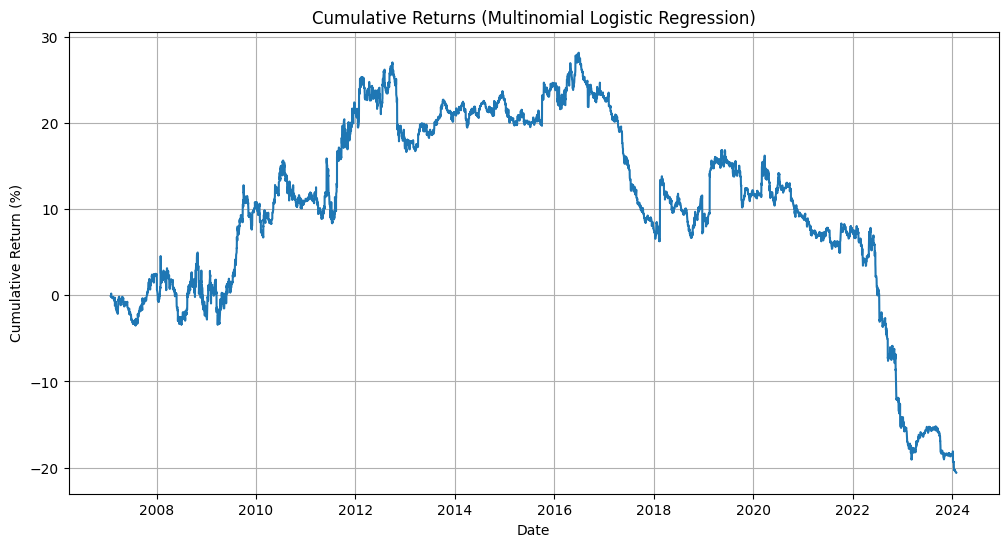

Final Cumulative Compounded Return: -20.59%

Overall Test Accuracy : 48.19%
Overall Precision     : 37.81%
Overall Recall        : 34.27%
Overall F1 Score      : 34.17%
Overall ROC AUC       : 54.09%

Average Fold Test Return : -0.00321%

Standard Deviation of All Test Returns (Aggregated Daily): 0.29109%

Minimum Return (Aggregated Daily): -3.45387%

Optimal Horizon Counts:
_half       10
_double      5
standard     2
Name: count, dtype: int64


In [ ]:


from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score
)
import numpy as np
import pandas as pd
import os, random

random.seed(42)
np.random.seed(42)

total_cost = 2 * transaction_cost
horizons = ['', '_half', '_double']

df_ml = df_ml.dropna(subset=['Surprise']).sort_values('DateTime')
min_date = df_ml['DateTime'].min()
max_date = df_ml['DateTime'].max()

total_duration = max_date - min_date
initial_train_duration = total_duration * 0.3
train_end_date = min_date + initial_train_duration

all_test_returns = []
all_dates = []
all_test_preds = []
all_test_truths = []
all_test_probas = []
fold_mean_returns = []
best_horizons_list = []

def calculate_grouped_returns(df_group, horizon):
    """Identical position sizing logic to other models"""
    active_trades = df_group[df_group['pred'] != 0]
    if active_trades.empty:
        return 0.0

    longs = active_trades[active_trades['pred'] == 1]
    shorts = active_trades[active_trades['pred'] == 2]

    long_weights = []
    if not longs.empty:
        total_long_confidence = longs['proba'].sum()
        long_weights = longs['proba'] / total_long_confidence

    long_returns = (longs[f'Return{horizon}'] - total_cost) * long_weights
    short_returns = (-shorts[f'Return{horizon}'] - total_cost)

    return long_returns.sum() + short_returns.sum()

while True:
    val_start_date = train_end_date + pd.DateOffset(days=1)
    val_end_date = val_start_date + pd.DateOffset(years=1)

    test_start_date = val_end_date + pd.DateOffset(days=1)
    test_end_date = test_start_date + pd.DateOffset(years=1)

    if val_end_date > max_date or test_end_date > max_date:
        break

    train_mask = df_ml['DateTime'] <= train_end_date
    val_mask = (df_ml['DateTime'] >= val_start_date) & (df_ml['DateTime'] <= val_end_date)
    test_mask = (df_ml['DateTime'] >= test_start_date) & (df_ml['DateTime'] <= test_end_date)

    train_data = df_ml[train_mask]
    val_data = df_ml[val_mask]
    test_data = df_ml[test_mask]

    if val_data.empty or test_data.empty:
        print(f"Skipping period {val_start_date.date()} to {test_end_date.date()} (no data)")
        train_end_date += pd.DateOffset(years=1)
        continue

    best_horizon, best_model = None, None
    best_val_return = -np.inf

    for horizon in horizons:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(train_data[feature_cols])
        X_val = scaler.transform(val_data[feature_cols])
        y_train = train_data[f'Profit{horizon}']
        y_val = val_data[f'Profit{horizon}']

        model = LogisticRegression(
            multi_class='multinomial',
            solver='saga',
            max_iter=100,
            random_state=42
        )
        model.fit(X_train, y_train)

        val_preds = model.predict(X_val)
        val_probas = model.predict_proba(X_val)

        class_indices = {cls: idx for idx, cls in enumerate(model.classes_)}
        proba_values = [proba[class_indices[pred]] for pred, proba in zip(val_preds, val_probas)]

        val_trade_df = pd.DataFrame({
            'DateTime': val_data['DateTime'],
            'pred': val_preds,
            'proba': proba_values,
            f'Return{horizon}': val_data[f'Return{horizon}']
        })

        val_returns = val_trade_df.groupby('DateTime').apply(
            lambda x: calculate_grouped_returns(x, horizon)
        ).values

        total_val_return = (1 + val_returns).prod() - 1

        if total_val_return > best_val_return:
            best_val_return = total_val_return
            best_horizon = horizon
            best_model = model

    if best_model:
        X_test = scaler.transform(test_data[feature_cols])
        test_preds = best_model.predict(X_test)
        test_probas = best_model.predict_proba(X_test)
        y_test = test_data[f'Profit{best_horizon}'].values

        class_indices = {cls: idx for idx, cls in enumerate(best_model.classes_)}
        test_proba_values = [proba[class_indices[pred]] for pred, proba in zip(test_preds, test_probas)]

        test_trade_df = pd.DataFrame({
            'DateTime': test_data['DateTime'],
            'pred': test_preds,
            'proba': test_proba_values,
            f'Return{best_horizon}': test_data[f'Return{best_horizon}']
        })

        grouped_returns = test_trade_df.groupby('DateTime').apply(
            lambda x: calculate_grouped_returns(x, best_horizon)
        ).values

        all_test_returns.extend(grouped_returns)
        all_dates.extend(test_trade_df['DateTime'].unique().tolist())
        all_test_preds.extend(test_preds)
        all_test_truths.extend(y_test)
        all_test_probas.append(test_probas)
        fold_mean_returns.append(np.mean(grouped_returns))
        best_horizons_list.append(best_horizon or 'standard')

    train_end_date += pd.DateOffset(years=1)

if all_test_returns:
    cumulative_returns = (1 + np.array(all_test_returns)).cumprod() - 1
    std_dev_individual = np.std(all_test_returns) * 100
    min_return = np.nanmin(all_test_returns) * 100 if all_test_returns else 0.0  # New line

    plt.figure(figsize=(12, 6))
    plt.plot(all_dates, cumulative_returns * 100)
    plt.title('Cumulative Returns (Multinomial Logistic Regression)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (%)')
    plt.grid(True)
    plt.show()

    print(f"Final Cumulative Compounded Return: {cumulative_returns[-1]*100:.2f}%")
    print(f"\nOverall Test Accuracy : {accuracy_score(all_test_truths, all_test_preds)*100:.2f}%")
    print(f"Overall Precision     : {precision_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall Recall        : {recall_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall F1 Score      : {f1_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall ROC AUC       : {roc_auc_score(all_test_truths, np.vstack(all_test_probas), multi_class='ovo', average='macro')*100:.2f}%")
    print(f"\nAverage Fold Test Return : {np.mean(fold_mean_returns)*100:.5f}%")
    print(f"\nStandard Deviation of All Test Returns (Aggregated Daily): {std_dev_individual:.5f}%")
    print(f"\nMinimum Return (Aggregated Daily): {min_return:.5f}%")  # New print
    print("\nOptimal Horizon Counts:")
    print(pd.Series(best_horizons_list).value_counts())

else:
    print("No valid test periods found")

**Drawing comparison between surprise based and non-surprise based holding-period returns**

In [ ]:
df_combined['Total_Return'] = np.nan
df_combined['Total_Return_half'] = np.nan
df_combined['Total_Return_double'] = np.nan

for index, row in df_combined.iterrows():
    row_position = df_combined.index.get_loc(index)

    if row_position + holding_period < len(df_combined):
        current_price = row['Open']
        future_price = df_combined.iloc[row_position + holding_period]['Open']

        if current_price != 0:
            df_combined.at[index, 'Total_Return'] = (future_price - current_price) / current_price

    if row_position + int(holding_period * 0.5) < len(df_combined):
        current_price = row['Open']
        future_price = df_combined.iloc[row_position + int(holding_period * 0.5)]['Open']

        if current_price != 0:
            df_combined.at[index, 'Total_Return_half'] = (future_price - current_price) / current_price

    if row_position + int(holding_period * 2) < len(df_combined):
        current_price = row['Open']
        future_price = df_combined.iloc[row_position + int(holding_period * 2)]['Open']

        if current_price != 0:
            df_combined.at[index, 'Total_Return_double'] = (future_price - current_price) / current_price

In [ ]:
df_combined[['Total_Return', 'Total_Return_half', 'Total_Return_double']].mean()

,0
Total_Return,0.000004
Total_Return_half,0.000002
Total_Return_double,0.000009


In [ ]:
df_combined[['Return', 'Return_half', 'Return_double']].mean()*100

,0
Return,0.000325
Return_half,-0.001230
Return_double,-0.000822


In [ ]:
df_combined.shape[0]

In [ ]:

if 'all_dates' in globals() and len(all_dates) > 0:
    first_test_date = pd.to_datetime(min(all_dates)).strftime('%Y-%m-%d %H:%M')
    last_test_date = pd.to_datetime(max(all_dates)).strftime('%Y-%m-%d %H:%M')
    print(f"Test Period: {first_test_date} to {last_test_date}")
else:
    print("No test dates found. Run backtest first.")

In [ ]:
print(f"\nTotal number of test observations: {len(all_test_returns)}")

# **Adding macroeconomic variables + stop-loss**

In [ ]:
import datetime
import pandas as pd
import pandas_datareader as pdr

start = datetime.datetime(1997, 1, 1)
end = datetime.datetime.today()

gdp_gr = pdr.DataReader('A191RL1Q225SBEA', 'fred', start, end)

gdp_gr_ml = gdp_gr.reset_index()
gdp_gr_ml.rename(columns={'A191RL1Q225SBEA': 'gdp_gr'}, inplace=True)
gdp_gr_ml['DateTime'] = pd.to_datetime(gdp_gr_ml['DATE']) + pd.Timedelta(hours=23, minutes=59)
gdp_gr_ml = gdp_gr_ml[['DateTime', 'gdp_gr']]

vix = pdr.DataReader('VIXCLS', 'fred', start, end)

vix_ml = vix.reset_index()
vix_ml.rename(columns={'VIXCLS': 'VIX'}, inplace=True)
vix_ml['DateTime'] = pd.to_datetime(vix_ml['DATE']) + pd.Timedelta(hours=23, minutes=59)
vix_ml = vix_ml[['DateTime', 'VIX']]

In [ ]:
gdp_gr_ml

,DateTime,gdp_gr
0,1997-01-01 23:59:00,2.6
1,1997-04-01 23:59:00,6.8
2,1997-07-01 23:59:00,5.1
3,1997-10-01 23:59:00,3.5
4,1998-01-01 23:59:00,4.1
...,...,...
107,2023-10-01 23:59:00,3.2
108,2024-01-01 23:59:00,1.6
109,2024-04-01 23:59:00,3.0
110,2024-07-01 23:59:00,3.1


In [ ]:
vix_ml

,DateTime,VIX
0,1997-01-01 23:59:00,NaN
1,1997-01-02 23:59:00,21.14
2,1997-01-03 23:59:00,19.13
3,1997-01-06 23:59:00,19.89
4,1997-01-07 23:59:00,19.35
...,...,...
7382,2025-04-18 23:59:00,NaN
7383,2025-04-21 23:59:00,33.82
7384,2025-04-22 23:59:00,30.57
7385,2025-04-23 23:59:00,28.45


In [ ]:
df_ml

,index,Ticker,Description,Broad indicator,Date_es,Time_es,Open,Close,Volume,DateTime,...,Ticker_USPHTMOM Index,Ticker_USPHTYOY Index,Ticker_USTBTOT Index,Ticker_USTGTTCB Index,Ticker_USUDMAER Index,Ticker_USURTOT Index,Ticker_USWHMANS Index,Ticker_USWHTOT Index,Ticker_VNCCCMOM Index,Ticker_VNCCTOT Index
0,8013,GDP CQOQ Index,GDP Quarterly Change QoQ,GDP growth rate,12/23/1997,07:30:00,1189.71,1189.71,0.0,1997-12-23 07:30:00,...,False,False,False,False,False,False,False,False,False,False
1,8014,GDP CQOQ Index,GDP Quarterly Change QoQ,GDP growth rate,03/26/1998,07:30:00,1355.65,1355.96,0.0,1998-03-26 07:30:00,...,False,False,False,False,False,False,False,False,False,False
2,8015,GDP CQOQ Index,GDP Quarterly Change QoQ,GDP growth rate,04/30/1998,07:30:00,1338.85,1338.85,0.0,1998-04-30 07:30:00,...,False,False,False,False,False,False,False,False,False,False
3,14293,NAPMPMI Index,NaN,NaN,06/01/1998,09:00:00,1335.49,1334.87,0.0,1998-06-01 09:00:00,...,False,False,False,False,False,False,False,False,False,False
4,15945,NHSLTOT Index,New Home Sales Total,Building permits - new private housing units a...,06/02/1998,09:00:00,1343.12,1342.51,0.0,1998-06-02 09:00:00,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23063,15553,NHCHATCH Index,New Home Sales (Annualized),Building permits - new private housing units a...,12/18/2024,07:30:00,6145.50,6145.75,131.0,2024-12-18 07:30:00,...,False,False,False,False,False,False,False,False,False,False
23064,15726,NHCHSTCH Index,New Home Sales Change,Building permits - new private housing units a...,12/18/2024,07:30:00,6145.50,6145.75,131.0,2024-12-18 07:30:00,...,False,False,False,False,False,False,False,False,False,False
23065,16836,NHSPSTOT Index,NaN,NaN,12/18/2024,07:30:00,6145.50,6145.75,131.0,2024-12-18 07:30:00,...,False,False,False,False,False,False,False,False,False,False
23066,5866,DOTDY1MD Index,Department of Transportation: International Ai...,GDP growth rate,12/18/2024,13:00:00,6135.75,6136.00,801.0,2024-12-18 13:00:00,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_ml = df_ml.sort_values('DateTime')
gdp_gr_ml = gdp_gr_ml.sort_values('DateTime')
vix_ml = vix_ml.sort_values('DateTime')

df_ml = pd.merge_asof(
    df_ml,
    gdp_gr_ml,
    on='DateTime',
    direction='backward'
)

df_ml = pd.merge_asof(
    df_ml,
    vix_ml,
    on='DateTime',
    direction='backward'
)

df_ml = df_ml.rename(columns={
    'gdp_gr': 'last_gdp_gr',
    'VIX': 'last_vix'
})

df_ml

,index,Ticker,Description,Broad indicator,Date_es,Time_es,Open,Close,Volume,DateTime,...,Ticker_USTBTOT Index,Ticker_USTGTTCB Index,Ticker_USUDMAER Index,Ticker_USURTOT Index,Ticker_USWHMANS Index,Ticker_USWHTOT Index,Ticker_VNCCCMOM Index,Ticker_VNCCTOT Index,last_gdp_gr,last_vix
0,8013,GDP CQOQ Index,GDP Quarterly Change QoQ,GDP growth rate,12/23/1997,07:30:00,1189.71,1189.71,0.0,1997-12-23 07:30:00,...,False,False,False,False,False,False,False,False,3.5,28.56
1,8014,GDP CQOQ Index,GDP Quarterly Change QoQ,GDP growth rate,03/26/1998,07:30:00,1355.65,1355.96,0.0,1998-03-26 07:30:00,...,False,False,False,False,False,False,False,False,4.1,22.54
2,8015,GDP CQOQ Index,GDP Quarterly Change QoQ,GDP growth rate,04/30/1998,07:30:00,1338.85,1338.85,0.0,1998-04-30 07:30:00,...,False,False,False,False,False,False,False,False,3.8,22.78
3,14293,NAPMPMI Index,NaN,NaN,06/01/1998,09:00:00,1335.49,1334.87,0.0,1998-06-01 09:00:00,...,False,False,False,False,False,False,False,False,3.8,21.32
4,15945,NHSLTOT Index,New Home Sales Total,Building permits - new private housing units a...,06/02/1998,09:00:00,1343.12,1342.51,0.0,1998-06-02 09:00:00,...,False,False,False,False,False,False,False,False,3.8,22.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23063,15726,NHCHSTCH Index,New Home Sales Change,Building permits - new private housing units a...,12/18/2024,07:30:00,6145.50,6145.75,131.0,2024-12-18 07:30:00,...,False,False,False,False,False,False,False,False,2.4,15.87
23064,21285,USCABAL Index,U.S. Current Account Balance,GDP growth rate,12/18/2024,07:30:00,6145.50,6145.75,131.0,2024-12-18 07:30:00,...,False,False,False,False,False,False,False,False,2.4,15.87
23065,16836,NHSPSTOT Index,NaN,NaN,12/18/2024,07:30:00,6145.50,6145.75,131.0,2024-12-18 07:30:00,...,False,False,False,False,False,False,False,False,2.4,15.87
23066,5866,DOTDY1MD Index,Department of Transportation: International Ai...,GDP growth rate,12/18/2024,13:00:00,6135.75,6136.00,801.0,2024-12-18 13:00:00,...,False,False,False,False,False,False,False,False,2.4,15.87


In [ ]:
# Defining new input features for ML models

feature_cols = [
    'Surprise', 'Volume_L1', 'R', 'SMA5', 'SMA10',
    'SMA20', 'SMA200', 'SMA5Cross', 'SMA10Cross', 'SMA15Cross',
    'SMA20Cross', 'SMA50Cross', 'SMA100Cross', 'SMA200Cross', 'UpDown10',
    'UpDown15', 'UpDown50'
] + ticker_cols + ['last_gdp_gr', 'last_vix']

In [ ]:
feature_cols

['Surprise',
 'Volume_L1',
 'R',
 'SMA5',
 'SMA10',
 'SMA20',
 'SMA200',
 'SMA5Cross',
 'SMA10Cross',
 'SMA15Cross',
 'SMA20Cross',
 'SMA50Cross',
 'SMA100Cross',
 'SMA200Cross',
 'UpDown10',
 'UpDown15',
 'UpDown50',
 'Ticker_ACNFCOMF Index',
 'Ticker_ADP CHNG Index',
 'Ticker_AHE MOM% Index',
 'Ticker_AHE YOY% Index',
 'Ticker_AMSPPACE Index',
 'Ticker_AWH TOTL Index',
 'Ticker_BBRSCPYY Index',
 'Ticker_BPGCGI Index',
 'Ticker_CFNAI Index',
 'Ticker_CGNOXAI% Index',
 'Ticker_CGSHXAI% Index',
 'Ticker_CHPMINDX Index',
 'Ticker_CICRTOT Index',
 'Ticker_CNSTTMOM Index',
 'Ticker_COMFBTWR Index',
 'Ticker_COMFCOMF Index',
 'Ticker_CONCCONF Index',
 'Ticker_CONCEXP Index',
 'Ticker_CONCPSIT Index',
 'Ticker_CONSCURR Index',
 'Ticker_CONSEXP Index',
 'Ticker_CONSP5MD Index',
 'Ticker_CONSPXMD Index',
 'Ticker_CONSSENT Index',
 'Ticker_COSTNFR% Index',
 'Ticker_CPI CHNG Index',
 'Ticker_CPI XYOY Index',
 'Ticker_CPI YOY Index',
 'Ticker_CPTICHNG Index',
 'Ticker_CPUPAXFE Index',
 'Ticker_CP

# **Final XGBoost**

<ipython-input-219-ccbcf2fa5655>:174: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_returns = val_trade_df.groupby('DateTime').apply(
<ipython-input-219-ccbcf2fa5655>:174: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_returns = val_trade_df.groupby('DateTime').apply(
<ipython-input-219-ccbcf2fa5655>:174: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is de

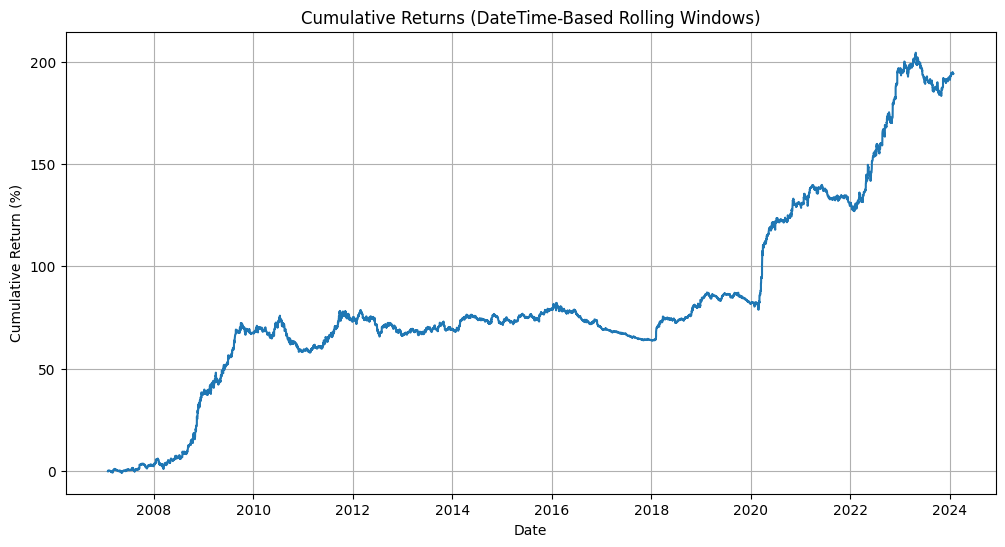

Final Cumulative Compounded Return: 194.12%

Overall Test Accuracy : 50.05%
Overall Precision     : 34.15%
Overall Recall        : 34.52%
Overall F1 Score      : 34.05%
Overall ROC AUC       : 53.41%

Average Fold Test Return : 0.01596%

Standard Deviation of All Test Returns (Aggregated Daily): 0.25421%

Minimum Return (Aggregated Daily): -0.92428%

Optimal Horizon Counts:
_double     13
standard     3
_half        1
Name: count, dtype: int64

Test Set Position Counts:
Neutral (0): 46
Long (1): 7721
Short (2): 6939


In [ ]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ['PYTHONHASHSEED'] = '0'

import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score
)
import numpy as np
import pandas as pd
import random

total_cost = 2 * transaction_cost
horizons = ['', '_half', '_double']

df_ml = df_ml.dropna(subset=['Surprise']).sort_values('DateTime')
min_date = df_ml['DateTime'].min()
max_date = df_ml['DateTime'].max()

total_duration = max_date - min_date
initial_train_duration = total_duration * 0.3
train_end_date = min_date + initial_train_duration

results = []
all_test_returns = []
all_dates = []
all_test_preds = []
all_test_truths = []
all_test_probas = []
fold_mean_returns = []
best_horizons_list = []

def calculate_grouped_returns(df_group, horizon, stop_loss=None):
    """Calculate returns with position sizing and stop loss"""
    active_trades = df_group[df_group['pred'] != 0]
    if active_trades.empty:
        return 0.0

    longs = active_trades[active_trades['pred'] == 1]
    shorts = active_trades[active_trades['pred'] == 2]

    total_confidence = longs['proba'].sum() + shorts['proba'].sum()
    if total_confidence == 0:
        return 0.0

    num_trades = len(longs) + len(shorts)
    total_costs = total_cost * num_trades

    long_returns = 0.0
    short_returns = 0.0

    if not longs.empty:
        long_weights = longs['proba'] / total_confidence
        for idx, row in longs.iterrows():
            raw_return = row[f'Return{horizon}']
            capped_raw = max(stop_loss, raw_return) if stop_loss is not None else raw_return
            long_returns += capped_raw * long_weights.loc[idx]

    if not shorts.empty:
        short_weights = shorts['proba'] / total_confidence
        for idx, row in shorts.iterrows():
            raw_return = -row[f'Return{horizon}']
            capped_raw = max(stop_loss, raw_return) if stop_loss is not None else raw_return
            short_returns += capped_raw * short_weights.loc[idx]

    net_return = (long_returns + short_returns) - total_costs
    return net_return

while True:
    val_start_date = train_end_date + pd.DateOffset(days=1)
    val_end_date = val_start_date + pd.DateOffset(years=1)
    test_start_date = val_end_date + pd.DateOffset(days=1)
    test_end_date = test_start_date + pd.DateOffset(years=1)

    if val_end_date > max_date or test_end_date > max_date:
        break

    train_mask = df_ml['DateTime'] <= train_end_date
    val_mask = (df_ml['DateTime'] >= val_start_date) & (df_ml['DateTime'] <= val_end_date)
    test_mask = (df_ml['DateTime'] >= test_start_date) & (df_ml['DateTime'] <= test_end_date)

    train_data = df_ml[train_mask]
    val_data = df_ml[val_mask]
    test_data = df_ml[test_mask]

    if val_data.empty or test_data.empty:
        print(f"Skipping period {val_start_date.date()} to {test_end_date.date()} (no data)")
        train_end_date += pd.DateOffset(years=1)
        continue

    best_horizon, best_model, best_stop_loss = None, None, None
    best_val_return = -np.inf

    for horizon in horizons:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(train_data[feature_cols])
        X_val = scaler.transform(val_data[feature_cols])
        y_train = train_data[f'Profit{horizon}']
        y_val = val_data[f'Profit{horizon}']

        model = xgb.XGBClassifier(
            num_class=3,
            n_estimators=60,
            max_depth=7,
            random_state=42,
            seed=42
        )
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

        train_preds = model.predict(X_train)
        train_trade_df = pd.DataFrame({
            'DateTime': train_data['DateTime'],
            'pred': train_preds,
            'proba': [p[pred] for pred, p in zip(train_preds, model.predict_proba(X_train))],
            f'Return{horizon}': train_data[f'Return{horizon}']
        })

        individual_train_returns = []
        for _, row in train_trade_df.iterrows():
            if row['pred'] == 1:
                raw = row[f'Return{horizon}']
            elif row['pred'] == 2:
                raw = -row[f'Return{horizon}']
            else:
                continue
            individual_train_returns.append(raw)

        stop_loss_train = np.percentile(individual_train_returns, 5) if individual_train_returns else None

        val_preds = model.predict(X_val)
        val_probas = model.predict_proba(X_val)
        val_trade_df = pd.DataFrame({
            'DateTime': val_data['DateTime'],
            'pred': val_preds,
            'proba': [p[pred] for pred, p in zip(val_preds, val_probas)],
            f'Return{horizon}': val_data[f'Return{horizon}']
        })

        individual_val_returns = []
        for _, row in val_trade_df.iterrows():
            if row['pred'] == 1:
                raw = row[f'Return{horizon}']
            elif row['pred'] == 2:
                raw = -row[f'Return{horizon}']
            else:
                continue
            individual_val_returns.append(raw)

        stop_loss_val = np.percentile(individual_val_returns, 5) if individual_val_returns else None

        val_returns = val_trade_df.groupby('DateTime').apply(
            lambda x: calculate_grouped_returns(x, horizon, stop_loss_train)
        ).values

        total_val_return = (1 + val_returns).prod() - 1

        if total_val_return > best_val_return:
            best_val_return = total_val_return
            best_horizon = horizon
            best_model = model
            best_stop_loss = stop_loss_val

    if best_model and best_stop_loss is not None:
        X_test = scaler.transform(test_data[feature_cols])
        test_preds = best_model.predict(X_test)
        test_probas = best_model.predict_proba(X_test)
        y_test = test_data[f'Profit{best_horizon}'].values

        test_trade_df = pd.DataFrame({
            'DateTime': test_data['DateTime'],
            'pred': test_preds,
            'proba': [p[pred] for pred, p in zip(test_preds, test_probas)],
            f'Return{best_horizon}': test_data[f'Return{best_horizon}']
        })

        grouped_returns = test_trade_df.groupby('DateTime').apply(
            lambda x: calculate_grouped_returns(x, best_horizon, best_stop_loss)
        ).values

        all_test_returns.extend(grouped_returns)
        all_dates.extend(test_trade_df['DateTime'].unique().tolist())
        all_test_preds.extend(test_preds)
        all_test_truths.extend(y_test)
        all_test_probas.append(test_probas)
        fold_mean_returns.append(np.mean(grouped_returns))
        best_horizons_list.append(best_horizon or 'standard')

    train_end_date += pd.DateOffset(years=1)

if all_test_returns:
    cumulative_returns = (1 + np.array(all_test_returns)).cumprod() - 1
    std_dev_individual = np.std(all_test_returns) * 100
    min_return = np.nanmin(all_test_returns) * 100 if all_test_returns else 0.0

    plt.figure(figsize=(12, 6))
    plt.plot(all_dates, cumulative_returns * 100)
    plt.title('Cumulative Returns (DateTime-Based Rolling Windows)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (%)')
    plt.grid(True)
    plt.show()

    print(f"Final Cumulative Compounded Return: {cumulative_returns[-1]*100:.2f}%")
    print(f"\nOverall Test Accuracy : {accuracy_score(all_test_truths, all_test_preds)*100:.2f}%")
    print(f"Overall Precision     : {precision_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall Recall        : {recall_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall F1 Score      : {f1_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall ROC AUC       : {roc_auc_score(all_test_truths, np.vstack(all_test_probas), multi_class='ovo', average='macro')*100:.2f}%")
    print(f"\nAverage Fold Test Return : {np.mean(fold_mean_returns)*100:.5f}%")
    print(f"\nStandard Deviation of All Test Returns (Aggregated Daily): {std_dev_individual:.5f}%")
    print(f"\nMinimum Return (Aggregated Daily): {min_return:.5f}%")
    print("\nOptimal Horizon Counts:")
    print(pd.Series(best_horizons_list).value_counts())
    print("\nTest Set Position Counts:")
    counts = pd.Series(all_test_preds).value_counts().sort_index()
    print(f"Neutral (0): {counts.get(0, 0)}")
    print(f"Long (1): {counts.get(1, 0)}")
    print(f"Short (2): {counts.get(2, 0)}")

else:
    print("No valid test periods found")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("\nConfusion Matrix:")
cm = confusion_matrix(all_test_truths, all_test_preds)
cm_df = pd.DataFrame(cm,
                    index=['Actual Neutral (0)', 'Actual Long (1)', 'Actual Short (2)'],
                    columns=['Pred Neutral (0)', 'Pred Long (1)', 'Pred Short (2)'])
print(cm_df)

print("\nClassification Report:")
print(classification_report(all_test_truths, all_test_preds,
                           target_names=['Neutral (0)', 'Long (1)', 'Short (2)']))


Confusion Matrix:
                    Pred Neutral (0)  Pred Long (1)  Pred Short (2)
Actual Neutral (0)                 1            234             246
Actual Long (1)                   18           3958            3291
Actual Short (2)                  27           3529            3402

Classification Report:
              precision    recall  f1-score   support

 Neutral (0)       0.02      0.00      0.00       481
    Long (1)       0.51      0.54      0.53      7267
   Short (2)       0.49      0.49      0.49      6958

    accuracy                           0.50     14706
   macro avg       0.34      0.35      0.34     14706
weighted avg       0.49      0.50      0.49     14706



# **Final Random Forest**

<ipython-input-221-76e8d1fecc33>:171: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_returns = val_trade_df.groupby('DateTime').apply(
<ipython-input-221-76e8d1fecc33>:171: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_returns = val_trade_df.groupby('DateTime').apply(
<ipython-input-221-76e8d1fecc33>:171: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is de

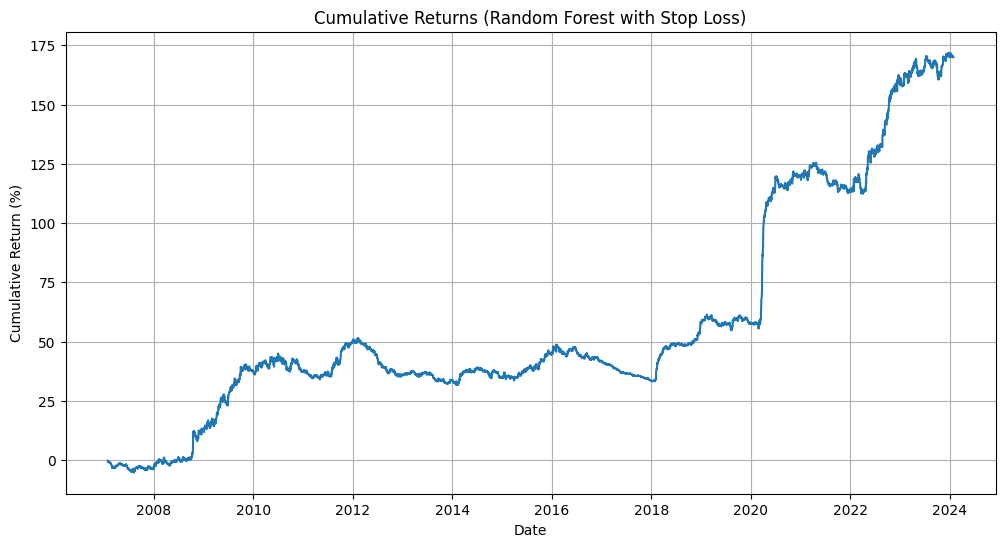

Final Cumulative Compounded Return: 170.01%

Overall Test Accuracy : 48.91%
Overall Precision     : 32.58%
Overall Recall        : 33.81%
Overall F1 Score      : 33.18%
Overall ROC AUC       : 54.22%

Average Fold Test Return : 0.01471%

Standard Deviation of All Test Returns (Aggregated Daily): 0.24941%

Minimum Return (Aggregated Daily): -0.97867%

Optimal Horizon Counts:
_double     12
_half        3
standard     2
Name: count, dtype: int64

Test Set Position Counts:
Neutral (0): 0
Long (1): 7640
Short (2): 7066


In [ ]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['VECLIB_MAXIMUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ['PYTHONHASHSEED'] = '0'

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score
)
import numpy as np
import pandas as pd
import random

total_cost = 2 * transaction_cost
horizons = ['', '_half', '_double']

df_ml = df_ml.dropna(subset=['Surprise']).sort_values('DateTime')
min_date = df_ml['DateTime'].min()
max_date = df_ml['DateTime'].max()

total_duration = max_date - min_date
initial_train_duration = total_duration * 0.3
train_end_date = min_date + initial_train_duration

results = []
all_test_returns = []
all_dates = []
all_test_preds = []
all_test_truths = []
all_test_probas = []
fold_mean_returns = []
best_horizons_list = []

def calculate_grouped_returns(df_group, horizon, stop_loss=None):
    """Calculate returns with position sizing and stop loss"""
    active_trades = df_group[df_group['pred'] != 0]
    if active_trades.empty:
        return 0.0

    longs = active_trades[active_trades['pred'] == 1].copy().reset_index(drop=True)
    shorts = active_trades[active_trades['pred'] == 2].copy().reset_index(drop=True)

    total_confidence = longs['proba'].sum() + shorts['proba'].sum()
    if total_confidence == 0:
        return 0.0

    num_trades = len(longs) + len(shorts)
    total_costs = total_cost * num_trades

    long_returns = 0.0
    short_returns = 0.0

    if not longs.empty:
        long_weights = longs['proba'] / total_confidence
        for idx in longs.index:
            raw_return = longs.loc[idx, f'Return{horizon}']
            capped_raw = max(stop_loss, raw_return) if stop_loss is not None else raw_return
            long_returns += capped_raw * long_weights.loc[idx]

    if not shorts.empty:
        short_weights = shorts['proba'] / total_confidence
        for idx in shorts.index:
            raw_return = -shorts.loc[idx, f'Return{horizon}']
            capped_raw = max(stop_loss, raw_return) if stop_loss is not None else raw_return
            short_returns += capped_raw * short_weights.loc[idx]

    net_return = (long_returns + short_returns) - total_costs
    return net_return

while True:
    val_start_date = train_end_date + pd.DateOffset(days=1)
    val_end_date = val_start_date + pd.DateOffset(years=1)
    test_start_date = val_end_date + pd.DateOffset(days=1)
    test_end_date = test_start_date + pd.DateOffset(years=1)

    if val_end_date > max_date or test_end_date > max_date:
        break

    train_mask = df_ml['DateTime'] <= train_end_date
    val_mask = (df_ml['DateTime'] >= val_start_date) & (df_ml['DateTime'] <= val_end_date)
    test_mask = (df_ml['DateTime'] >= test_start_date) & (df_ml['DateTime'] <= test_end_date)

    train_data = df_ml[train_mask]
    val_data = df_ml[val_mask]
    test_data = df_ml[test_mask]

    if val_data.empty or test_data.empty:
        print(f"Skipping period {val_start_date.date()} to {test_end_date.date()} (no data)")
        train_end_date += pd.DateOffset(years=1)
        continue

    best_horizon, best_model, best_stop_loss = None, None, None
    best_val_return = -np.inf

    for horizon in horizons:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(train_data[feature_cols])
        X_val = scaler.transform(val_data[feature_cols])
        y_train = train_data[f'Profit{horizon}']
        y_val = val_data[f'Profit{horizon}']

        model = RandomForestClassifier(
            n_estimators=100,
            criterion='gini',
            min_samples_leaf=4,
            random_state=42
        )
        model.fit(X_train, y_train)

        train_preds = model.predict(X_train)
        train_probas = model.predict_proba(X_train)
        class_map = {cls: idx for idx, cls in enumerate(model.classes_)}

        train_trade_df = pd.DataFrame({
            'DateTime': train_data['DateTime'],
            'pred': train_preds,
            'proba': [proba[class_map[pred]] for pred, proba in zip(train_preds, train_probas)],
            f'Return{horizon}': train_data[f'Return{horizon}']
        })

        train_raw_returns = []
        for _, row in train_trade_df.iterrows():
            if row['pred'] == 1:
                train_raw_returns.append(row[f'Return{horizon}'])
            elif row['pred'] == 2:
                train_raw_returns.append(-row[f'Return{horizon}'])
        stop_loss_train = np.percentile(train_raw_returns, 5) if train_raw_returns else None

        val_preds = model.predict(X_val)
        val_probas = model.predict_proba(X_val)
        val_trade_df = pd.DataFrame({
            'DateTime': val_data['DateTime'],
            'pred': val_preds,
            'proba': [proba[class_map[pred]] for pred, proba in zip(val_preds, val_probas)],
            f'Return{horizon}': val_data[f'Return{horizon}']
        })

        val_raw_returns = []
        for _, row in val_trade_df.iterrows():
            if row['pred'] == 1:
                val_raw_returns.append(row[f'Return{horizon}'])
            elif row['pred'] == 2:
                val_raw_returns.append(-row[f'Return{horizon}'])
        stop_loss_val = np.percentile(val_raw_returns, 5) if val_raw_returns else None

        val_returns = val_trade_df.groupby('DateTime').apply(
            lambda x: calculate_grouped_returns(x, horizon, stop_loss_train)
        ).values

        total_val_return = (1 + val_returns).prod() - 1

        if total_val_return > best_val_return:
            best_val_return = total_val_return
            best_horizon = horizon
            best_model = model
            best_stop_loss = stop_loss_val

    if best_model and best_stop_loss is not None:
        X_test = scaler.transform(test_data[feature_cols])
        test_preds = best_model.predict(X_test)
        test_probas = best_model.predict_proba(X_test)
        y_test = test_data[f'Profit{best_horizon}'].values

        class_map = {cls: idx for idx, cls in enumerate(best_model.classes_)}
        test_trade_df = pd.DataFrame({
            'DateTime': test_data['DateTime'],
            'pred': test_preds,
            'proba': [proba[class_map[pred]] for pred, proba in zip(test_preds, test_probas)],
            f'Return{best_horizon}': test_data[f'Return{best_horizon}']
        })

        grouped_returns = test_trade_df.groupby('DateTime').apply(
            lambda x: calculate_grouped_returns(x, best_horizon, best_stop_loss)
        ).values

        all_test_returns.extend(grouped_returns)
        all_dates.extend(test_trade_df['DateTime'].unique().tolist())
        all_test_preds.extend(test_preds)
        all_test_truths.extend(y_test)
        all_test_probas.append(test_probas)
        fold_mean_returns.append(np.mean(grouped_returns))
        best_horizons_list.append(best_horizon or 'standard')

    train_end_date += pd.DateOffset(years=1)

if all_test_returns:
    cumulative_returns = (1 + np.array(all_test_returns)).cumprod() - 1
    std_dev_individual = np.std(all_test_returns) * 100
    min_return = np.nanmin(all_test_returns) * 100 if all_test_returns else 0.0

    plt.figure(figsize=(12, 6))
    plt.plot(all_dates, cumulative_returns * 100)
    plt.title('Cumulative Returns (Random Forest with Stop Loss)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (%)')
    plt.grid(True)
    plt.show()

    print(f"Final Cumulative Compounded Return: {cumulative_returns[-1]*100:.2f}%")
    print(f"\nOverall Test Accuracy : {accuracy_score(all_test_truths, all_test_preds)*100:.2f}%")
    print(f"Overall Precision     : {precision_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall Recall        : {recall_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall F1 Score      : {f1_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall ROC AUC       : {roc_auc_score(all_test_truths, np.vstack(all_test_probas), multi_class='ovo', average='macro')*100:.2f}%")
    print(f"\nAverage Fold Test Return : {np.mean(fold_mean_returns)*100:.5f}%")
    print(f"\nStandard Deviation of All Test Returns (Aggregated Daily): {std_dev_individual:.5f}%")
    print(f"\nMinimum Return (Aggregated Daily): {min_return:.5f}%")
    print("\nOptimal Horizon Counts:")
    print(pd.Series(best_horizons_list).value_counts())
    print("\nTest Set Position Counts:")
    counts = pd.Series(all_test_preds).value_counts().sort_index()
    print(f"Neutral (0): {counts.get(0, 0)}")
    print(f"Long (1): {counts.get(1, 0)}")
    print(f"Short (2): {counts.get(2, 0)}")

else:
    print("No valid test periods found")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("\nConfusion Matrix:")
cm = confusion_matrix(all_test_truths, all_test_preds)
cm_df = pd.DataFrame(cm,
                    index=['Actual Neutral (0)', 'Actual Long (1)', 'Actual Short (2)'],
                    columns=['Pred Neutral (0)', 'Pred Long (1)', 'Pred Short (2)'])
print(cm_df)

print("\nClassification Report:")
print(classification_report(all_test_truths, all_test_preds,
                           target_names=['Neutral (0)', 'Long (1)', 'Short (2)']))


Confusion Matrix:
                    Pred Neutral (0)  Pred Long (1)  Pred Short (2)
Actual Neutral (0)                 0            258             276
Actual Long (1)                    0           3811            3409
Actual Short (2)                   0           3571            3381

Classification Report:
              precision    recall  f1-score   support

 Neutral (0)       0.00      0.00      0.00       534
    Long (1)       0.50      0.53      0.51      7220
   Short (2)       0.48      0.49      0.48      6952

    accuracy                           0.49     14706
   macro avg       0.33      0.34      0.33     14706
weighted avg       0.47      0.49      0.48     14706



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Final Logistic Regression**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
<ipython-input-217-c1685d73cf26>:164: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_returns = val_trade_df.groupby('DateTime').apply(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class

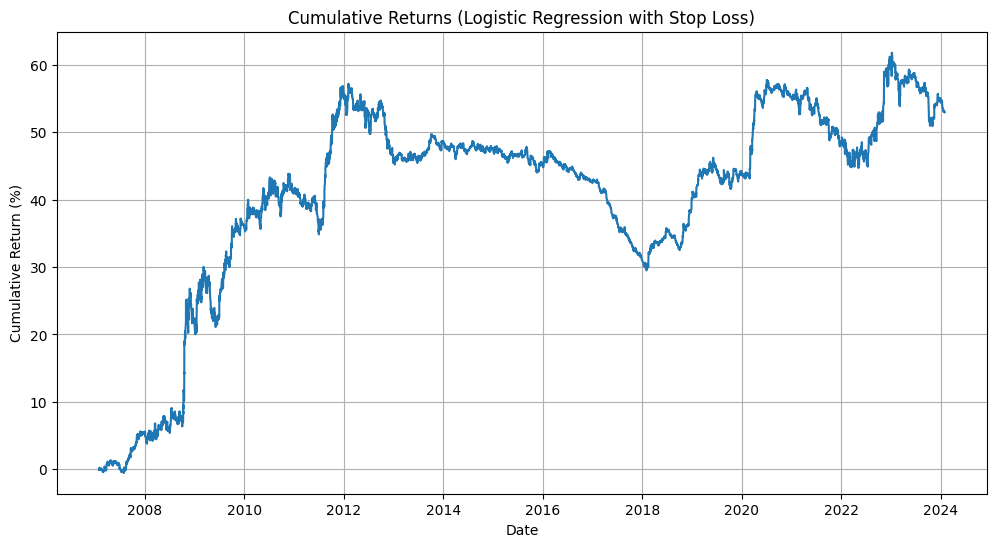

Final Cumulative Compounded Return: 52.98%

Overall Test Accuracy : 48.32%
Overall Precision     : 35.54%
Overall Recall        : 33.95%
Overall F1 Score      : 33.49%
Overall ROC AUC       : 54.34%

Average Fold Test Return : 0.00638%

Standard Deviation of All Test Returns (Aggregated Daily): 0.22916%

Minimum Return (Aggregated Daily): -0.93203%

Optimal Horizon Counts:
_double     9
_half       6
standard    2
Name: count, dtype: int64

Test Set Position Counts:
Neutral (0): 112
Long (1): 8971
Short (2): 5623


In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score
)
import numpy as np
import pandas as pd
import os, random

random.seed(42)
np.random.seed(42)

total_cost = 2 * transaction_cost
horizons = ['', '_half', '_double']

df_ml = df_ml.dropna(subset=['Surprise']).sort_values('DateTime')
min_date = df_ml['DateTime'].min()
max_date = df_ml['DateTime'].max()

total_duration = max_date - min_date
initial_train_duration = total_duration * 0.3
train_end_date = min_date + initial_train_duration

all_test_returns = []
all_dates = []
all_test_preds = []
all_test_truths = []
all_test_probas = []
fold_mean_returns = []
best_horizons_list = []

def calculate_grouped_returns(df_group, horizon, stop_loss=None):
    """Calculate returns with position sizing and stop loss"""
    active_trades = df_group[df_group['pred'] != 0]
    if active_trades.empty:
        return 0.0

    longs = active_trades[active_trades['pred'] == 1].copy().reset_index(drop=True)
    shorts = active_trades[active_trades['pred'] == 2].copy().reset_index(drop=True)

    total_confidence = longs['proba'].sum() + shorts['proba'].sum()
    if total_confidence == 0:
        return 0.0

    num_trades = len(longs) + len(shorts)
    total_costs = total_cost * num_trades

    long_returns = 0.0
    short_returns = 0.0

    if not longs.empty:
        long_weights = longs['proba'] / total_confidence
        for idx in longs.index:
            raw_return = longs.loc[idx, f'Return{horizon}']
            capped_raw = max(stop_loss, raw_return) if stop_loss is not None else raw_return
            long_returns += capped_raw * long_weights.loc[idx]

    if not shorts.empty:
        short_weights = shorts['proba'] / total_confidence
        for idx in shorts.index:
            raw_return = -shorts.loc[idx, f'Return{horizon}']
            capped_raw = max(stop_loss, raw_return) if stop_loss is not None else raw_return
            short_returns += capped_raw * short_weights.loc[idx]

    net_return = (long_returns + short_returns) - total_costs
    return net_return

while True:
    val_start_date = train_end_date + pd.DateOffset(days=1)
    val_end_date = val_start_date + pd.DateOffset(years=1)
    test_start_date = val_end_date + pd.DateOffset(days=1)
    test_end_date = test_start_date + pd.DateOffset(years=1)

    if val_end_date > max_date or test_end_date > max_date:
        break

    train_mask = df_ml['DateTime'] <= train_end_date
    val_mask = (df_ml['DateTime'] >= val_start_date) & (df_ml['DateTime'] <= val_end_date)
    test_mask = (df_ml['DateTime'] >= test_start_date) & (df_ml['DateTime'] <= test_end_date)

    train_data = df_ml[train_mask]
    val_data = df_ml[val_mask]
    test_data = df_ml[test_mask]

    if val_data.empty or test_data.empty:
        print(f"Skipping period {val_start_date.date()} to {test_end_date.date()} (no data)")
        train_end_date += pd.DateOffset(years=1)
        continue

    best_horizon, best_model, best_stop_loss = None, None, None
    best_val_return = -np.inf

    for horizon in horizons:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(train_data[feature_cols])
        X_val = scaler.transform(val_data[feature_cols])
        y_train = train_data[f'Profit{horizon}']
        y_val = val_data[f'Profit{horizon}']

        model = LogisticRegression(
            multi_class='multinomial',
            solver='saga',
            max_iter=100,
            random_state=42
        )
        model.fit(X_train, y_train)

        train_preds = model.predict(X_train)
        train_probas = model.predict_proba(X_train)
        class_map = {cls: idx for idx, cls in enumerate(model.classes_)}

        train_trade_df = pd.DataFrame({
            'DateTime': train_data['DateTime'],
            'pred': train_preds,
            'proba': [proba[class_map[pred]] for pred, proba in zip(train_preds, train_probas)],
            f'Return{horizon}': train_data[f'Return{horizon}']
        })

        train_raw_returns = []
        for _, row in train_trade_df.iterrows():
            if row['pred'] == 1:
                train_raw_returns.append(row[f'Return{horizon}'])
            elif row['pred'] == 2:
                train_raw_returns.append(-row[f'Return{horizon}'])
        stop_loss_train = np.percentile(train_raw_returns, 5) if train_raw_returns else None

        val_preds = model.predict(X_val)
        val_probas = model.predict_proba(X_val)
        val_trade_df = pd.DataFrame({
            'DateTime': val_data['DateTime'],
            'pred': val_preds,
            'proba': [proba[class_map[pred]] for pred, proba in zip(val_preds, val_probas)],
            f'Return{horizon}': val_data[f'Return{horizon}']
        })

        val_raw_returns = []
        for _, row in val_trade_df.iterrows():
            if row['pred'] == 1:
                val_raw_returns.append(row[f'Return{horizon}'])
            elif row['pred'] == 2:
                val_raw_returns.append(-row[f'Return{horizon}'])
        stop_loss_val = np.percentile(val_raw_returns, 5) if val_raw_returns else None

        val_returns = val_trade_df.groupby('DateTime').apply(
            lambda x: calculate_grouped_returns(x, horizon, stop_loss_train)
        ).values

        total_val_return = (1 + val_returns).prod() - 1

        if total_val_return > best_val_return:
            best_val_return = total_val_return
            best_horizon = horizon
            best_model = model
            best_stop_loss = stop_loss_val

    if best_model and best_stop_loss is not None:
        X_test = scaler.transform(test_data[feature_cols])
        test_preds = best_model.predict(X_test)
        test_probas = best_model.predict_proba(X_test)
        y_test = test_data[f'Profit{best_horizon}'].values

        class_map = {cls: idx for idx, cls in enumerate(best_model.classes_)}
        test_trade_df = pd.DataFrame({
            'DateTime': test_data['DateTime'],
            'pred': test_preds,
            'proba': [proba[class_map[pred]] for pred, proba in zip(test_preds, test_probas)],
            f'Return{best_horizon}': test_data[f'Return{best_horizon}']
        })

        grouped_returns = test_trade_df.groupby('DateTime').apply(
            lambda x: calculate_grouped_returns(x, best_horizon, best_stop_loss)
        ).values

        all_test_returns.extend(grouped_returns)
        all_dates.extend(test_trade_df['DateTime'].unique().tolist())
        all_test_preds.extend(test_preds)
        all_test_truths.extend(y_test)
        all_test_probas.append(test_probas)
        fold_mean_returns.append(np.mean(grouped_returns))
        best_horizons_list.append(best_horizon or 'standard')

    train_end_date += pd.DateOffset(years=1)

if all_test_returns:
    cumulative_returns = (1 + np.array(all_test_returns)).cumprod() - 1
    std_dev_individual = np.std(all_test_returns) * 100
    min_return = np.nanmin(all_test_returns) * 100 if all_test_returns else 0.0

    plt.figure(figsize=(12, 6))
    plt.plot(all_dates, cumulative_returns * 100)
    plt.title('Cumulative Returns (Logistic Regression with Stop Loss)')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return (%)')
    plt.grid(True)
    plt.show()

    print(f"Final Cumulative Compounded Return: {cumulative_returns[-1]*100:.2f}%")
    print(f"\nOverall Test Accuracy : {accuracy_score(all_test_truths, all_test_preds)*100:.2f}%")
    print(f"Overall Precision     : {precision_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall Recall        : {recall_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall F1 Score      : {f1_score(all_test_truths, all_test_preds, average='macro', zero_division=0)*100:.2f}%")
    print(f"Overall ROC AUC       : {roc_auc_score(all_test_truths, np.vstack(all_test_probas), multi_class='ovo', average='macro')*100:.2f}%")
    print(f"\nAverage Fold Test Return : {np.mean(fold_mean_returns)*100:.5f}%")
    print(f"\nStandard Deviation of All Test Returns (Aggregated Daily): {std_dev_individual:.5f}%")
    print(f"\nMinimum Return (Aggregated Daily): {min_return:.5f}%")
    print("\nOptimal Horizon Counts:")
    print(pd.Series(best_horizons_list).value_counts())
    print("\nTest Set Position Counts:")
    counts = pd.Series(all_test_preds).value_counts().sort_index()
    print(f"Neutral (0): {counts.get(0, 0)}")
    print(f"Long (1): {counts.get(1, 0)}")
    print(f"Short (2): {counts.get(2, 0)}")

else:
    print("No valid test periods found")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("\nConfusion Matrix:")
cm = confusion_matrix(all_test_truths, all_test_preds)
cm_df = pd.DataFrame(cm,
                    index=['Actual Neutral (0)', 'Actual Long (1)', 'Actual Short (2)'],
                    columns=['Pred Neutral (0)', 'Pred Long (1)', 'Pred Short (2)'])
print(cm_df)

print("\nClassification Report:")
print(classification_report(all_test_truths, all_test_preds,
                           target_names=['Neutral (0)', 'Long (1)', 'Short (2)']))


Confusion Matrix:
                    Pred Neutral (0)  Pred Long (1)  Pred Short (2)
Actual Neutral (0)                11            350             217
Actual Long (1)                   55           4426            2737
Actual Short (2)                  46           4195            2669

Classification Report:
              precision    recall  f1-score   support

 Neutral (0)       0.10      0.02      0.03       578
    Long (1)       0.49      0.61      0.55      7218
   Short (2)       0.47      0.39      0.43      6910

    accuracy                           0.48     14706
   macro avg       0.36      0.34      0.33     14706
weighted avg       0.47      0.48      0.47     14706



In [ ]:
sorted_dates = sorted(all_dates)
print(f"First test set date: {sorted_dates[0].date()}")
print(f"Last test set date: {sorted_dates[-1].date()}")

# So can see overall that our models have roughly 17 years worth of test observations  except the statistical model which doesn't trade in the past 2 years
# This is important for the annual compounded return calculation in our tables

First test set date: 2007-01-30
Last test set date: 2024-01-29
